In [1]:
!pip install pyreadstat

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 5.6 MB/s eta 0:00:01
   -------- ------------------------------- 0.5/2.4 MB 5.6 MB/s eta 0:00:01
   -------- ------------------------------- 0.5/2.4 MB 5.6 MB/s eta 0:00:01
   -------- ------------------------------- 0.5/2.4 MB 5.6 MB/s eta 0:00:01
   ----------------- ---------------------- 1.0/2.4 MB 915.5 kB/s eta 0:00:02
   --------------------- ------------------ 1.3/2.4 MB 1.1 MB/s eta 0:00:02
   --------------------- ------------------ 1.3/2.4 MB 1.1 MB/s eta 0:00:02
   --------------------- ------------------ 1.3/2.4 MB 1.1 MB/s eta 0:00:02
   --------------------- ------------------ 1.3/2.4 MB 1.1 MB/s eta 0:00:02
   ---------------------------------- ----- 2.1/2.4 MB 931.9 kB/s eta 0:00:01
   ---------------------------------- ----- 2.1/2.4 MB 931.9 kB/s eta 0:00:01
   ---------------------------------- ----- 2.1/2.4 MB 931.9 kB/s eta 0:00:01
   --------

In [36]:
# Check the contents of the 'Dataset' folder inside the extracted path
import os
dataset_folder = os.path.dirname('C:/DEPI_Project/Dataset/')
os.listdir(dataset_folder)


['AGP_L.xpt',
 'ALQ_L.xpt',
 'BAQ_L.xpt',
 'BAX_L.xpt',
 'BMX_L.xpt',
 'BPQ_L.xpt',
 'BPXO_L.xpt',
 'CBC_L.xpt',
 'DBQ_L.xpt',
 'DEMO_L.xpt',
 'DIQ_L.xpt',
 'DSQTOT_L.xpt',
 'ECQ_L.xpt',
 'FERTIN_L.xpt',
 'FOLATE_L.xpt',
 'FOLFMS_L.xpt',
 'GHB_L.xpt',
 'GLU_L.xpt',
 'HDL_L.xpt',
 'HSCRP_L.xpt',
 'HSQ_L.xpt',
 'IHGEM_L.xpt',
 'INS_L (1).xpt',
 'LUX_L.xpt',
 'OHQ_L.xpt',
 'PAQ_L.xpt',
 'PBCD_L.xpt',
 'RHQ_L.xpt',
 'RXQASA_L.xpt',
 'SLQ_L.xpt',
 'SMQ_L.xpt',
 'TCHOL_L.xpt',
 'VID_L.xpt',
 'WHQ_L.xpt']

In [ ]:
import pandas as pd
from pathlib import Path
import pyreadstat
from collections import defaultdict

column_sources = defaultdict(list)
merged_df = None
# Load all XPT files into dataframes (except OHQ_L.xpt which is for oral health)
dataframes = {}
for file in os.listdir(dataset_folder):
    if file.endswith('.xpt') :
        file_path = os.path.join(dataset_folder, file)
        df, meta = pyreadstat.read_xport(file_path, encoding='cp1252')
        key = Path(file).stem
        try:
            df, meta = pyreadstat.read_xport(file_path, encoding='cp1252')
            dataframes[key] = df
            print(f"✅ Loaded: {file}")
        except Exception as e:
            print(f"❌ Failed to load {file}: {e}")
        print(key)
        print(dataframes[key].shape)
        
        for var, label in zip(meta.column_names, meta.column_labels):
            print(f"{var}: {label}")
            #pass
        if merged_df is None:
            merged_df = df
        else:
            # Only keep columns that are not already in merged_df (except 'SEQN')
            df_filtered = df.loc[:, ~df.columns.isin(merged_df.columns.difference(['SEQN']))]
            merged_df = pd.merge(merged_df, df_filtered, on="SEQN", how="outer")
        for col in df.columns:
            column_sources[col].append(file)

# Find duplicates (i.e., columns that appear in more than one file)
duplicate_columns = {col: sources for col, sources in column_sources.items() if len(sources) > 1}

# Show them
for col, sources in duplicate_columns.items():
    print(f"🔁 Column '{col}' appears in: {sources}")
# Show the loaded dataset keys
#list(dataframes.keys())
merged_df.shape, merged_df.head()


✅ Loaded: AGP_L.xpt
AGP_L
(2564, 3)
SEQN: Respondent sequence number
WTPH2YR: Phlebotomy 2 Year Weight
LBXAGP: alpha-1-acid glycoprotein (g/L)
✅ Loaded: ALQ_L.xpt
ALQ_L
(6337, 9)
SEQN: Respondent sequence number
ALQ111: Ever had a drink of any kind of alcohol
ALQ121: Past 12 mos how often drink alc bev
ALQ130: Avg # alcoholic drinks/day/past 12 mos
ALQ142: # days have 4/5 drinks/past 12 mos
ALQ270: # times 4/5 drinks in 2hrs/past 12 mos
ALQ280: # times 8+ drinks in 1 day/past 12 mos
ALQ151: Ever have 4/5 or more drinks every day
ALQ170: # times 4/5 drinks on occasion/past mo
✅ Loaded: BAQ_L.xpt
BAQ_L
(6070, 15)
SEQN: Respondent sequence number
BAQ321A: Past 12 months, problems with vertigo
BAQ321B: Past 12 months, prblms w/blurring vision
BAQ321C: Past 12 months, problems with unsteady
BAQ321D: Past 12 months, problems w/light-headed
BAQ341: Past 12 months, which bothered the most?
BAQ391A: Episodes with nausea or vomiting?
BAQ391B: Episodes with migraine/severe headache?
BAQ401: Balan

((11933, 355),
        SEQN       WTPH2YR  LBXAGP  ALQ111  ALQ121  ALQ130  ALQ142  ALQ270  \
 0  130378.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 1  130379.0           NaN     NaN     1.0     2.0     3.0     0.0     NaN   
 2  130380.0  85328.844519   1.010     1.0    10.0     1.0     0.0     NaN   
 3  130381.0      0.000000     NaN     NaN     NaN     NaN     NaN     NaN   
 4  130382.0  59638.932323   0.921     NaN     NaN     NaN     NaN     NaN   
 
    ALQ280  ALQ151  ...  LBXVD2MS  LBDVD2LC  LBXVD3MS  LBDVD3LC  LBXVE3MS  \
 0     NaN     NaN  ...      1.57       1.0      57.3       0.0      2.47   
 1     NaN     2.0  ...      1.57       1.0      58.9       0.0      3.40   
 2     NaN     2.0  ...      1.57       1.0      37.8       0.0      1.52   
 3     NaN     NaN  ...       NaN       NaN       NaN       NaN       NaN   
 4     NaN     NaN  ...       NaN       NaN       NaN       NaN       NaN   
 
    LBDVE3LC  WHD010  WHD020  WHD050  WHQ070  
 0  

In [ ]:
merged_df.to_csv("merged_output.csv", index=False)


In [2]:
import pandas as pd
from pathlib import Path
import pyreadstat
from collections import defaultdict
import numpy as np
new_df=pd.read_csv("C:/DEPI_Project - 2025/DataSet/CSV/merged_output.csv")

In [3]:
display(new_df.info(),new_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Columns: 355 entries, SEQN to WHQ070
dtypes: float64(347), object(8)
memory usage: 32.3+ MB


None

SEQN       WTPH2YR  LBXAGP  ALQ111  ALQ121  ALQ130  ALQ142  ALQ270  \
0  130378.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  130379.0           NaN     NaN     1.0     2.0     3.0     0.0     NaN   
2  130380.0  85328.844519   1.010     1.0    10.0     1.0     0.0     NaN   
3  130381.0      0.000000     NaN     NaN     NaN     NaN     NaN     NaN   
4  130382.0  59638.932323   0.921     NaN     NaN     NaN     NaN     NaN   

   ALQ280  ALQ151  ...  LBXVD2MS  LBDVD2LC  LBXVD3MS  LBDVD3LC  LBXVE3MS  \
0     NaN     NaN  ...      1.57       1.0      57.3       0.0      2.47   
1     NaN     2.0  ...      1.57       1.0      58.9       0.0      3.40   
2     NaN     2.0  ...      1.57       1.0      37.8       0.0      1.52   
3     NaN     NaN  ...       NaN       NaN       NaN       NaN       NaN   
4     NaN     NaN  ...       NaN       NaN       NaN       NaN       NaN   

   LBDVE3LC  WHD010  WHD020  WHD050  WHQ070  
0       0.0    71.0   190.0   200.0     1.0  
1       0.0    70.0   220.0   220.0     2.0  
2       0.0    60.0   150.0   165.0     1.0  
3       NaN     NaN     NaN     NaN     NaN  
4       NaN     NaN     NaN     NaN     NaN  

[5 rows x 355 columns]

In [4]:
new_df.describe().T

count           mean           std         min            25%  \
SEQN      11933.0  136344.000000   3444.904716  130378.000  133361.000000   
WTPH2YR    2564.0   38852.911512  35557.669012       0.000   15233.708494   
LBXAGP     1950.0       0.775883      0.250911       0.261       0.588000   
ALQ111     5481.0       1.109104      0.385114       1.000       1.000000   
ALQ121     4922.0       5.030679      4.314321       0.000       2.000000   
...           ...            ...           ...         ...            ...   
LBDVE3LC   7238.0       0.009671      0.097872       0.000       0.000000   
WHD010     8486.0     150.146712    906.045672      40.000      63.000000   
WHD020     8486.0     317.142588   1120.476550      63.000     145.000000   
WHD050     8486.0     420.465237   1491.928102      67.000     145.000000   
WHQ070     8486.0       1.548786      0.520562       1.000       1.000000   

                    50%            75%            max  
SEQN      136344.000000  139327.000000  142310.000000  
WTPH2YR    32116.487072   54707.666378  253478.777645  
LBXAGP         0.751500       0.922750       2.760000  
ALQ111         1.000000       1.000000       9.000000  
ALQ121         5.000000       8.000000      99.000000  
...                 ...            ...            ...  
LBDVE3LC       0.000000       0.000000       1.000000  
WHD010        66.000000      70.000000    9999.000000  
WHD020       174.000000     207.000000    9999.000000  
WHD050       175.000000     214.000000    9999.000000  
WHQ070         2.000000       2.000000       9.000000  

[347 rows x 8 columns]

In [34]:
# Select rows with more than 50% missing values
threshold = new_df.shape[1] * 0.50
rows_with_many_nans = new_df[new_df.isnull().sum(axis=1) > threshold]

# Display the result
print(rows_with_many_nans)

Empty DataFrame
Columns: [SEQN, WTPH2YR, LBXAGP, ALQ111, ALQ121, ALQ130, ALQ142, ALQ270, ALQ280, ALQ151, ALQ170, BAQ321A, BAQ321B, BAQ321C, BAQ321D, BAQ341, BAQ391A, BAQ391B, BAQ401, BAQ421, BAQ431, BAQ491, BAQ530, BAQ550, BAQ560, BAXMSTAT, BAXRXNC, BAXRXND, BAX5STAT, BAQ110, BAQ121, BAQ125, BAQ132, BAQ140, BAQ150, BAQ160, BAQ170, BAQ201, BAQ173, BAXPF11, BAXTC11, BAARFC11, BAXPF12, BAXTC12, BAARFC12, BAXPF21, BAXTC21, BAARFC21, BAXPF22, BAXTC22, BAARFC22, BAXPF31, BAXTC31, BAARFC31, BAXPF32, BAXTC32, BAARFC32, BAXPF41, BAXTC41, BAARFC41, BAXPF42, BAXTC42, BAARFC42, BAXPF51, BAXTC51, BAARFC51, BAXPF52, BAXTC52, BAARFC52, BMDSTATS, BMXWT, BMIWT, BMXRECUM, BMIRECUM, BMXHEAD, BMIHEAD, BMXHT, BMIHT, BMXBMI, BMDBMIC, BMXLEG, BMILEG, BMXARML, BMIARML, BMXARMC, BMIARMC, BMXWAIST, BMIWAIST, BMXHIP, BMIHIP, BPQ020, BPQ030, BPQ150, BPQ080, BPQ101D, BPAOARM, BPAOCSZ, BPXOSY1, BPXODI1, BPXOSY2, ...]
Index: []

[0 rows x 355 columns]


In [ ]:
## keep lessthan or equal 50% missing rows
new_df = new_df[new_df.isnull().sum(axis=1) <= threshold]

# (Optional) Reset the index
new_df.reset_index(drop=True, inplace=True)

In [27]:
display(new_df.info(),new_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Columns: 355 entries, SEQN to WHQ070
dtypes: float64(347), object(8)
memory usage: 14.5+ MB


None

SEQN       WTPH2YR  LBXAGP  ALQ111  ALQ121  ALQ130  ALQ142  ALQ270  \
0  130378.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  130379.0           NaN     NaN     1.0     2.0     3.0     0.0     NaN   
2  130380.0  85328.844519    1.01     1.0    10.0     1.0     0.0     NaN   
3  130386.0           NaN     NaN     1.0     4.0     2.0    10.0     0.0   
4  130387.0           NaN     NaN     1.0     0.0     NaN     NaN     NaN   

   ALQ280  ALQ151  ...  LBXVD2MS  LBDVD2LC  LBXVD3MS  LBDVD3LC  LBXVE3MS  \
0     NaN     NaN  ...      1.57       1.0      57.3       0.0      2.47   
1     NaN     2.0  ...      1.57       1.0      58.9       0.0      3.40   
2     NaN     2.0  ...      1.57       1.0      37.8       0.0      1.52   
3    10.0     2.0  ...      1.57       1.0      95.3       0.0      5.53   
4     NaN     2.0  ...      1.57       1.0      25.1       0.0      1.10   

   LBDVE3LC  WHD010  WHD020  WHD050  WHQ070  
0       0.0    71.0   190.0   200.0     1.0  
1       0.0    70.0   220.0   220.0     2.0  
2       0.0    60.0   150.0   165.0     1.0  
3       0.0    68.0   200.0   180.0     2.0  
4       0.0    67.0   215.0   215.0     2.0  

[5 rows x 355 columns]

In [39]:
##Detect Null Values [columns]
#new_df.isnull().sum()
print(new_df.isnull().sum().to_string())


SEQN           0
ALQ111       523
ALQ121       923
ALQ130      1641
ALQ142      1631
ALQ151       942
BAQ321A     1008
BAQ321B     1008
BAQ321C     1009
BAQ321D     1009
BAQ530      1008
BAXMSTAT    1007
BAX5STAT    1107
BAQ110      1251
BAQ121      1297
BAQ125      1320
BAQ132      1547
BAQ140      1547
BAQ150      1598
BAQ160      1931
BAQ170      2026
BAQ201      2245
BAQ173      1602
BAXPF11     1618
BAXTC11     1619
BAXPF21     1625
BAXTC21     1626
BAXPF31     1668
BAXTC31     1682
BAXPF41     1699
BAXTC41     1710
BMDSTATS       0
BMXWT         27
BMXHT         22
BMXBMI        35
BMXLEG       222
BMXARML       69
BMXARMC       70
BMXWAIST     157
BMXHIP       193
BPQ020         5
BPQ080         5
BPQ101D        5
BPAOARM       23
BPAOCSZ       39
BPXOSY1       78
BPXODI1       78
BPXOSY2       81
BPXODI2       81
BPXOSY3       92
BPXODI3       92
BPXOPLS1      78
BPXOPLS2      81
BPXOPLS3      92
LBXWBCSI      15
LBXLYPCT      23
LBXMOPCT      23
LBXNEPCT      23
LBXEOPCT      

In [41]:
missing_over_50 = new_df.isnull().mean() > 0.3
columns_with_missing_over_50 = new_df.columns[missing_over_50]

# To see the counts of missing values in those columns:
missing_counts = new_df[columns_with_missing_over_50].isnull().sum()
pd.set_option('display.max_rows', None)
print(missing_counts)


ALQ130      1641
ALQ142      1631
BAQ160      1931
BAQ170      2026
BAQ201      2245
BAXPF11     1618
BAXTC11     1619
BAXPF21     1625
BAXTC21     1626
BAXPF31     1668
BAXTC31     1682
BAXPF41     1699
BAXTC41     1710
WTSAF2YR    2251
LBXGLU      2282
LBDGLUSI    2282
LBXIN       2386
LBDINSI     2386
LBDINLC     2386
RHQ010      2627
RHQ031      2633
dtype: int64


In [35]:
# Drop those columns
new_df = new_df.drop(columns=columns_with_missing_over_50)

# (Optional) Reset the index if needed
new_df.reset_index(drop=True, inplace=True)

In [43]:
# Save the updated DataFrame to a CSV file
new_df.to_csv('C:/DEPI_Project - 2025/DataSet/CSV/cleaned_data_AfterDropping_50_Rows_Cols.csv', index=False)

# Optionally, print confirmation
print("Data has been saved to 'cleaned_data.csv'.")


Data has been saved to 'cleaned_data.csv'.


In [1]:
import pandas as pd 
dff=pd.read_csv("C:/DEPI_Project - 2025/DataSet/CSV/cleaned_data_AfterDropping_50_Rows_Cols.csv")

In [8]:
dff.head

<bound method NDFrame.head of           SEQN  ALQ111  ALQ121  ALQ130  ALQ142  ALQ151  BAQ321A  BAQ321B  \
0     130378.0     NaN     NaN     NaN     NaN     NaN      2.0      2.0   
1     130379.0     1.0     2.0     3.0     0.0     2.0      2.0      2.0   
2     130380.0     1.0    10.0     1.0     0.0     2.0      1.0      1.0   
3     130386.0     1.0     4.0     2.0    10.0     2.0      2.0      2.0   
4     130387.0     1.0     0.0     NaN     NaN     2.0      2.0      2.0   
...        ...     ...     ...     ...     ...     ...      ...      ...   
5364  142302.0     1.0     9.0     2.0     0.0     1.0      NaN      NaN   
5365  142303.0     2.0     NaN     NaN     NaN     NaN      2.0      2.0   
5366  142307.0     1.0    10.0     1.0     0.0     2.0      2.0      2.0   
5367  142309.0     2.0     NaN     NaN     NaN     NaN      2.0      2.0   
5368  142310.0     1.0     3.0     3.0     3.0     2.0      NaN      NaN   

      BAQ321C  BAQ321D  ...  LBXVD2MS  LBDVD2LC  LBXVD3MS

In [14]:
#print(dff.isnull().sum().to_string())
missing_over_30 = dff.isnull().mean() > 0.3
columns_with_missing_over_30 = dff.columns[missing_over_30]
# To see the counts of missing values in those columns:
missing_counts = dff[columns_with_missing_over_30].isnull().sum()
pd.set_option('display.max_rows', None)
print(missing_counts)


ALQ130      1641
ALQ142      1631
BAQ160      1931
BAQ170      2026
BAQ201      2245
BAXPF11     1618
BAXTC11     1619
BAXPF21     1625
BAXTC21     1626
BAXPF31     1668
BAXTC31     1682
BAXPF41     1699
BAXTC41     1710
WTSAF2YR    2251
LBXGLU      2282
LBDGLUSI    2282
LBXIN       2386
LBDINSI     2386
LBDINLC     2386
RHQ010      2627
RHQ031      2633
dtype: int64


In [12]:
# Drop those columns
new_df = dff.drop(columns=columns_with_missing_over_30)

# (Optional) Reset the index if needed
new_df.reset_index(drop=True, inplace=True)

In [16]:
# Save the updated DataFrame to a CSV file
new_df.to_csv('C:/DEPI_Project - 2025/DataSet/CSV/cleaned_data_AfterDropping_50_Rows_30_Cols.csv', index=False)

# Optionally, print confirmation
print("Data has been saved to 'cleaned_data.csv'.")

Data has been saved to 'cleaned_data.csv'.


In [1]:
import pandas as pd 
dff=pd.read_csv("C:/DEPI_Project - 2025/DataSet/CSV/cleaned_data_AfterDropping_50_Rows_30_Cols.csv")

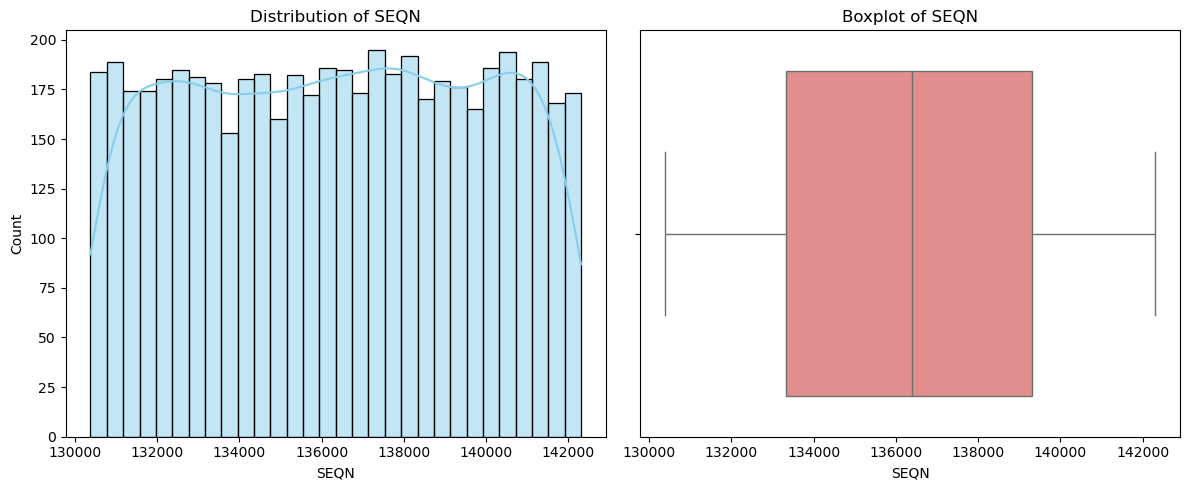

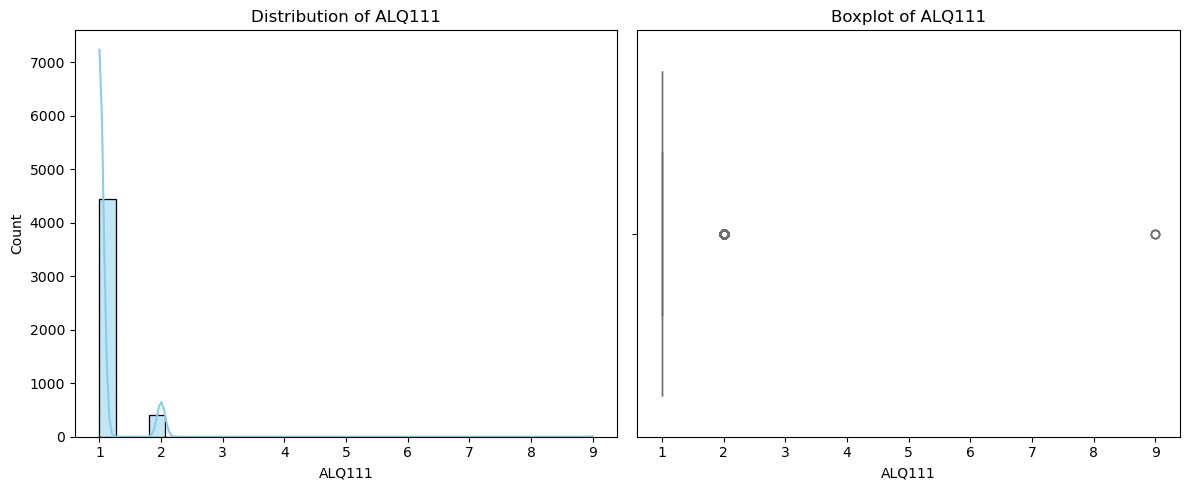

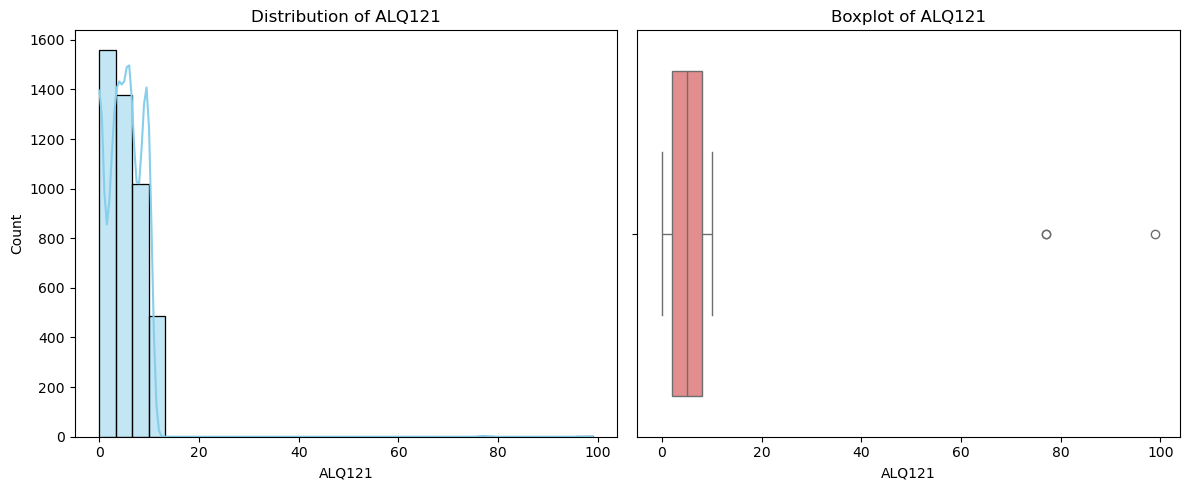

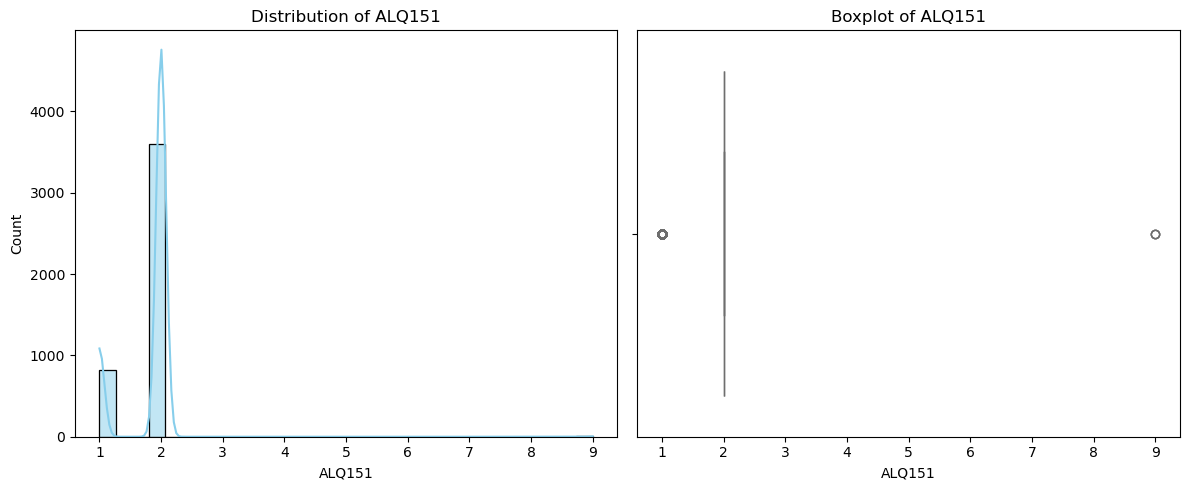

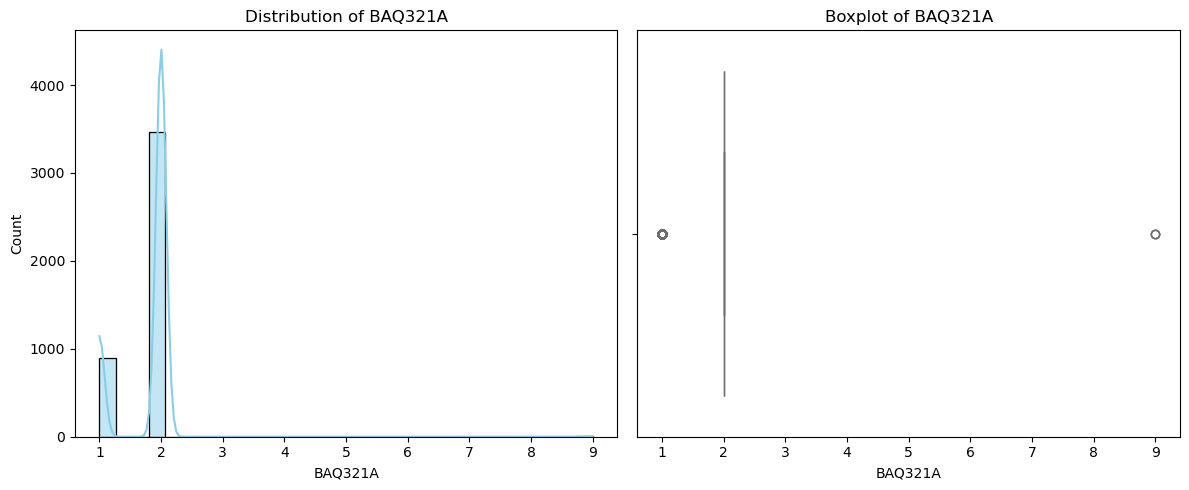

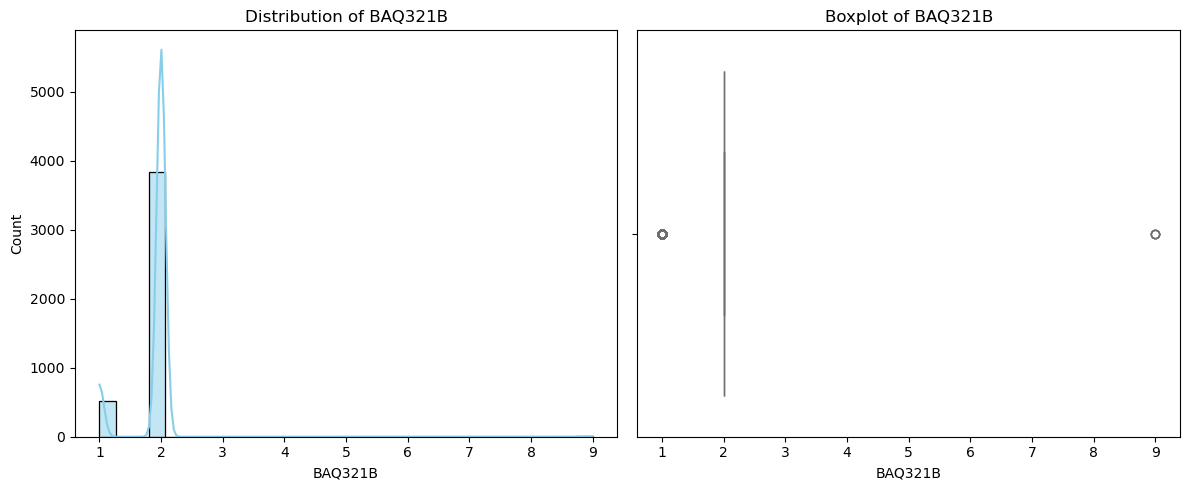

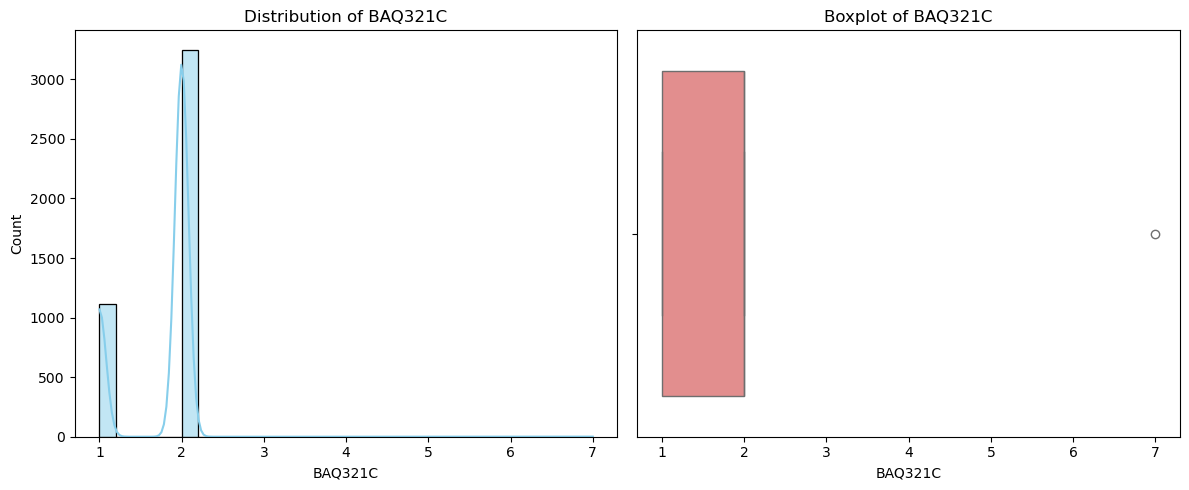

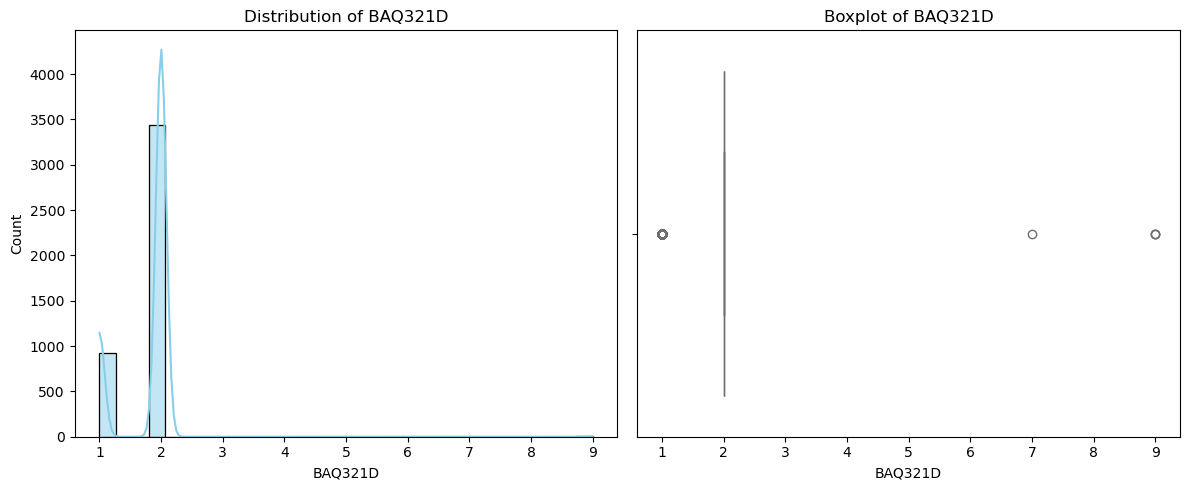

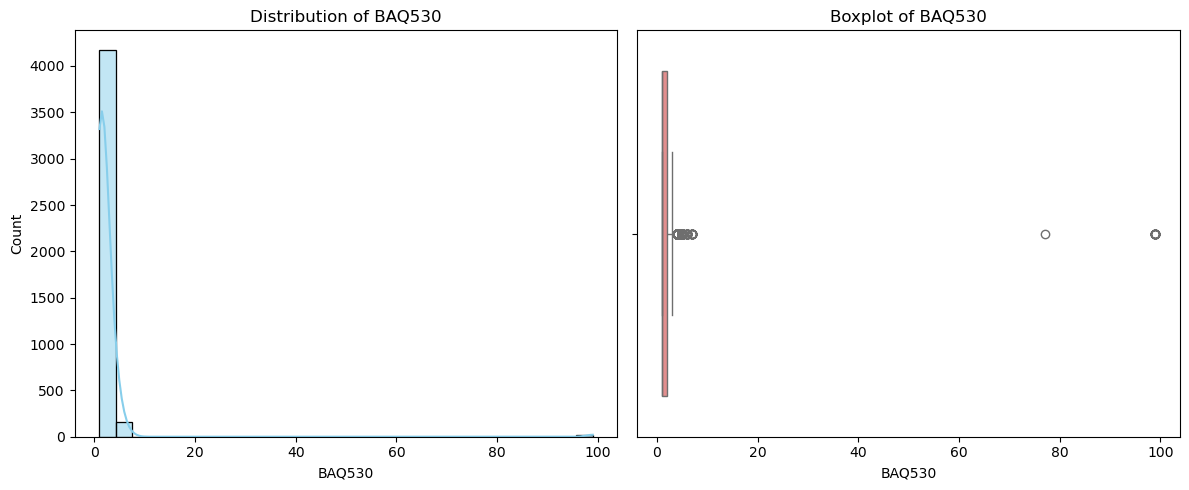

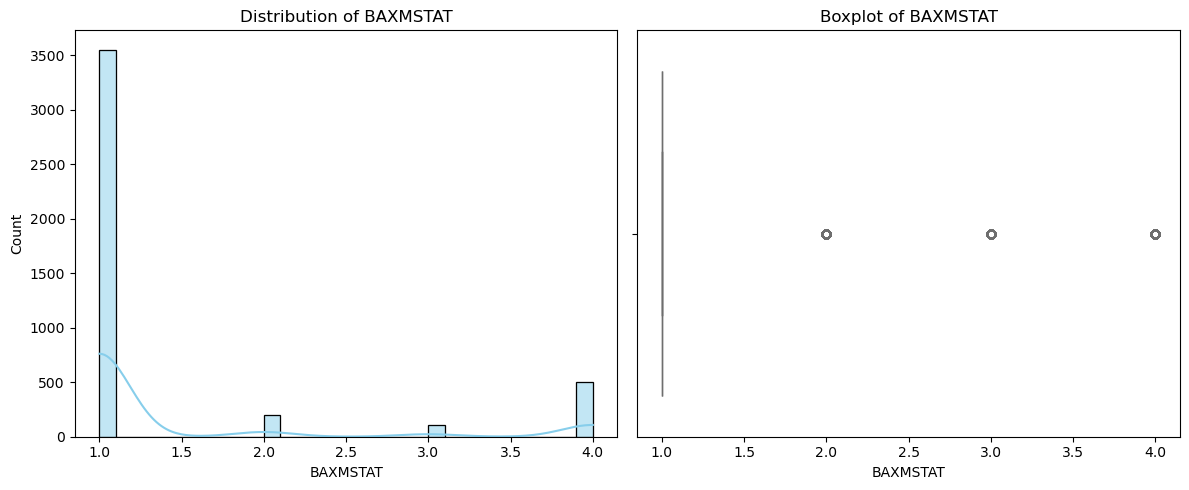

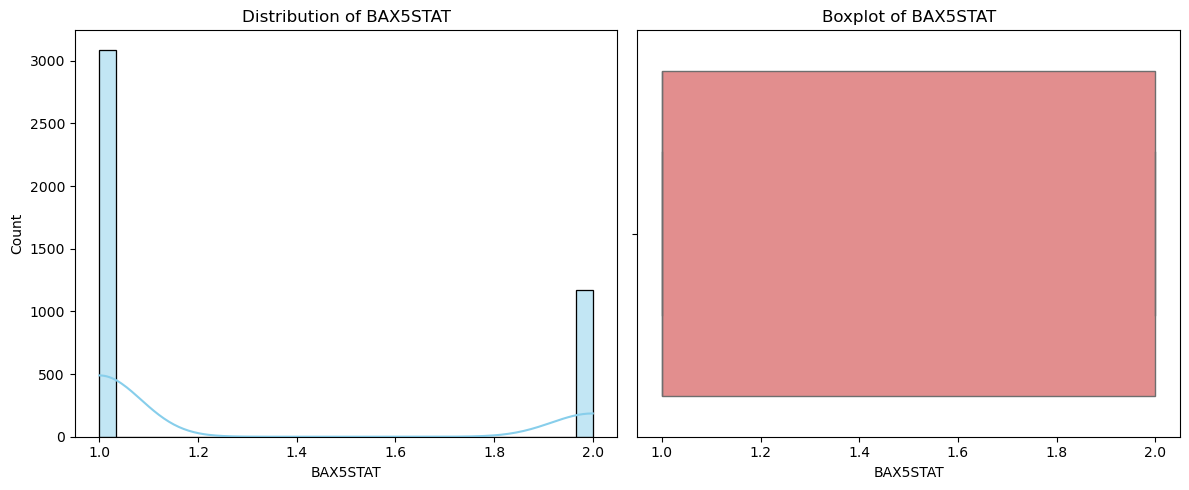

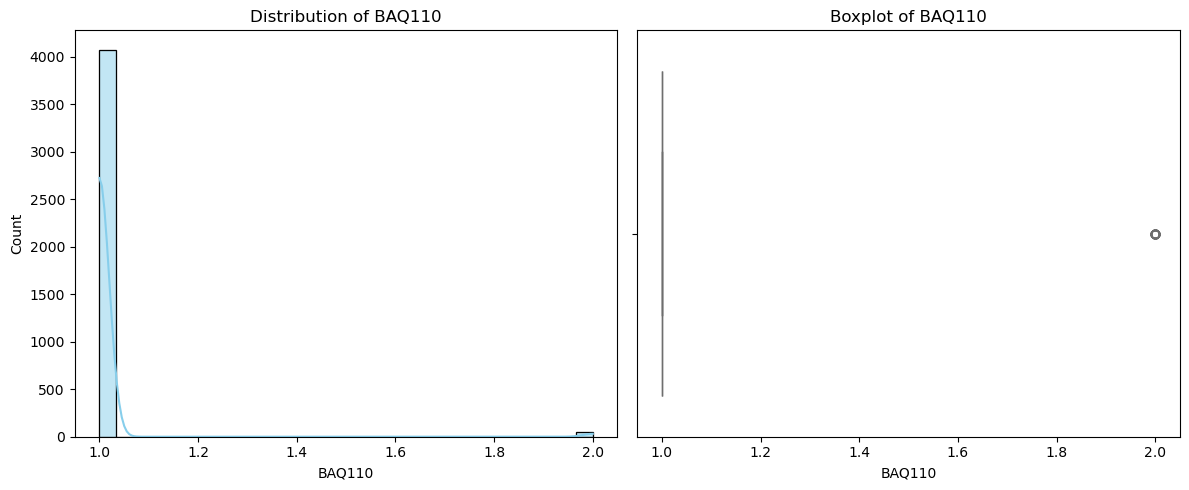

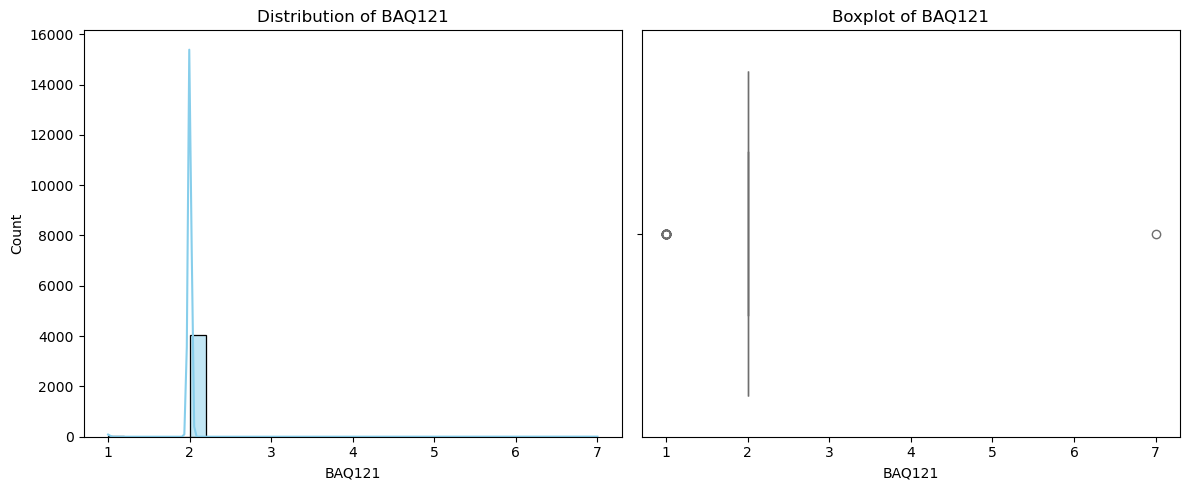

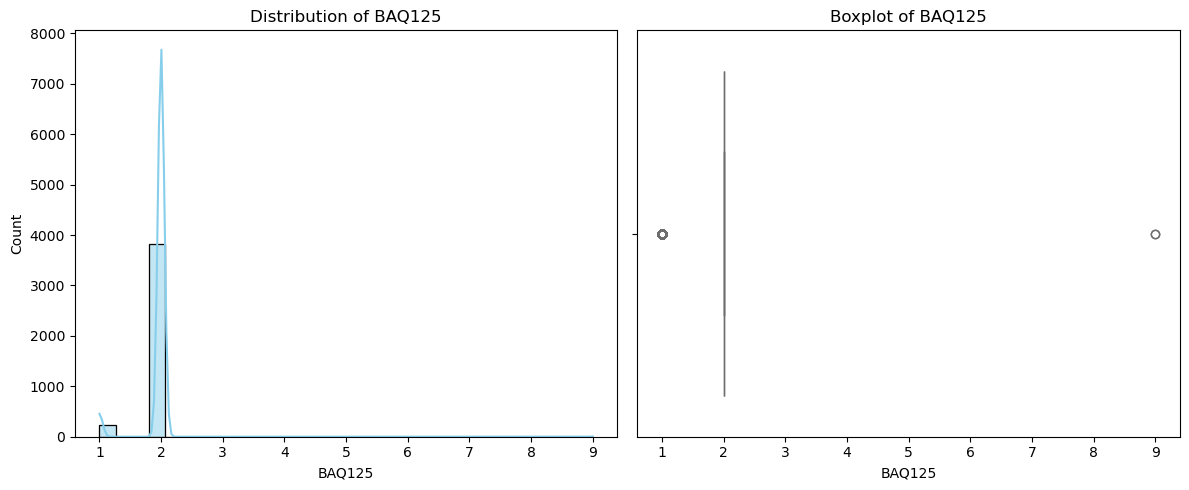

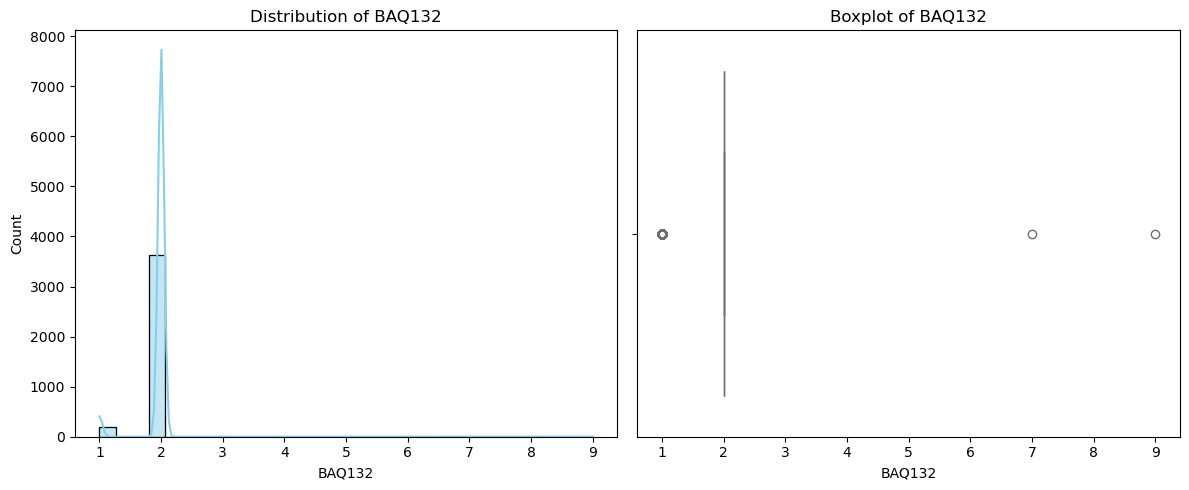

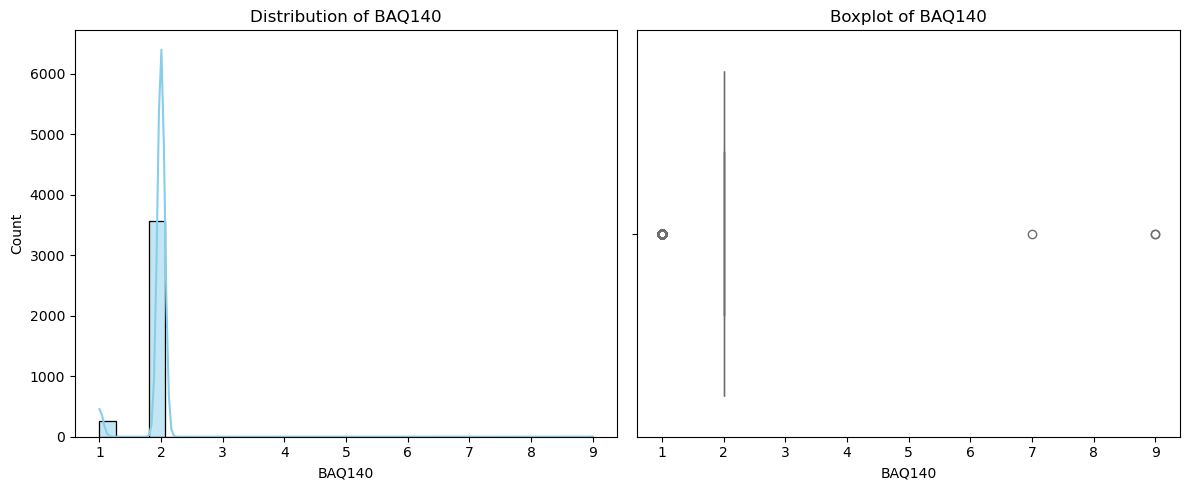

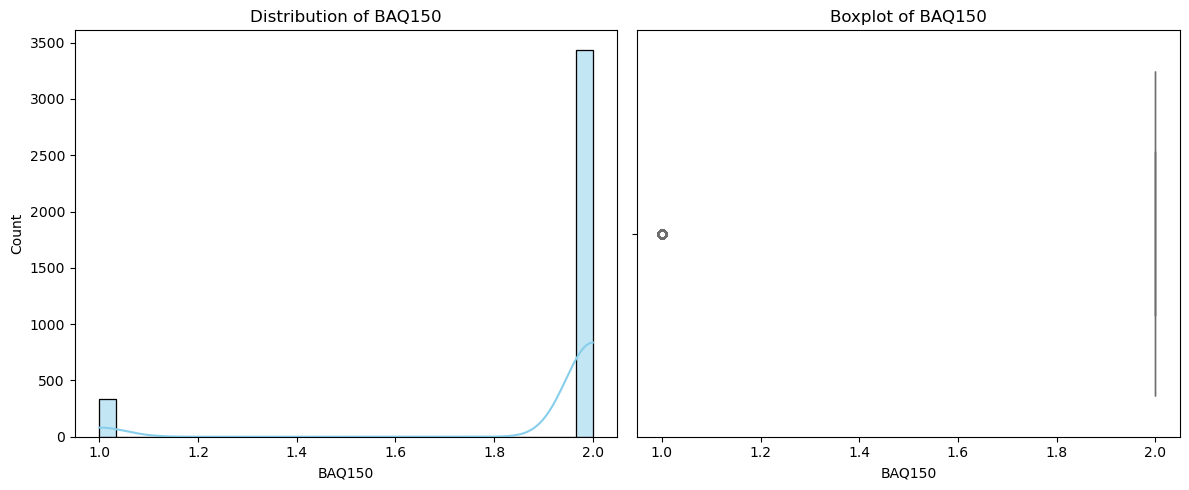

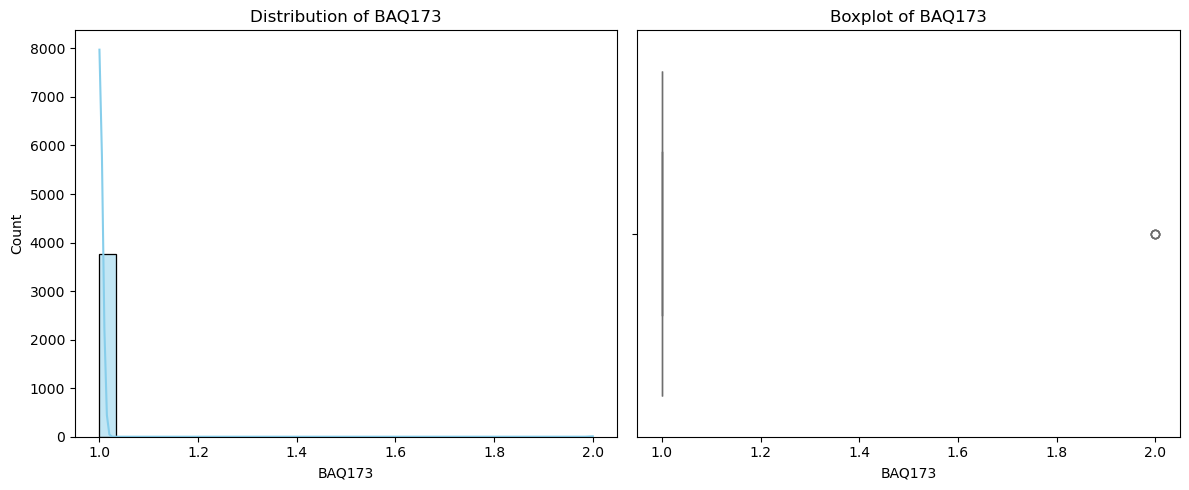

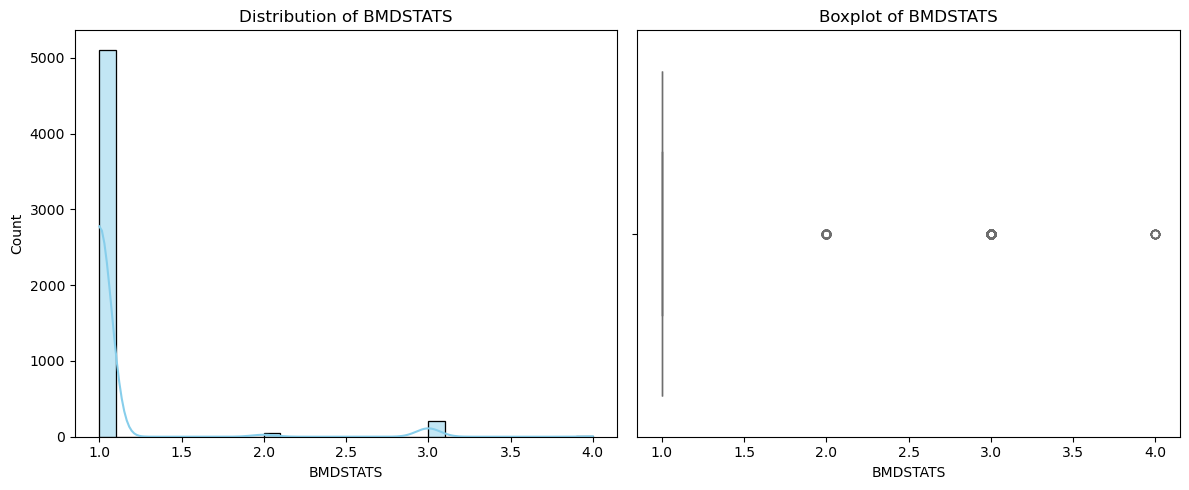

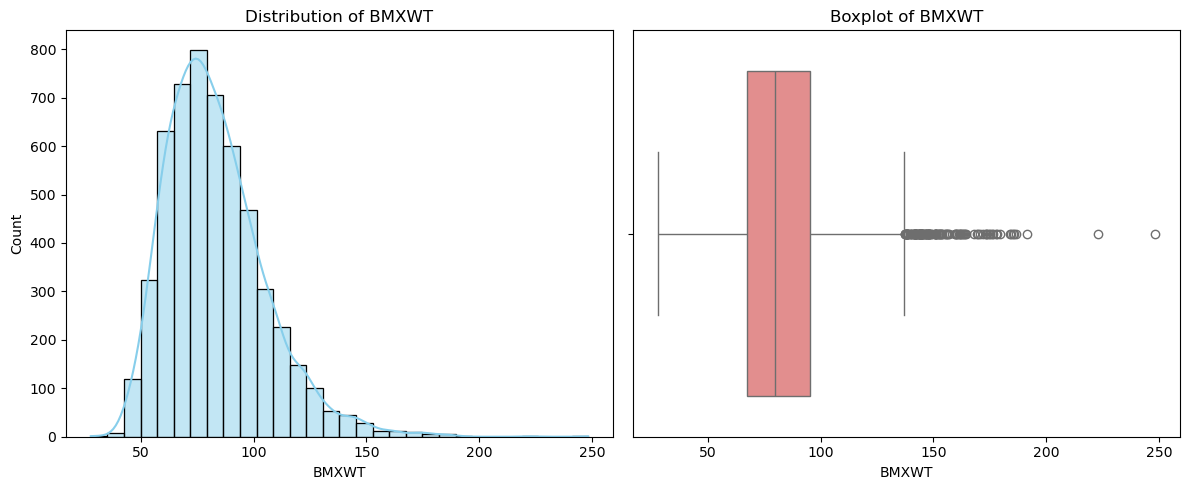

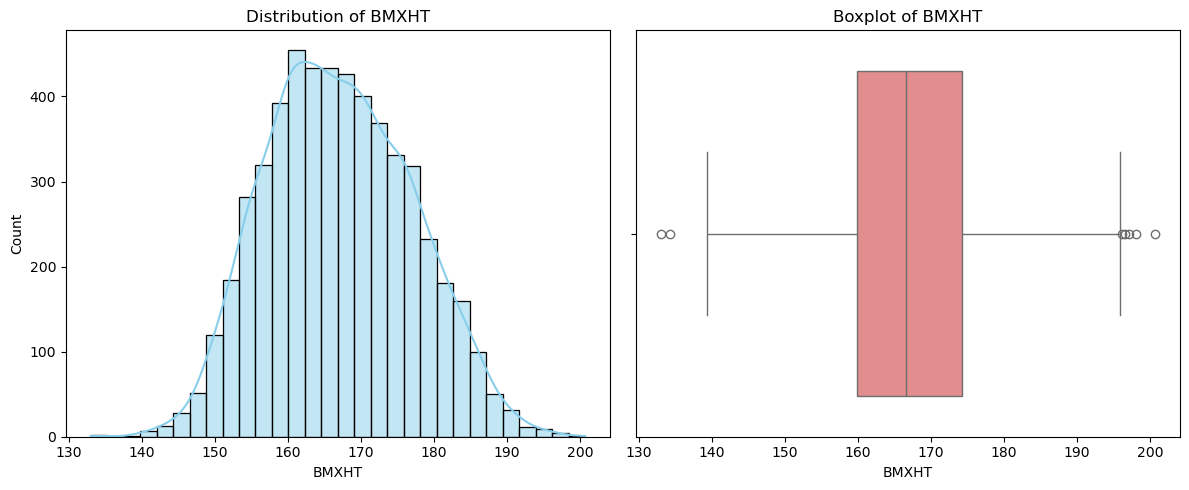

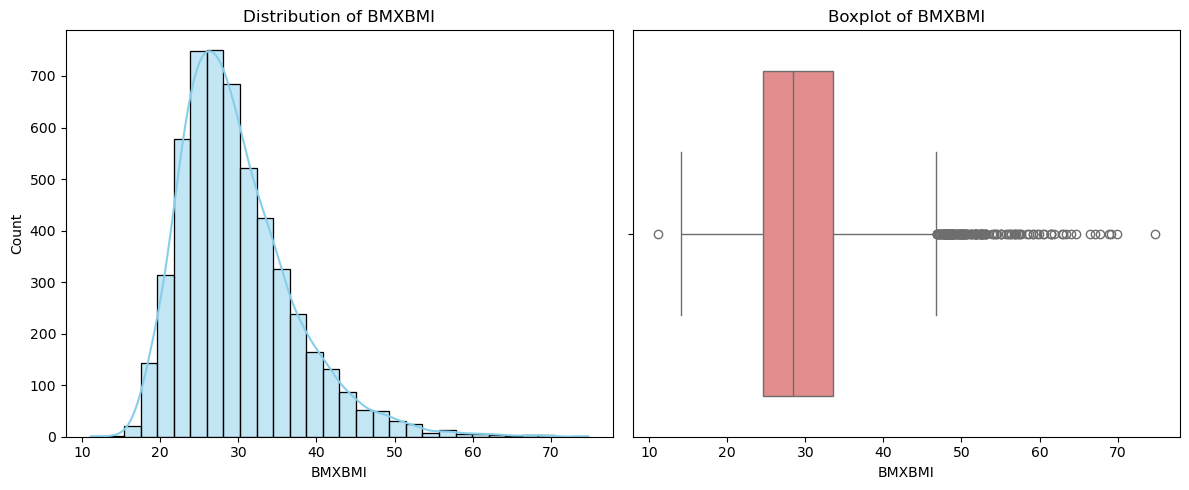

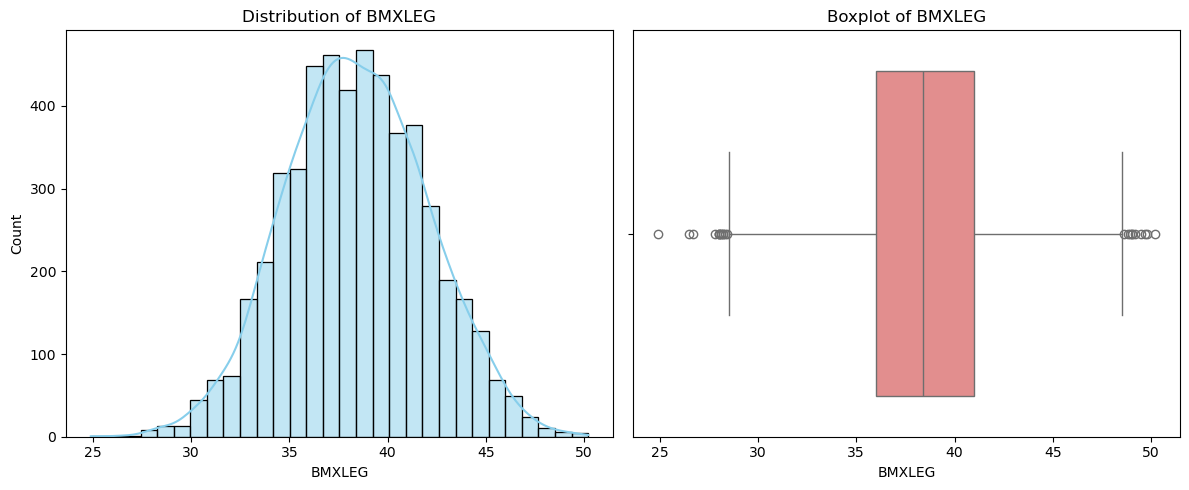

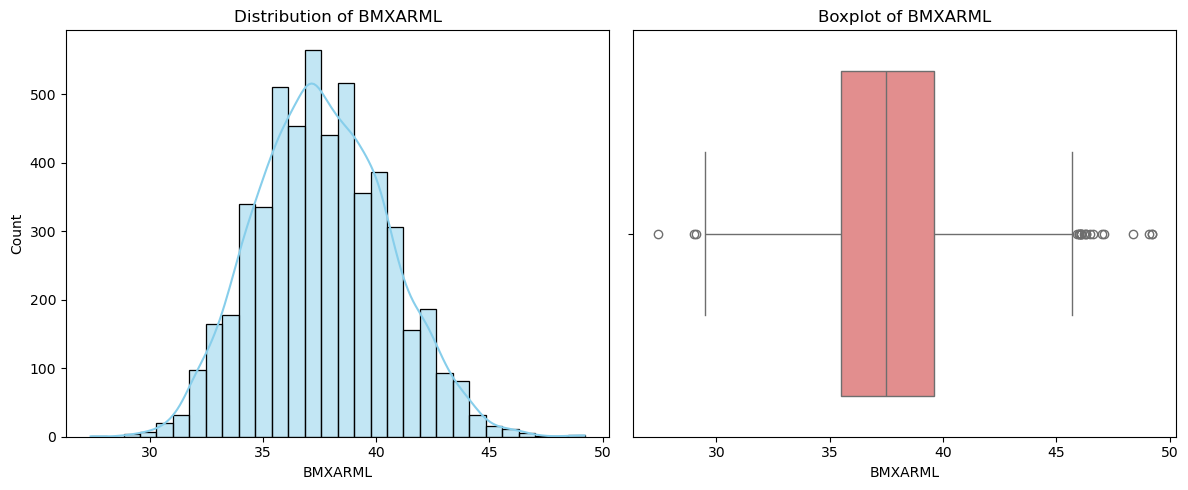

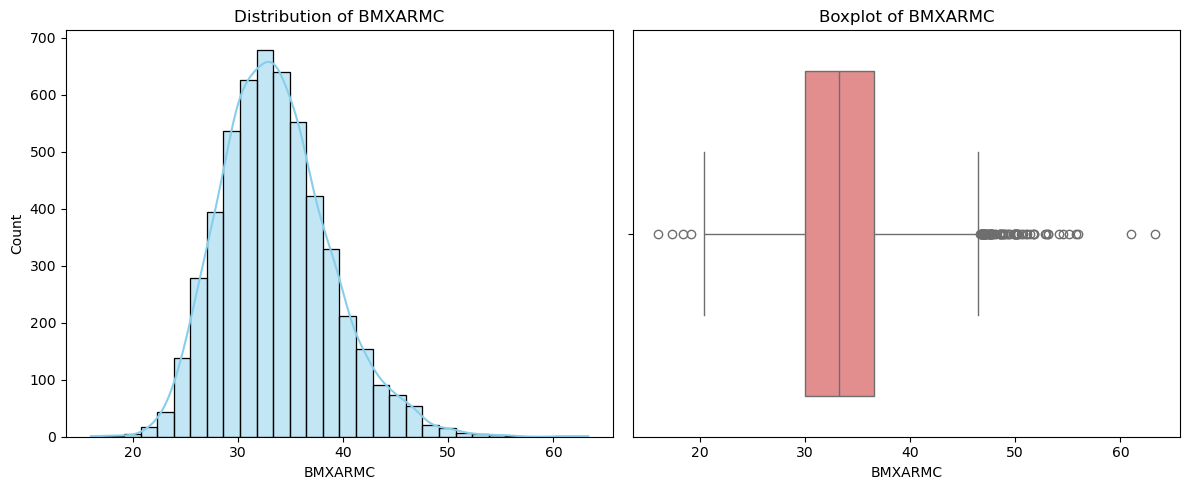

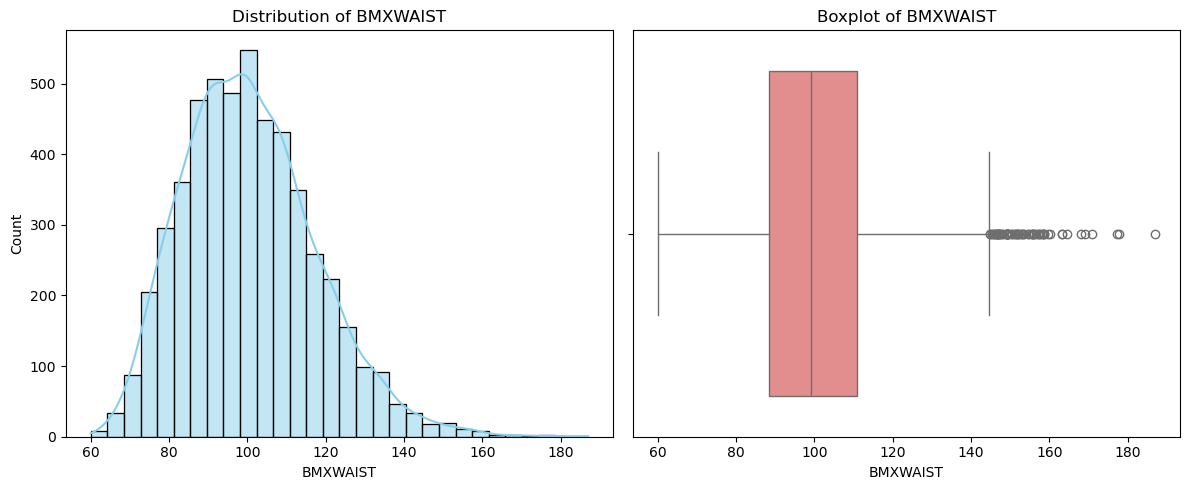

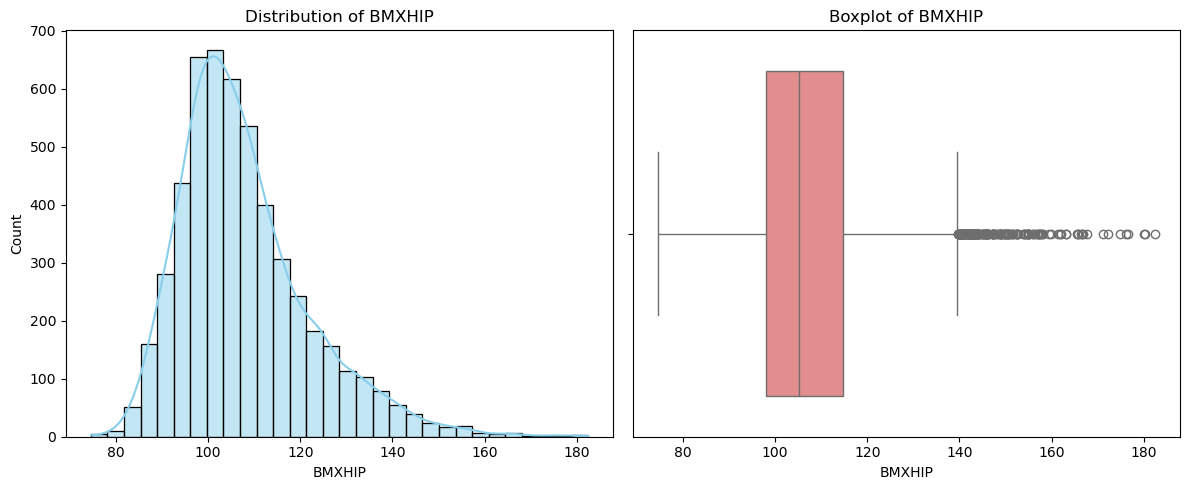

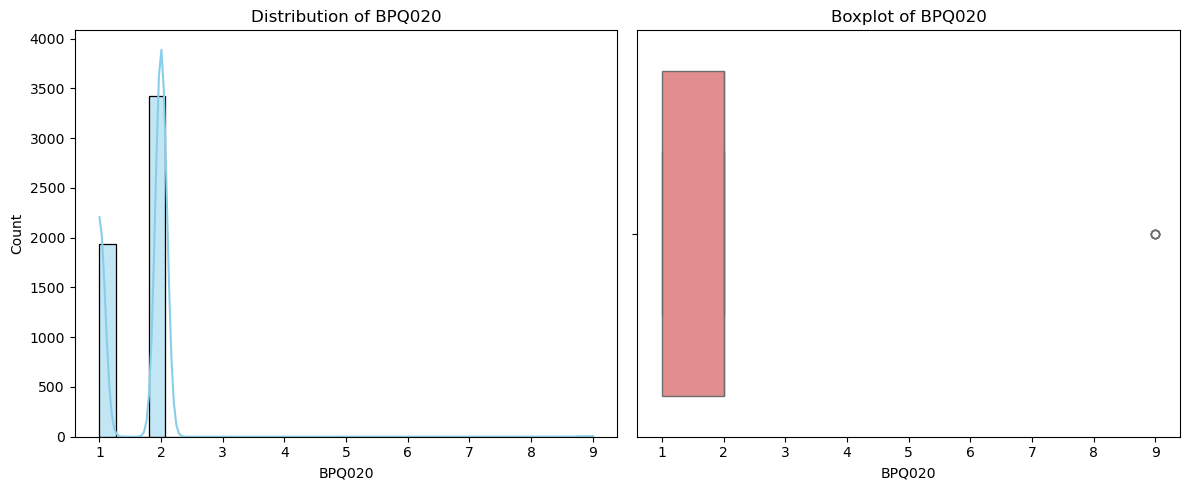

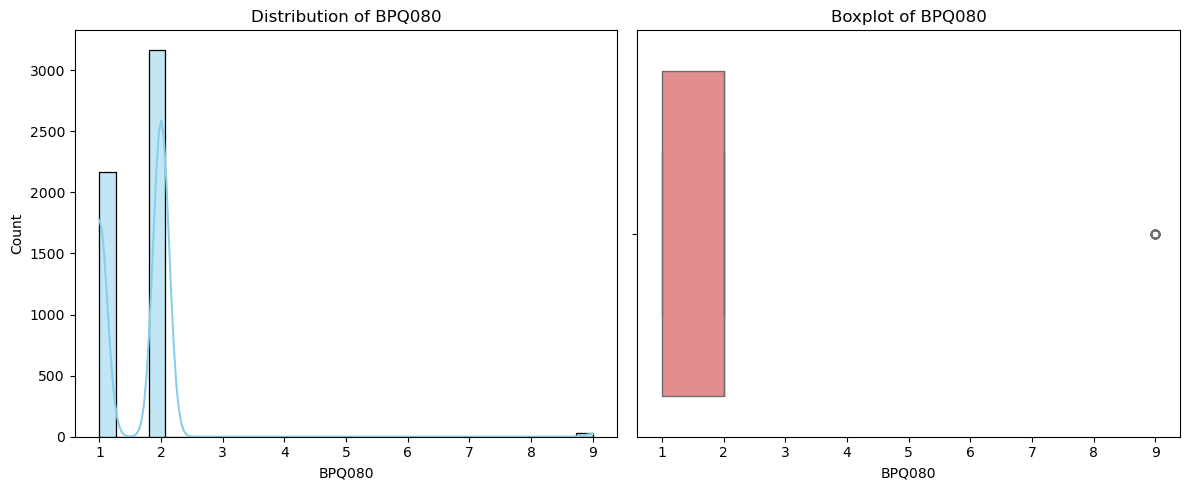

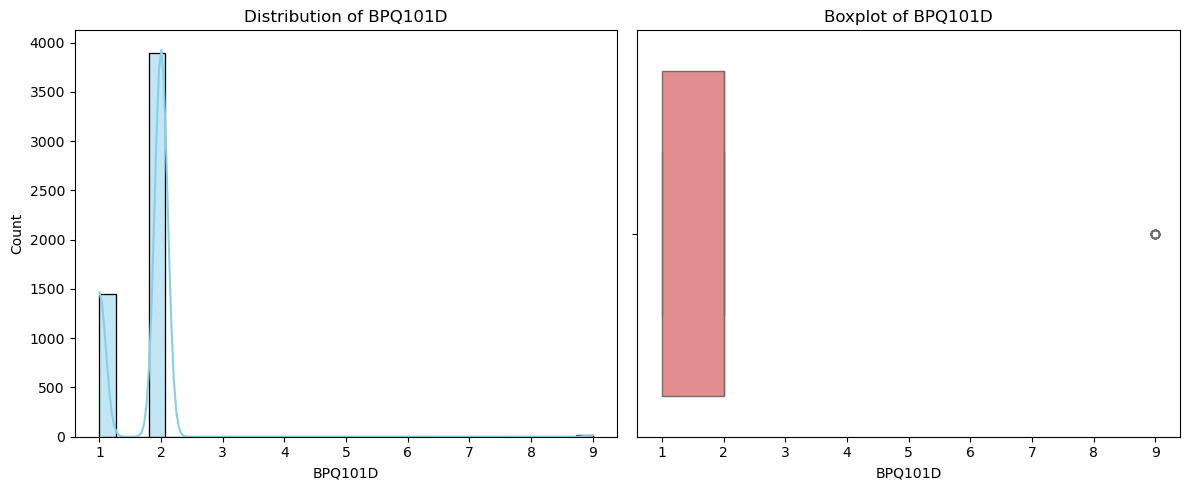

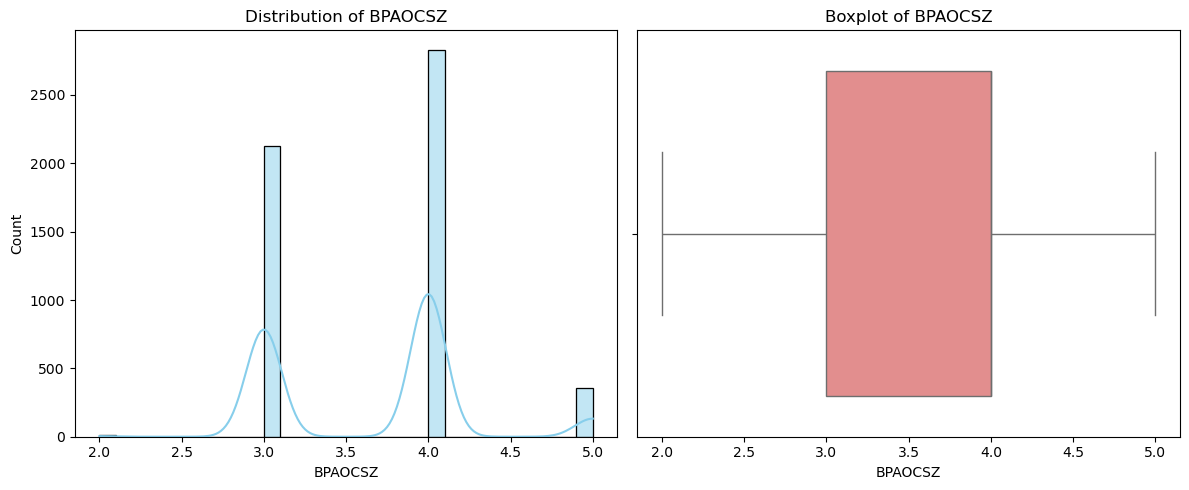

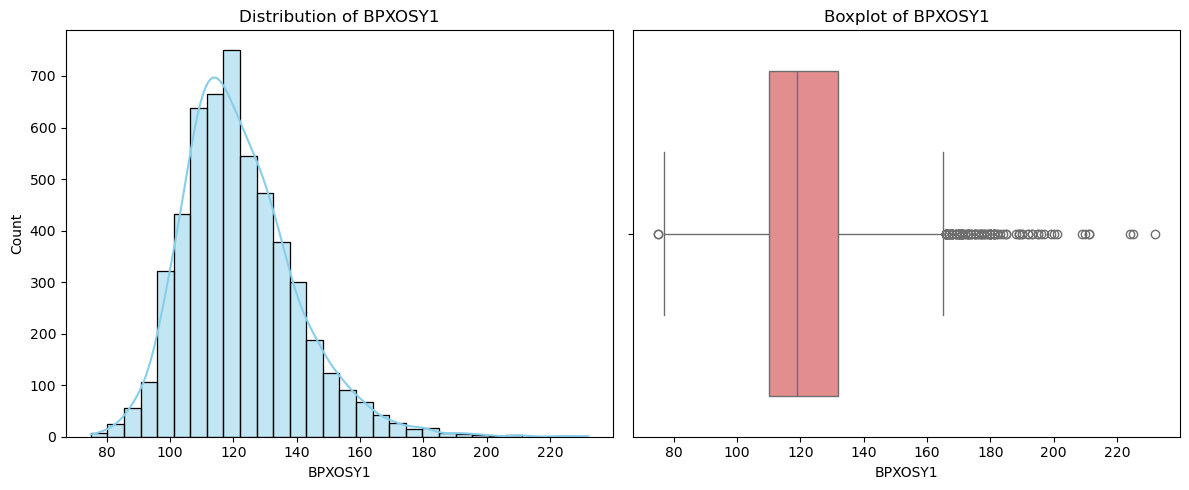

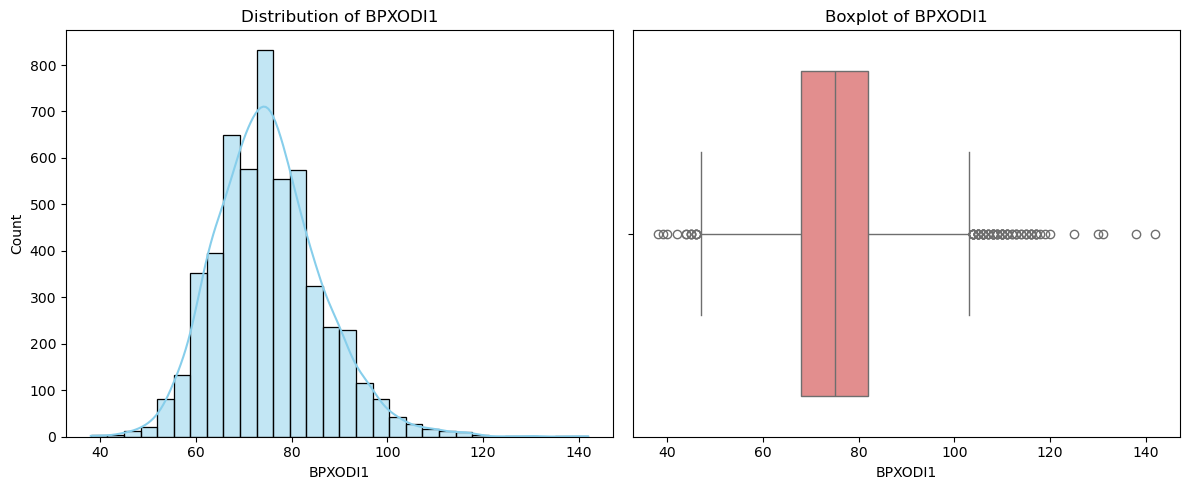

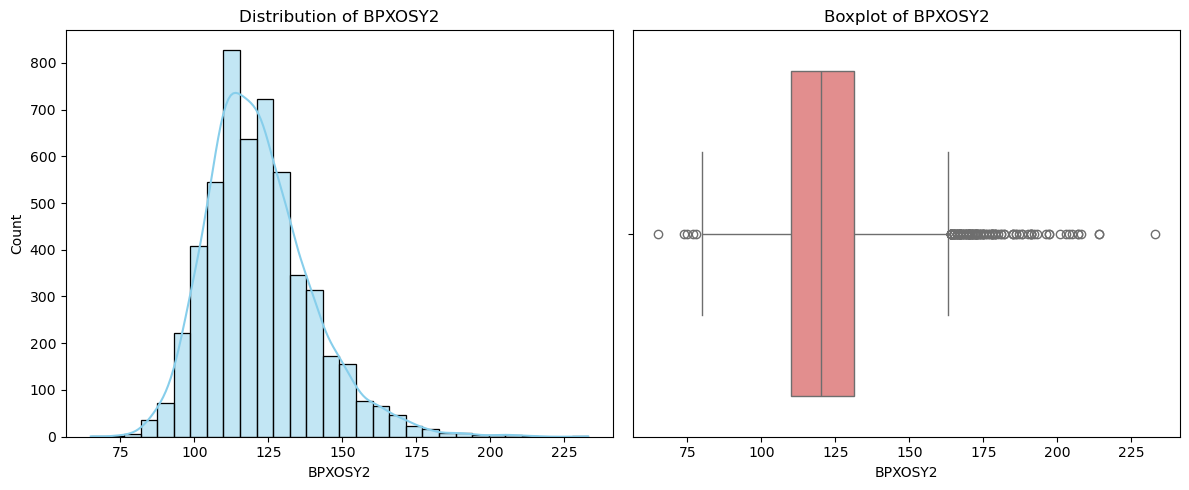

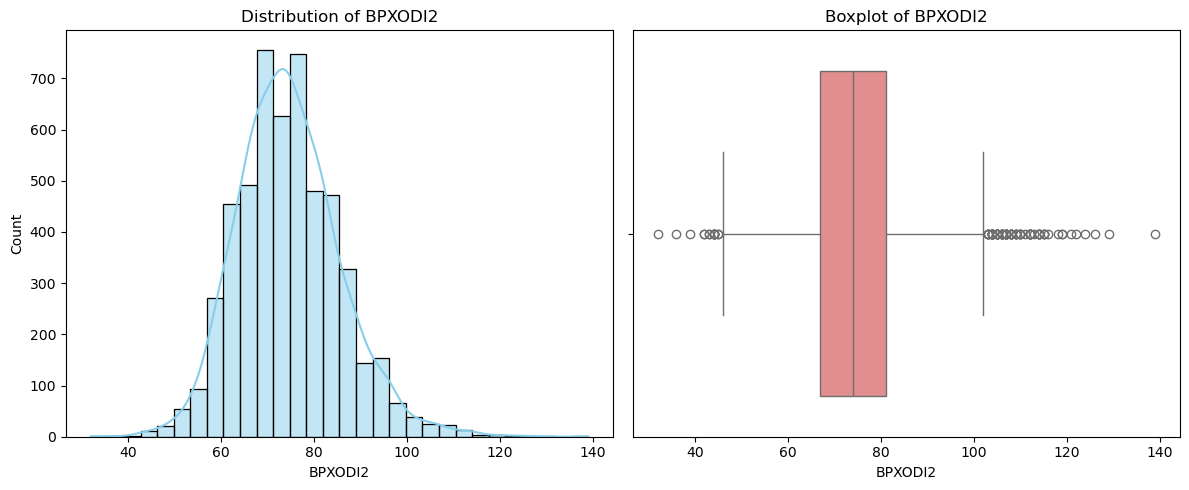

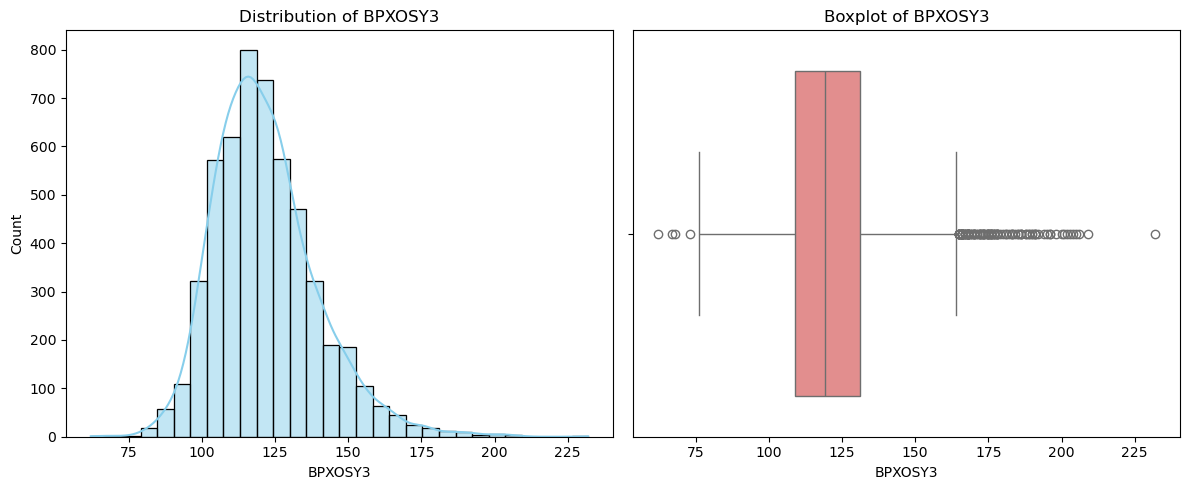

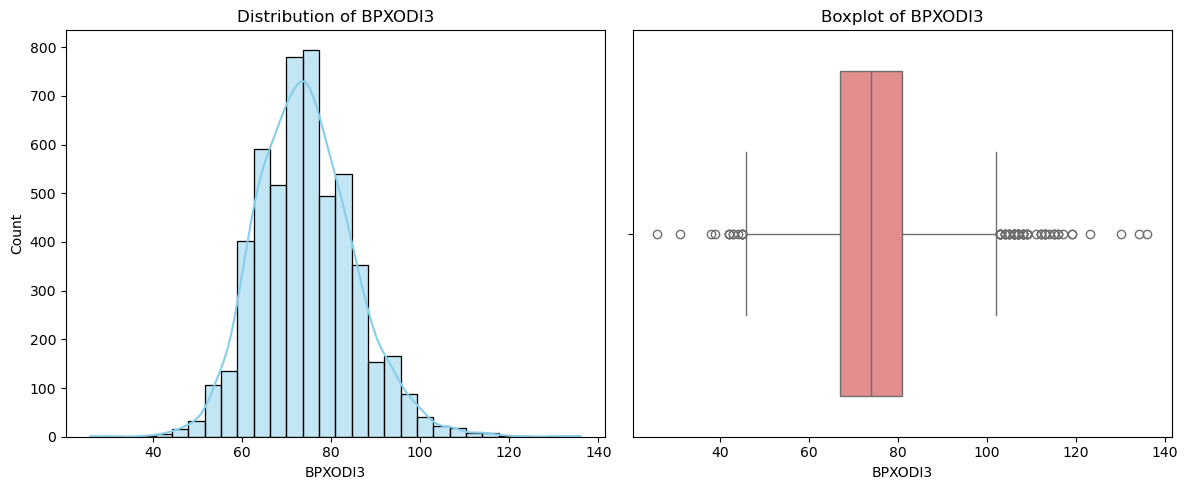

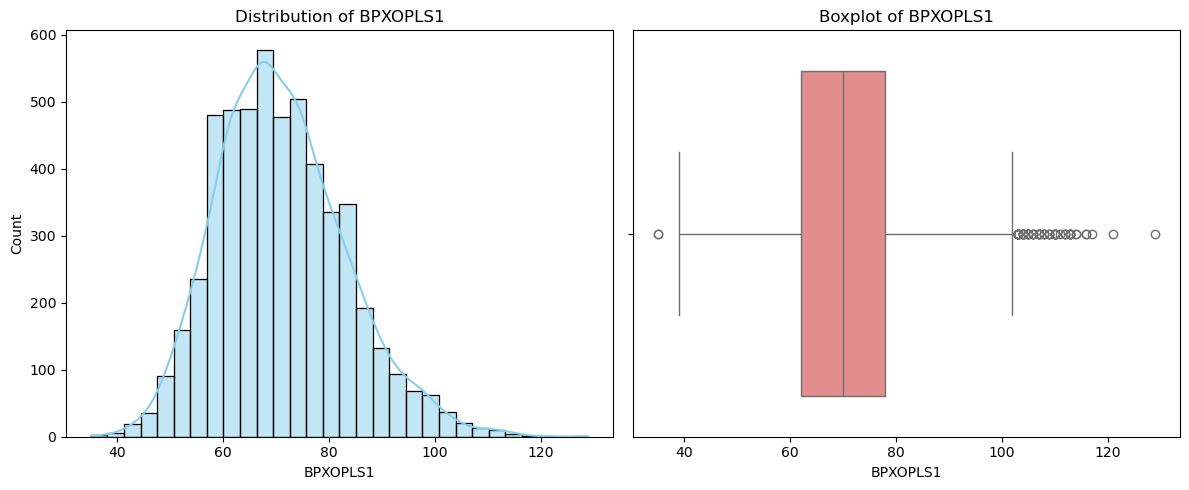

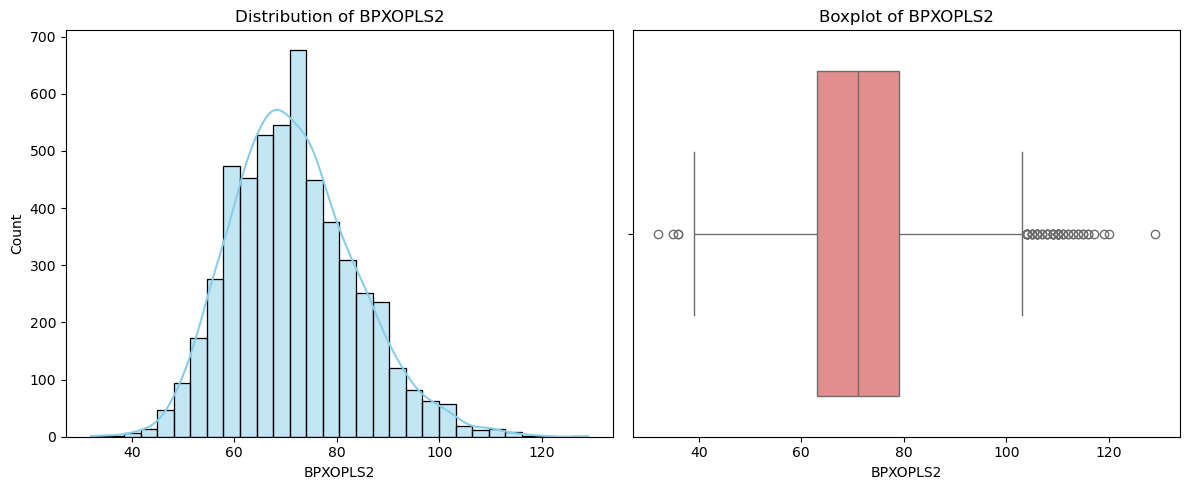

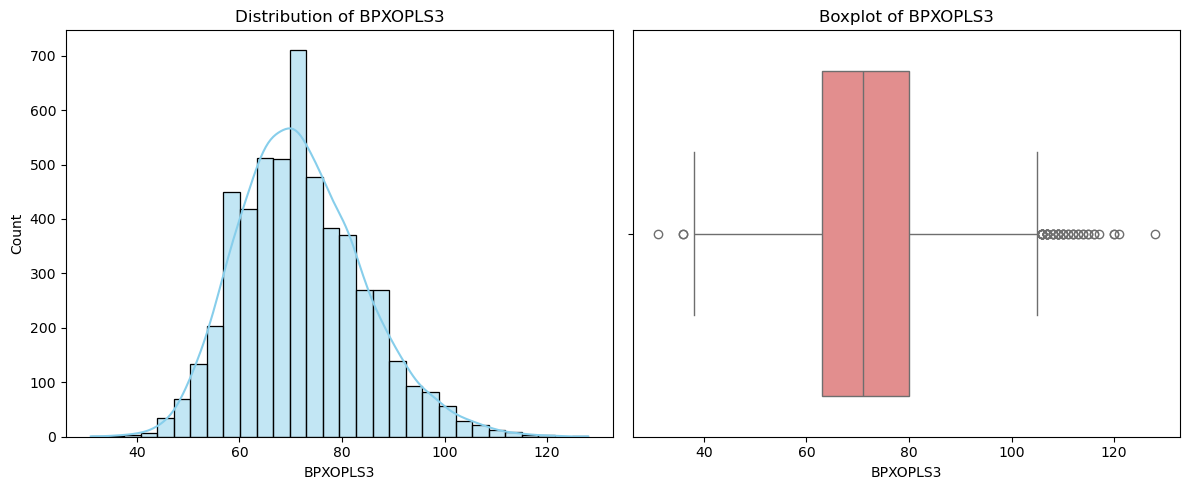

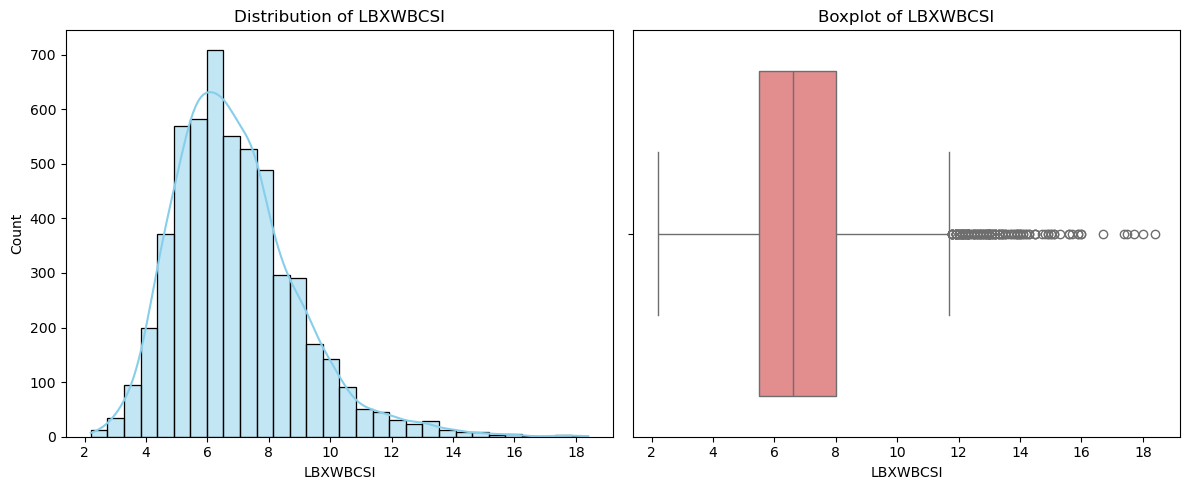

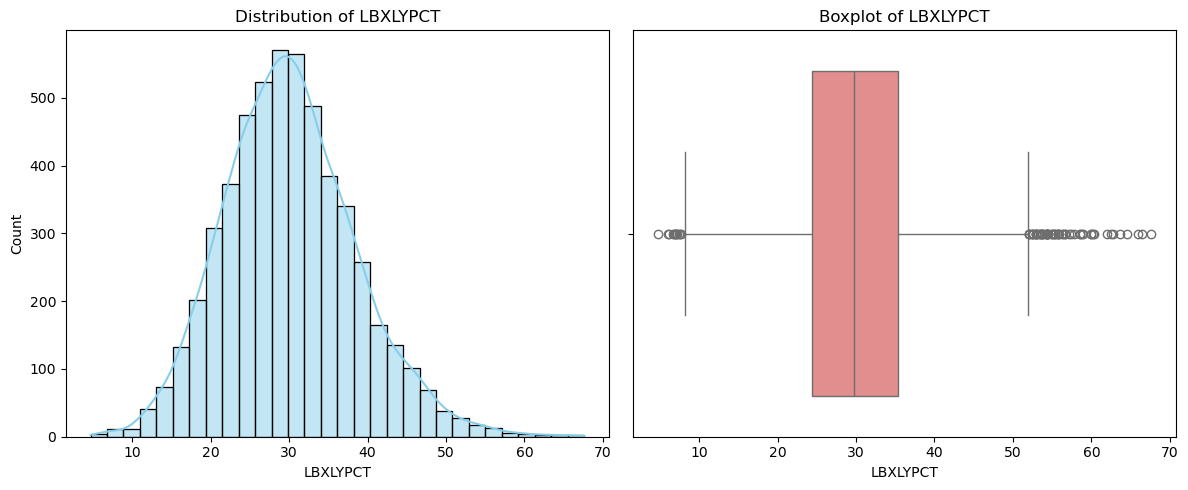

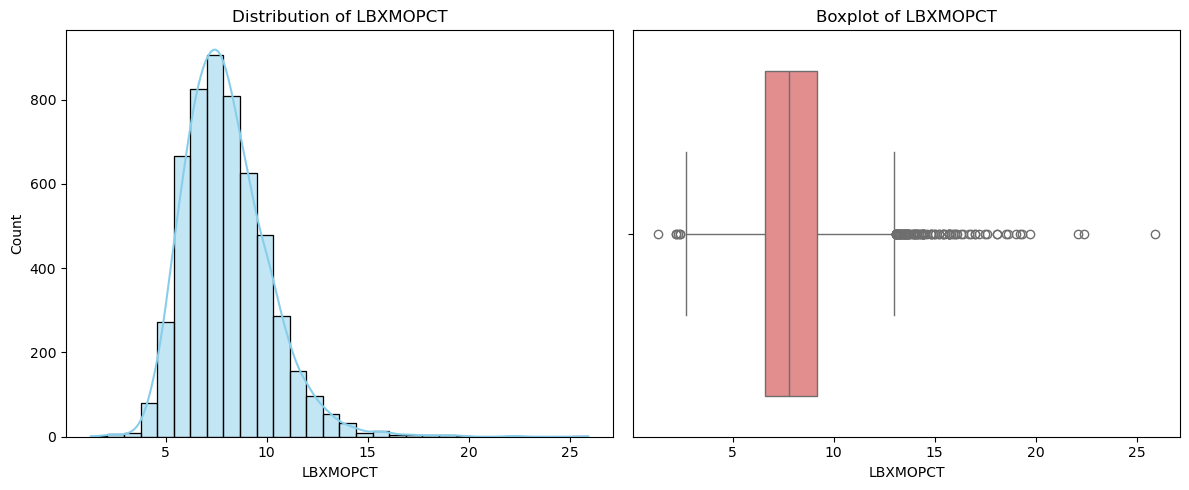

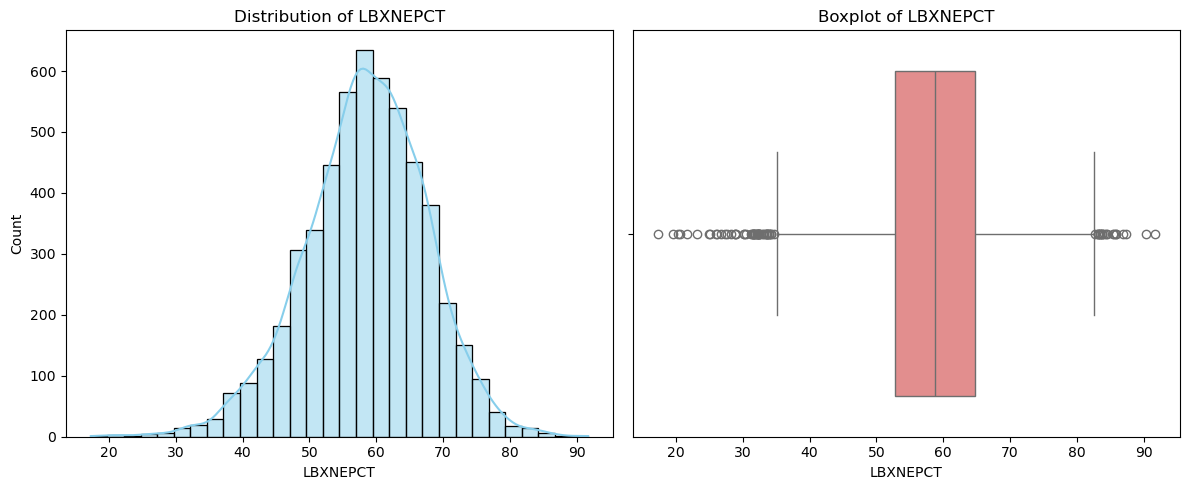

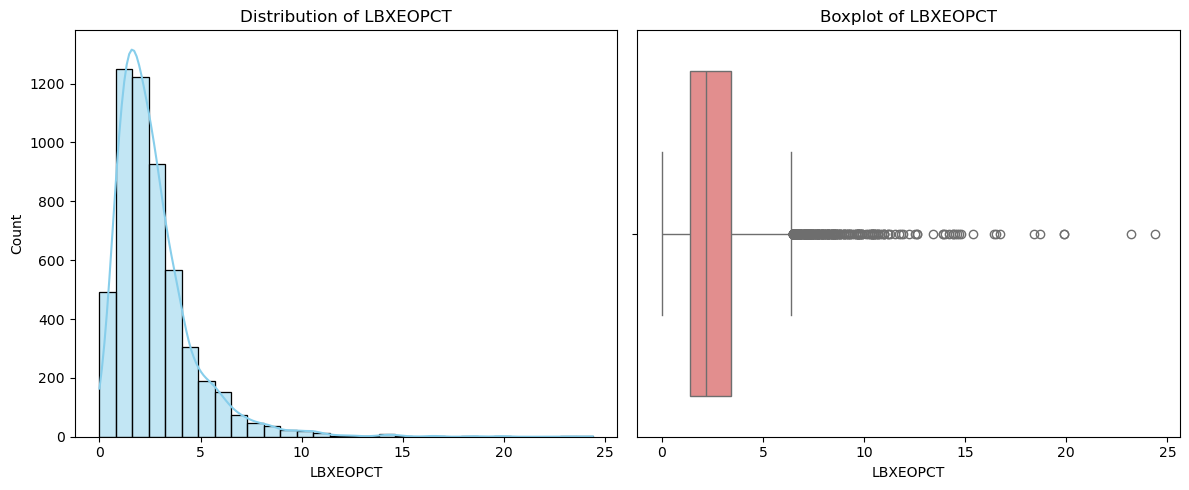

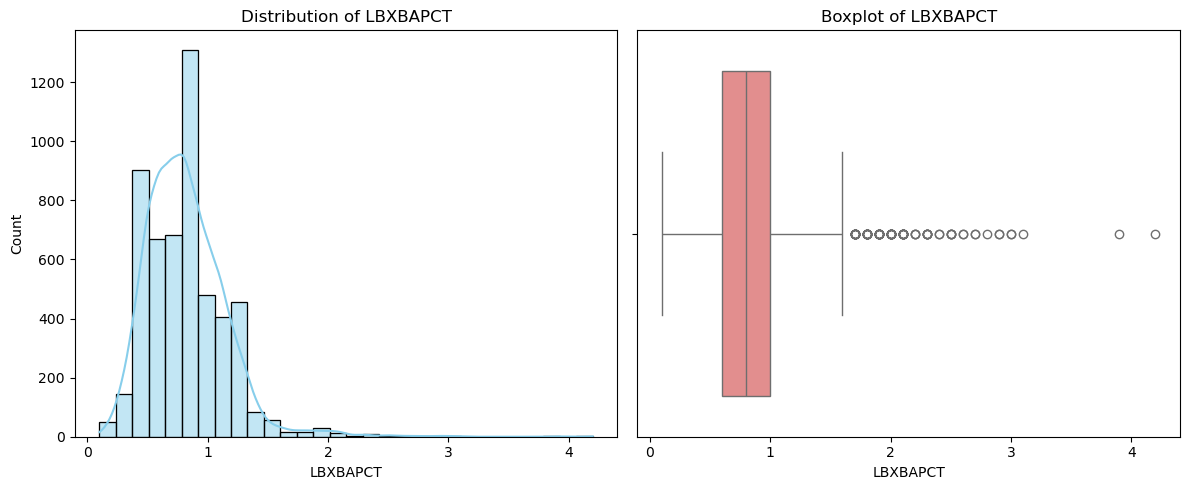

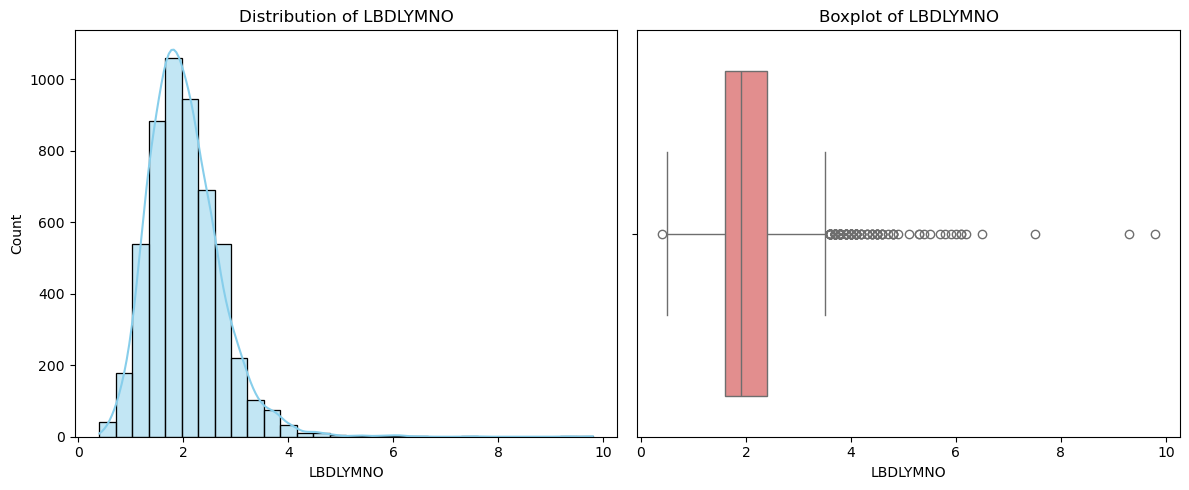

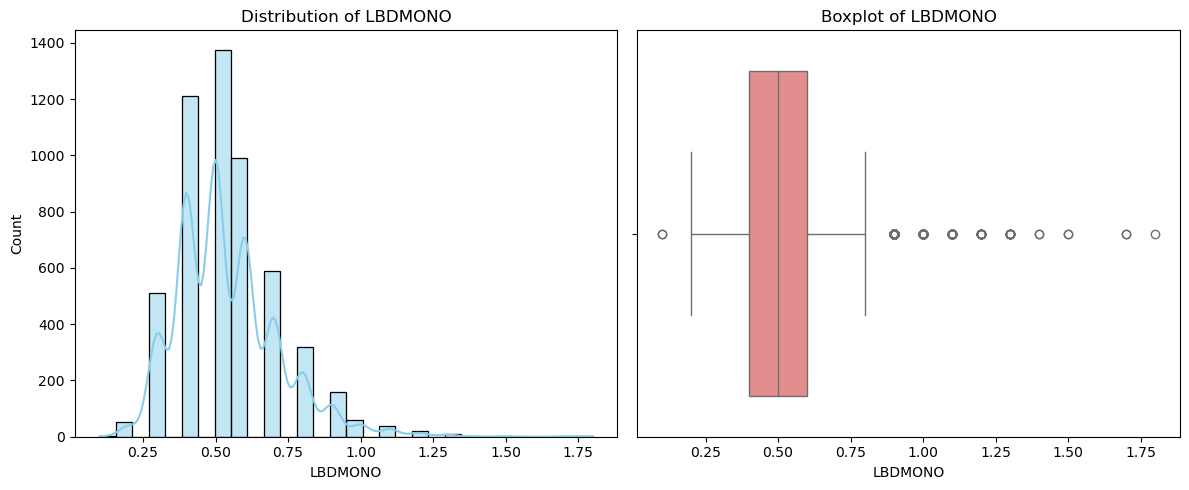

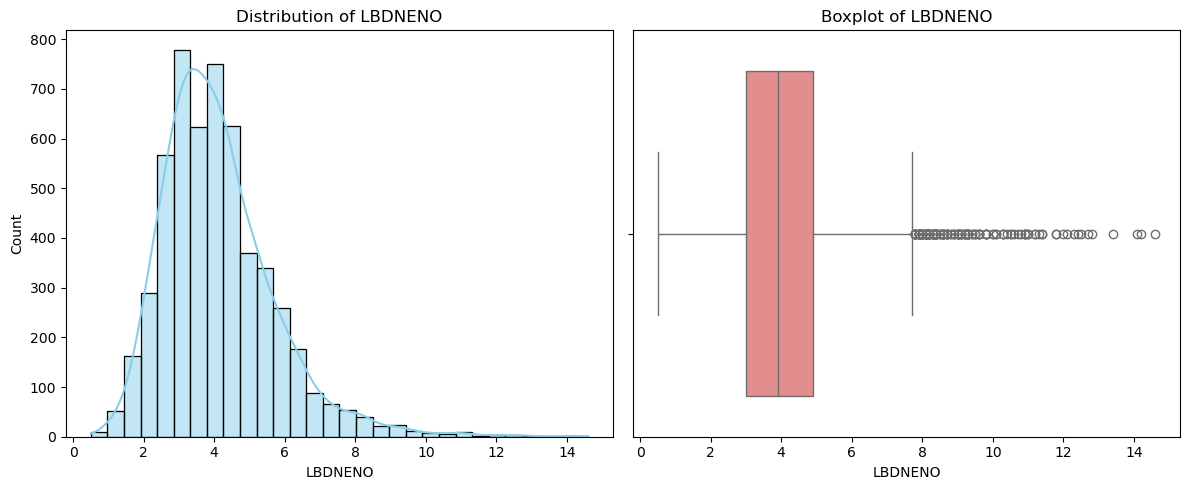

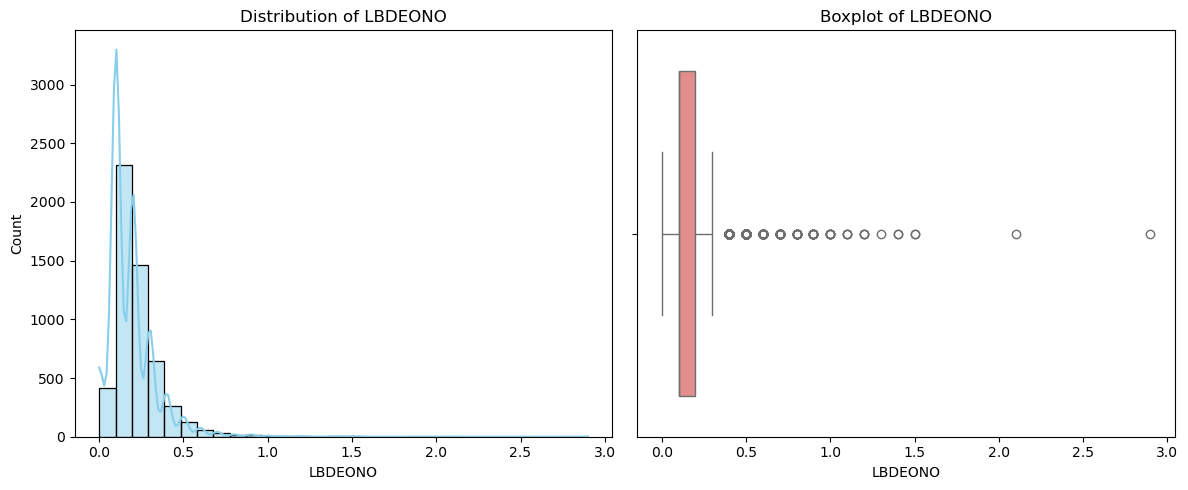

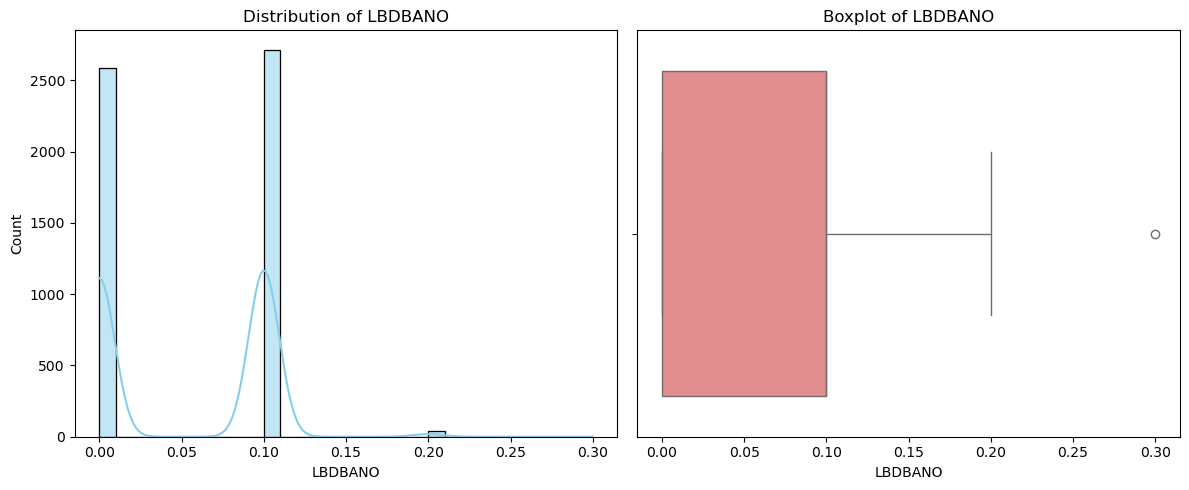

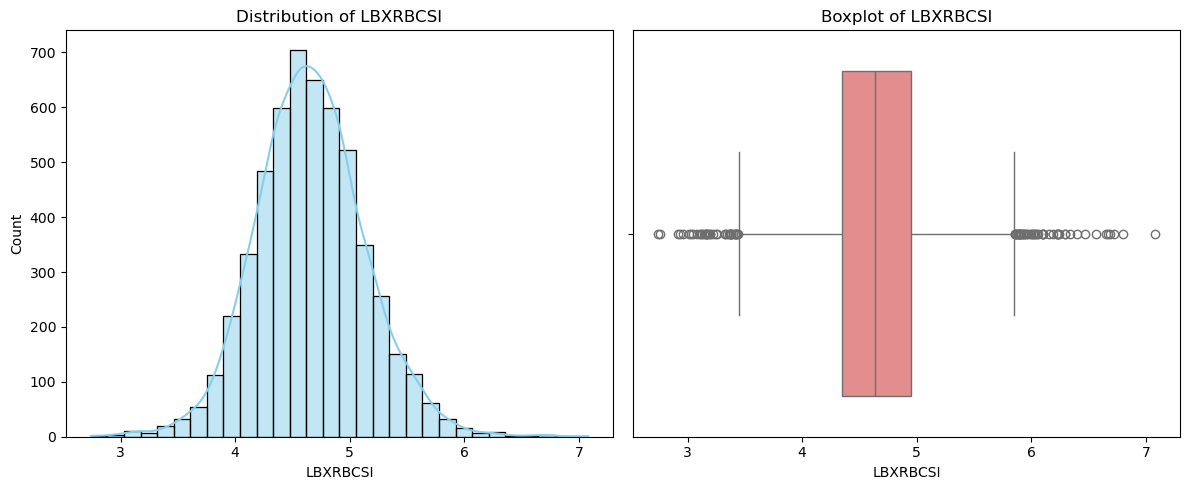

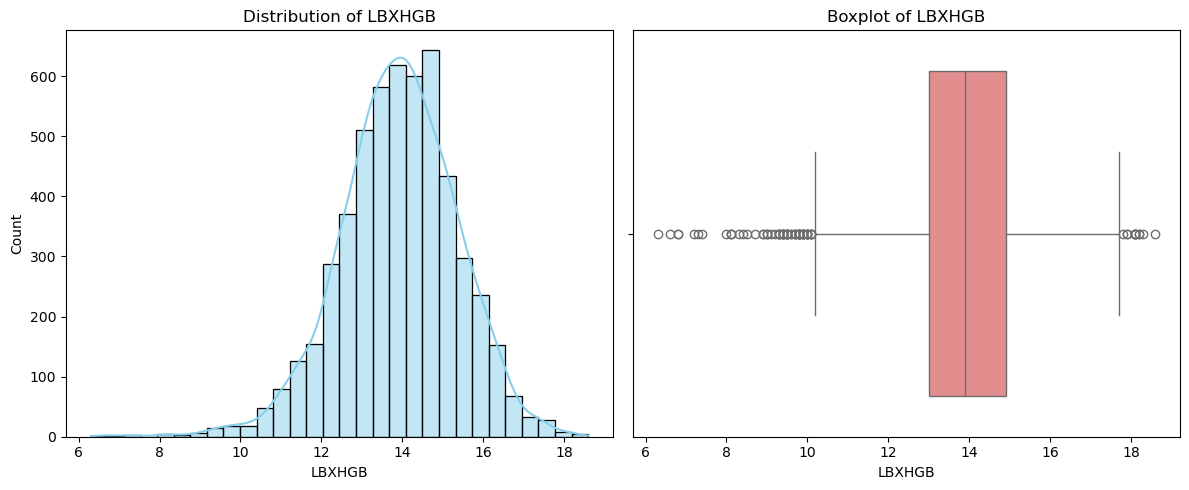

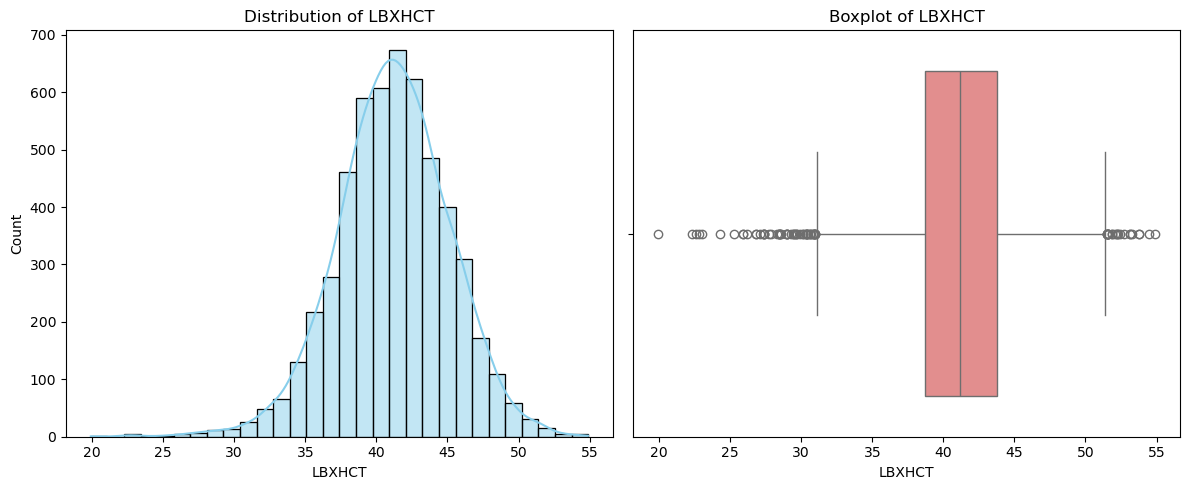

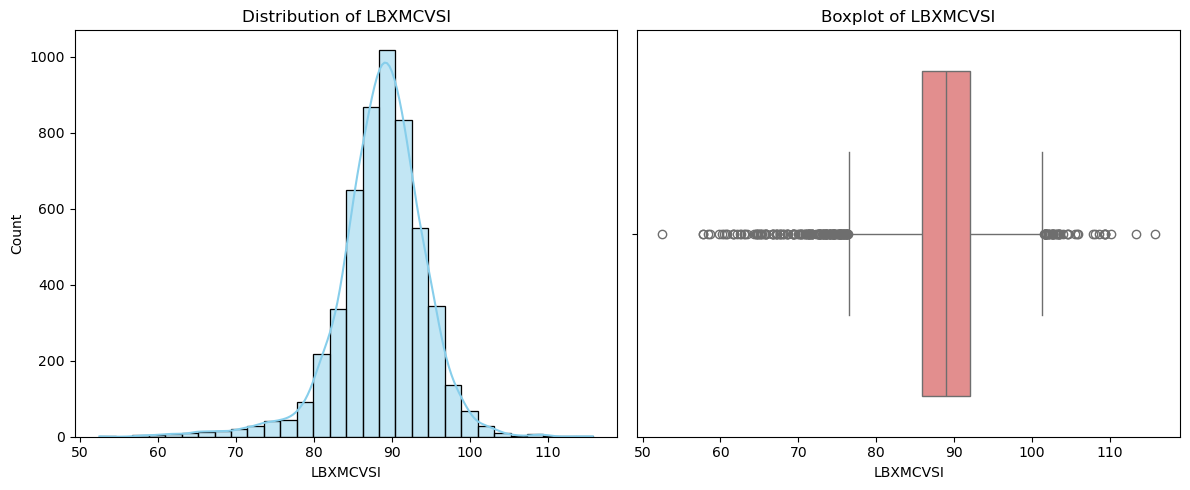

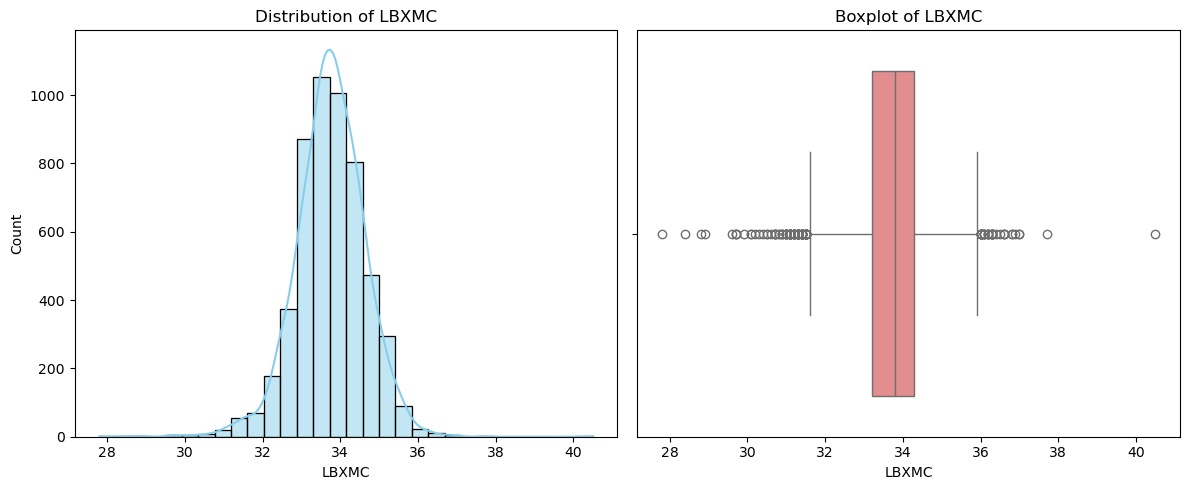

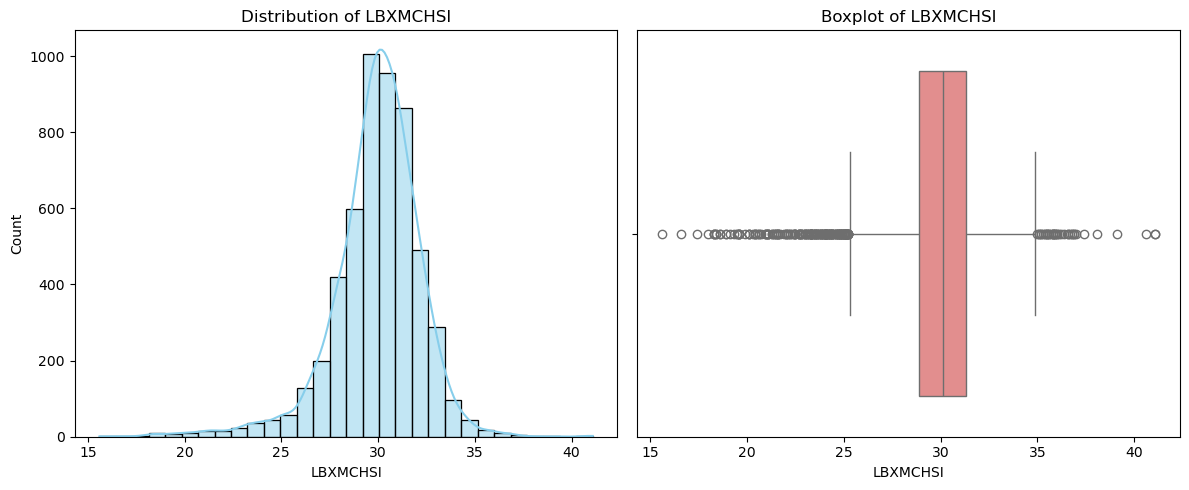

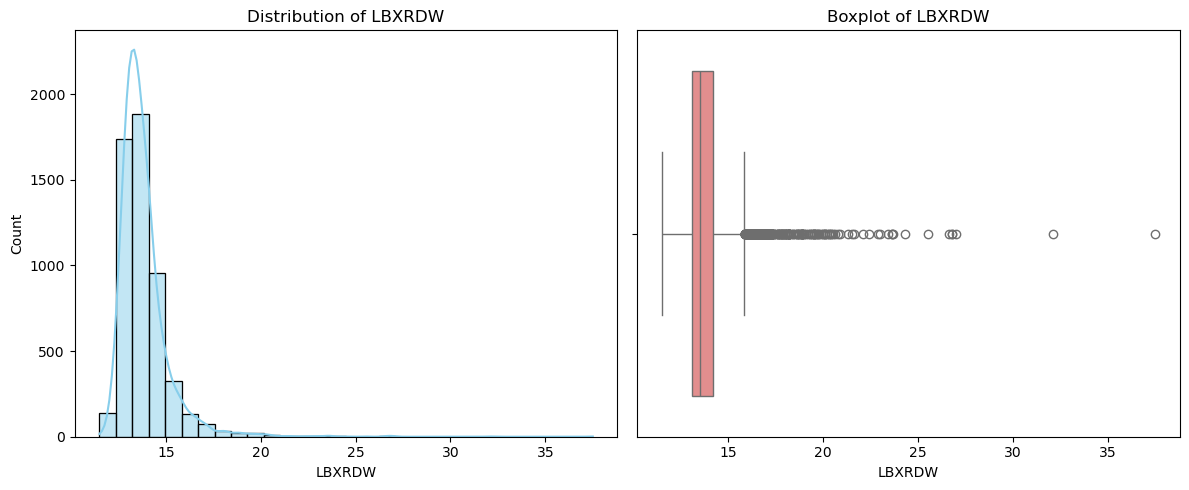

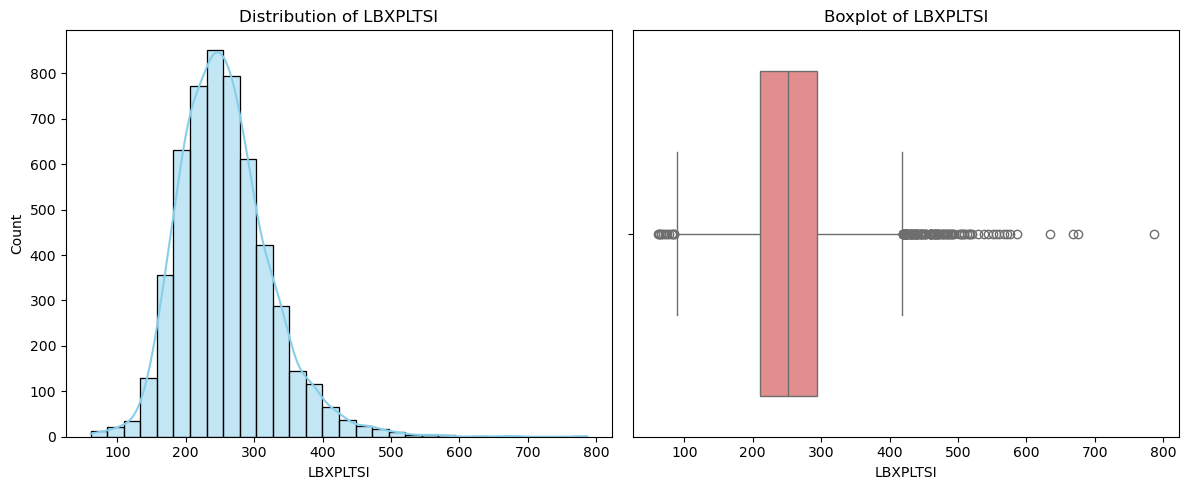

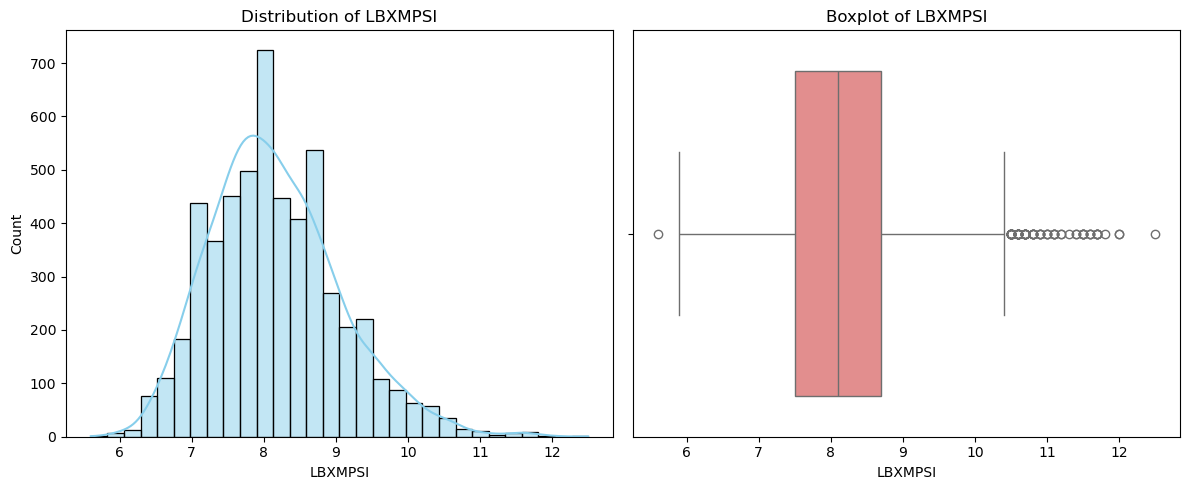

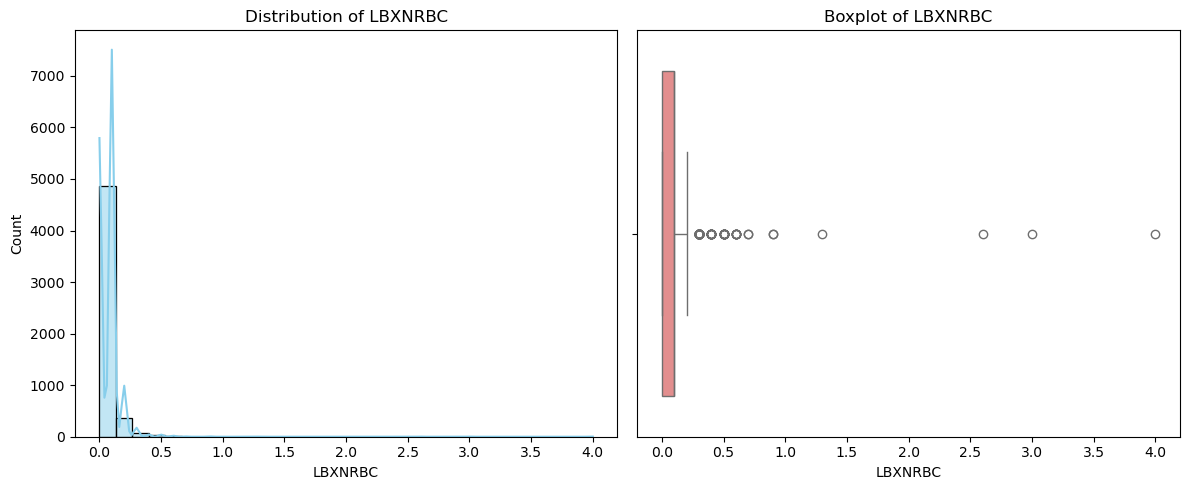

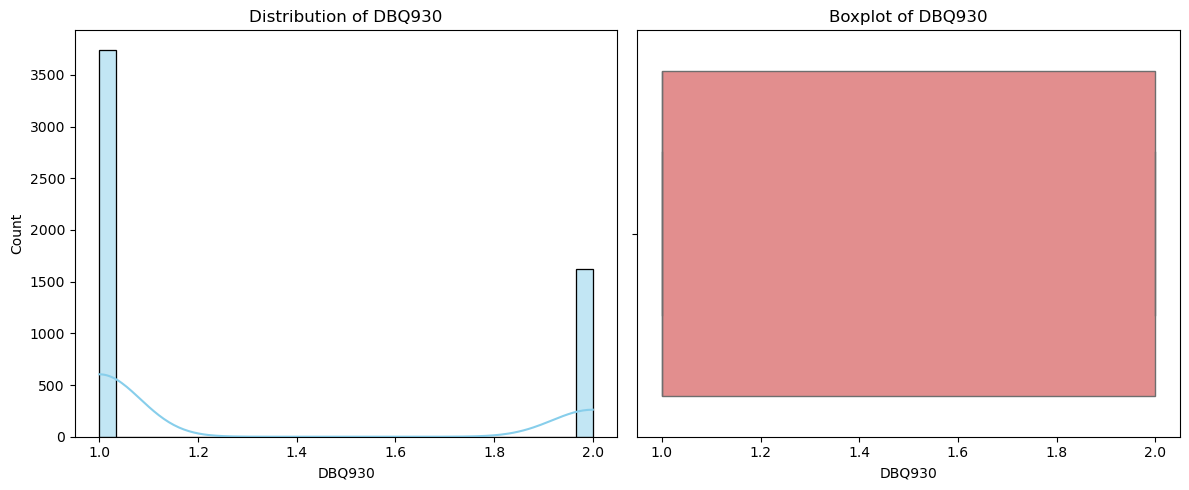

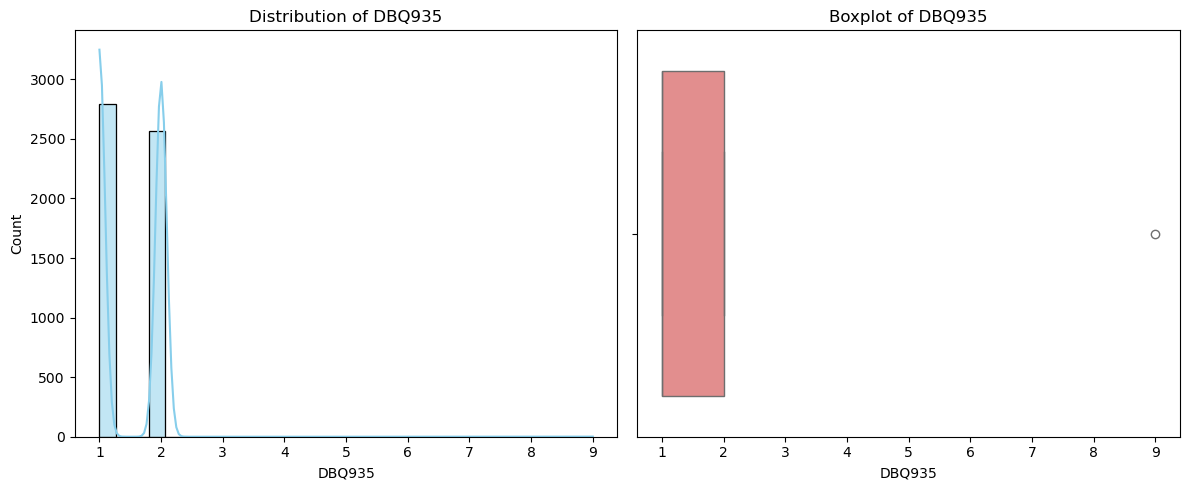

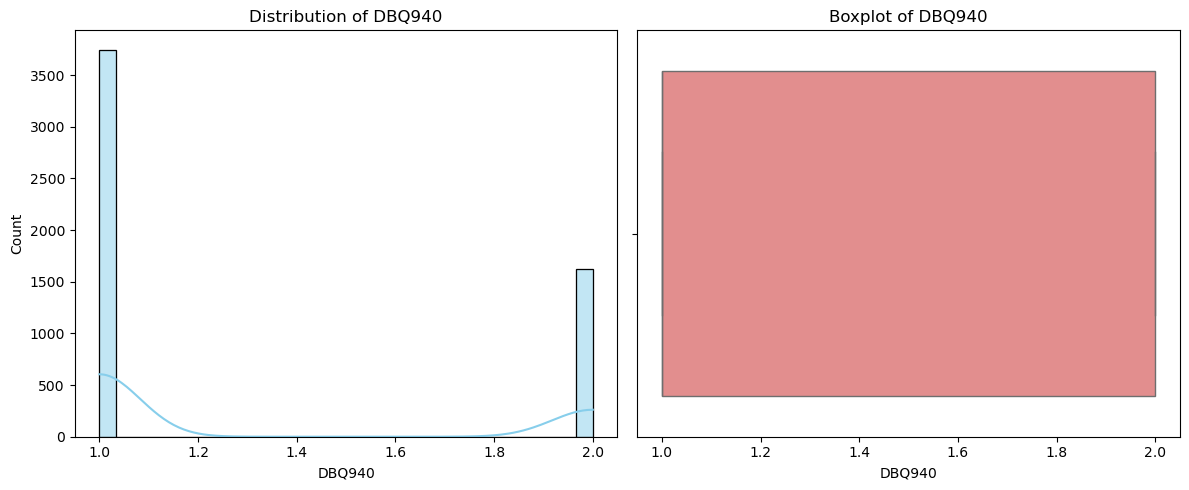

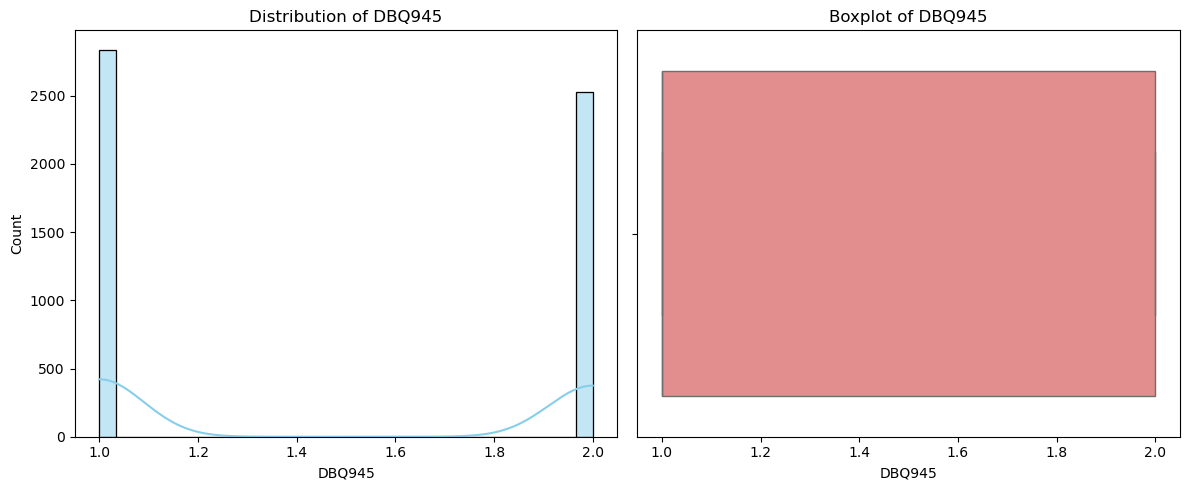

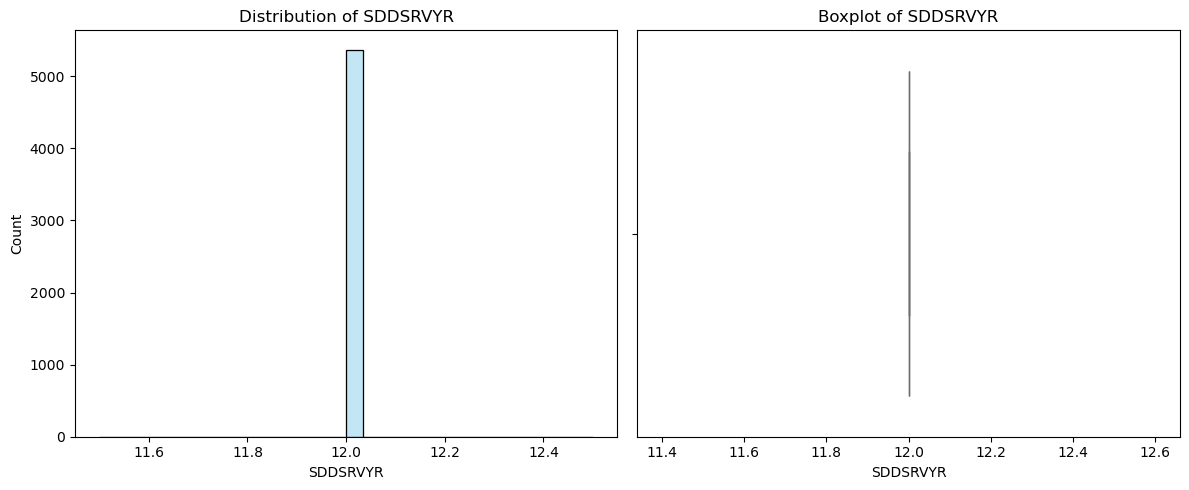

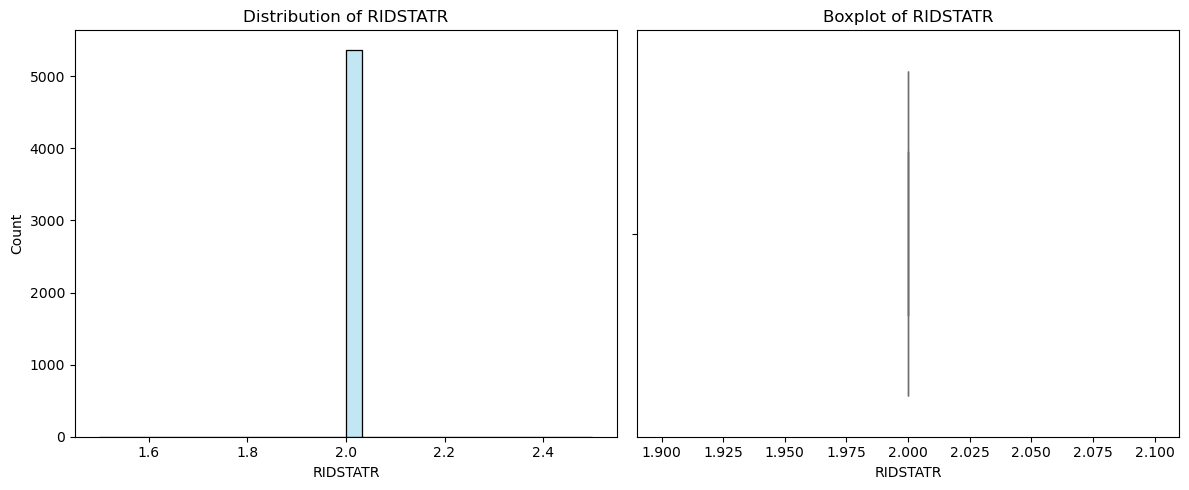

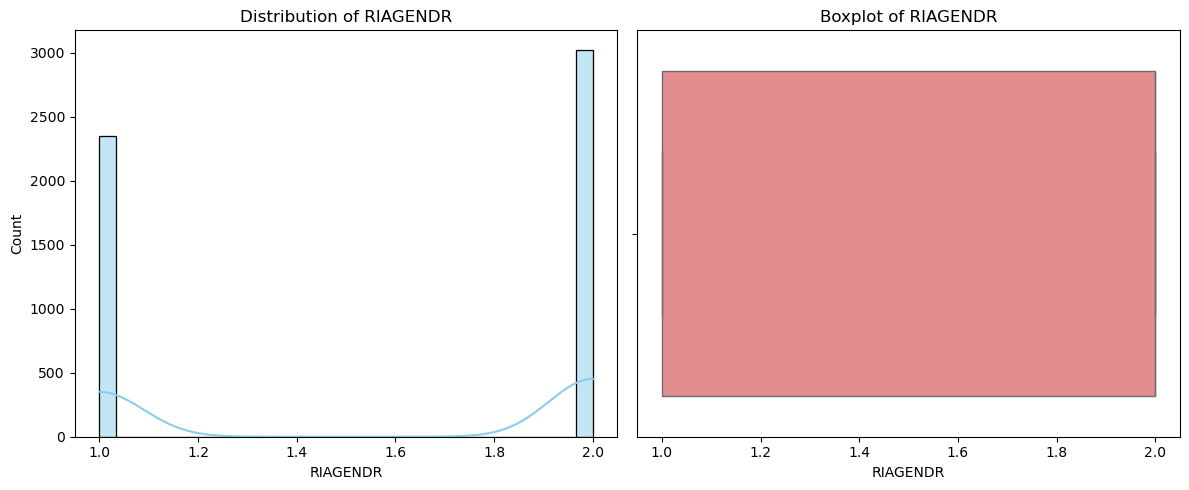

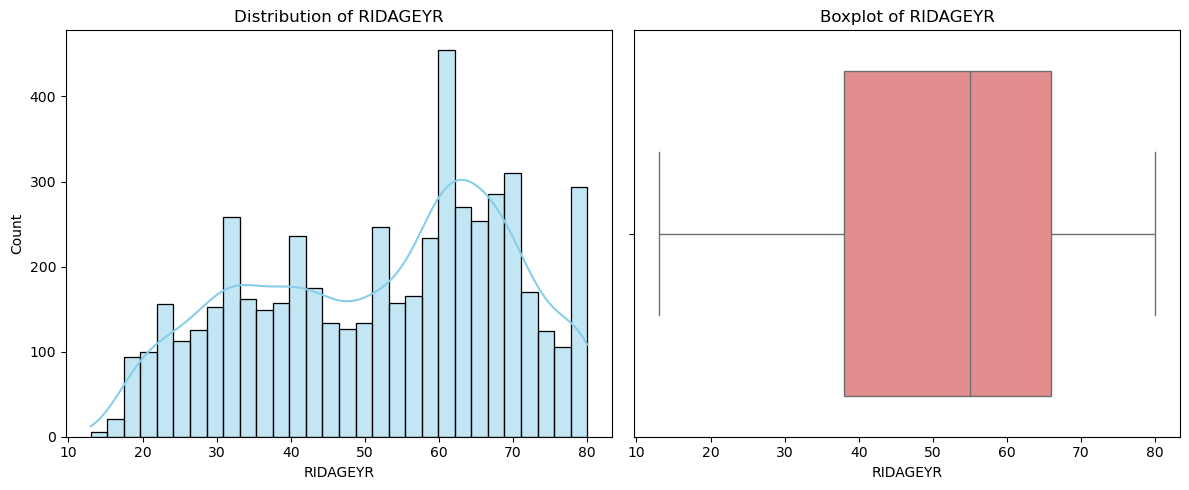

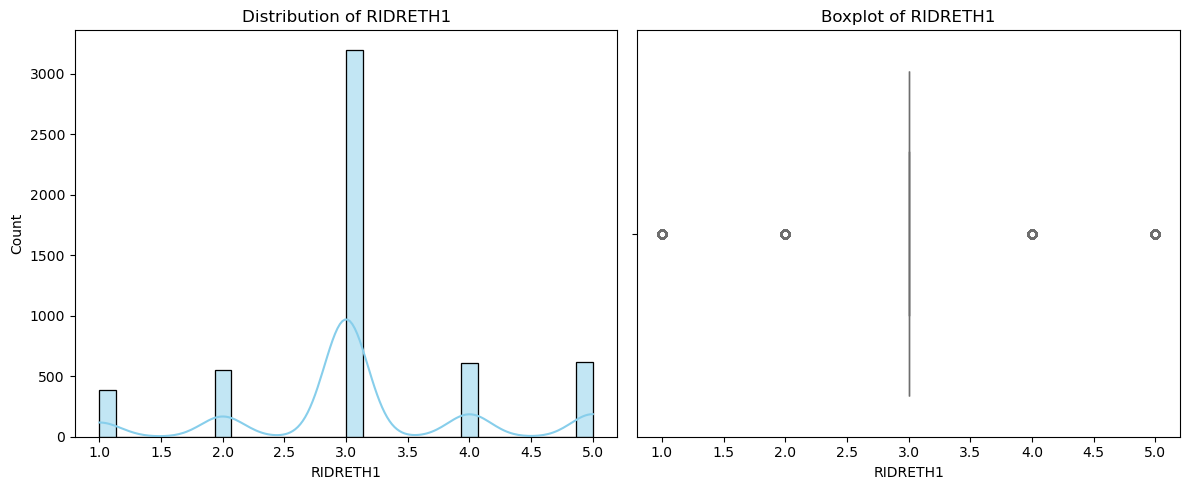

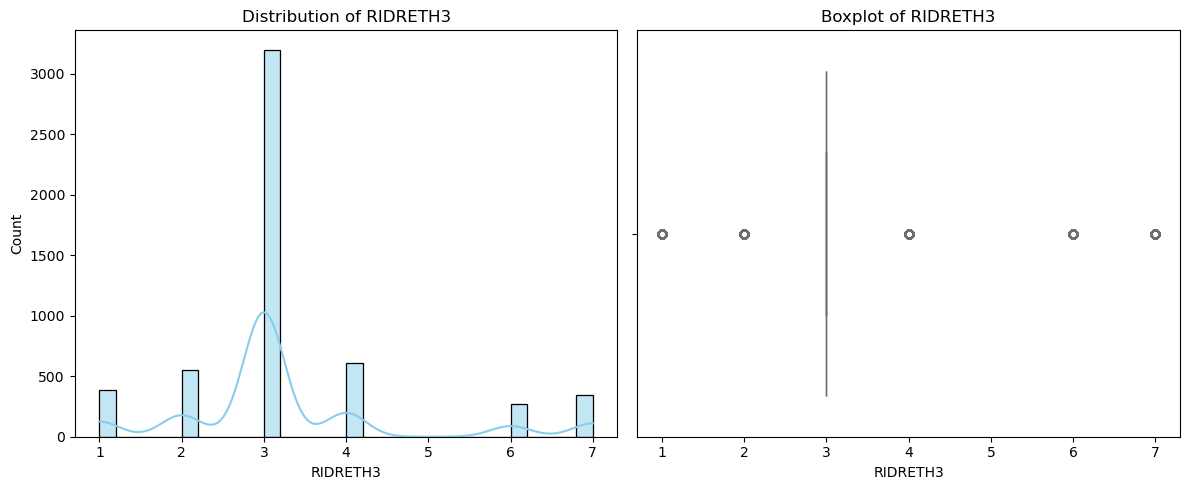

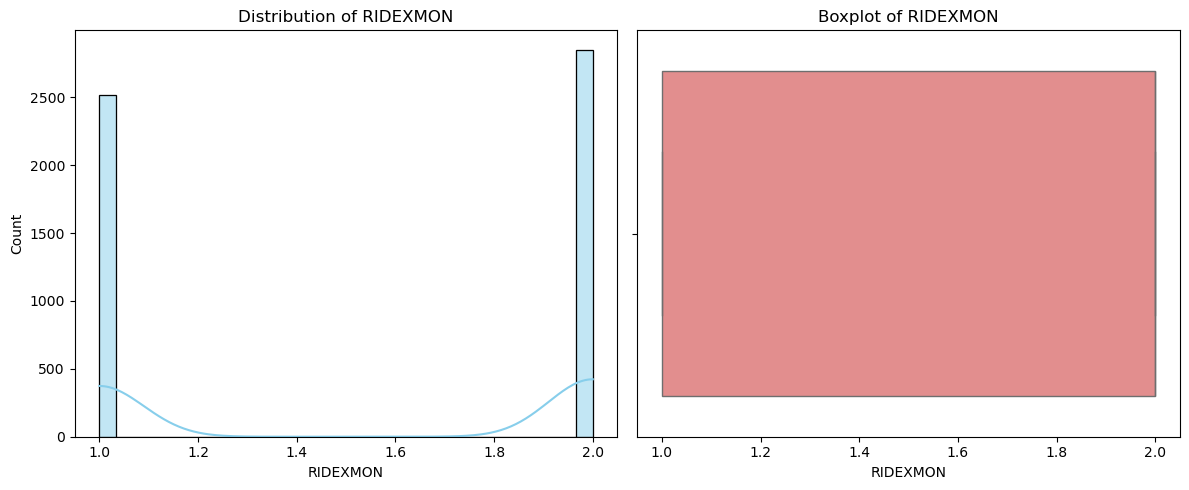

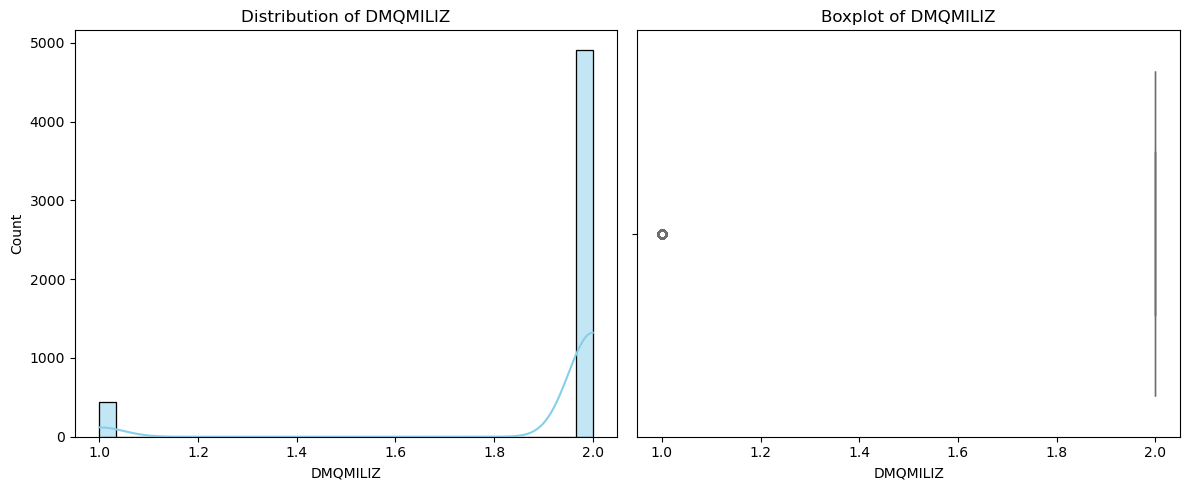

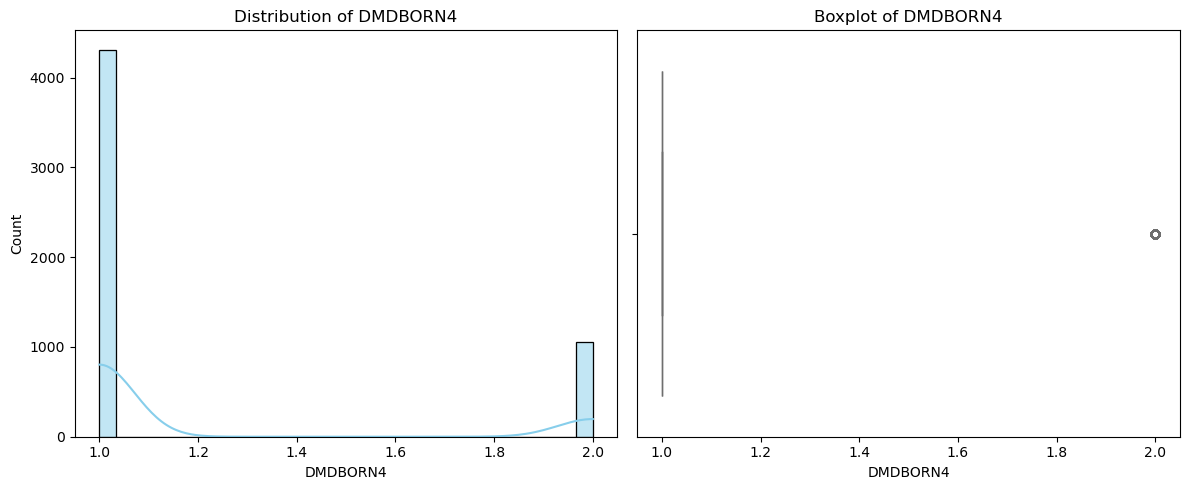

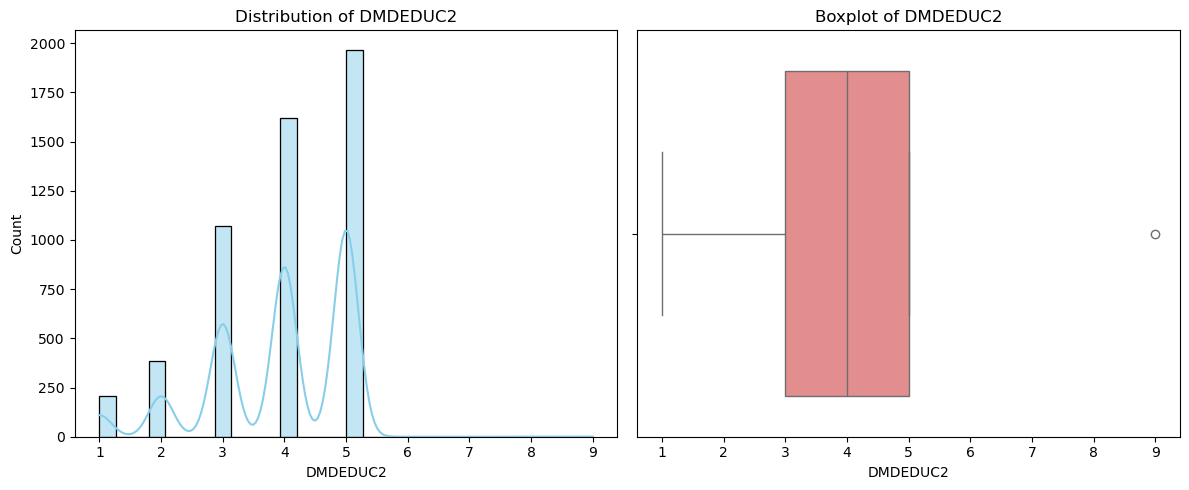

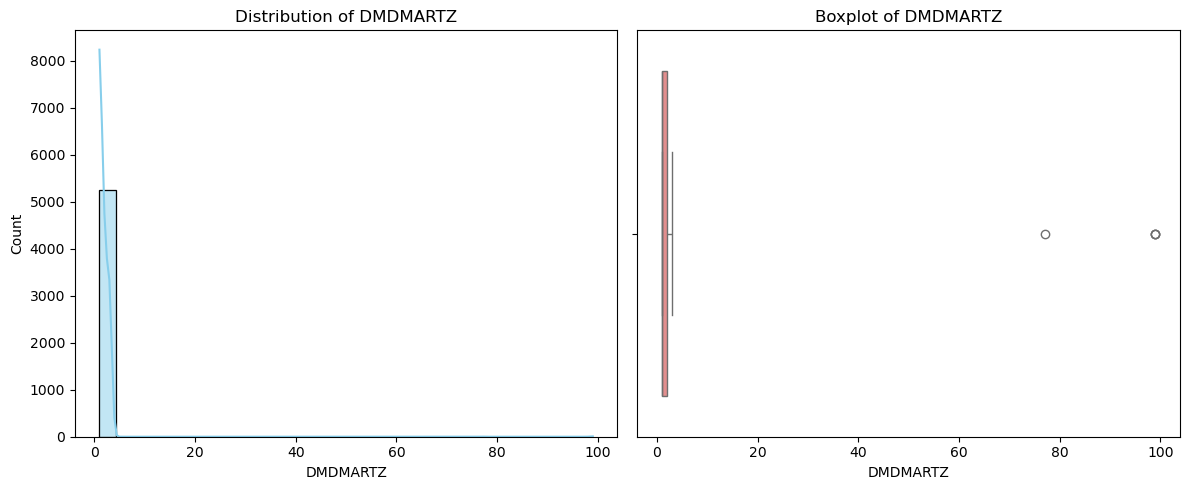

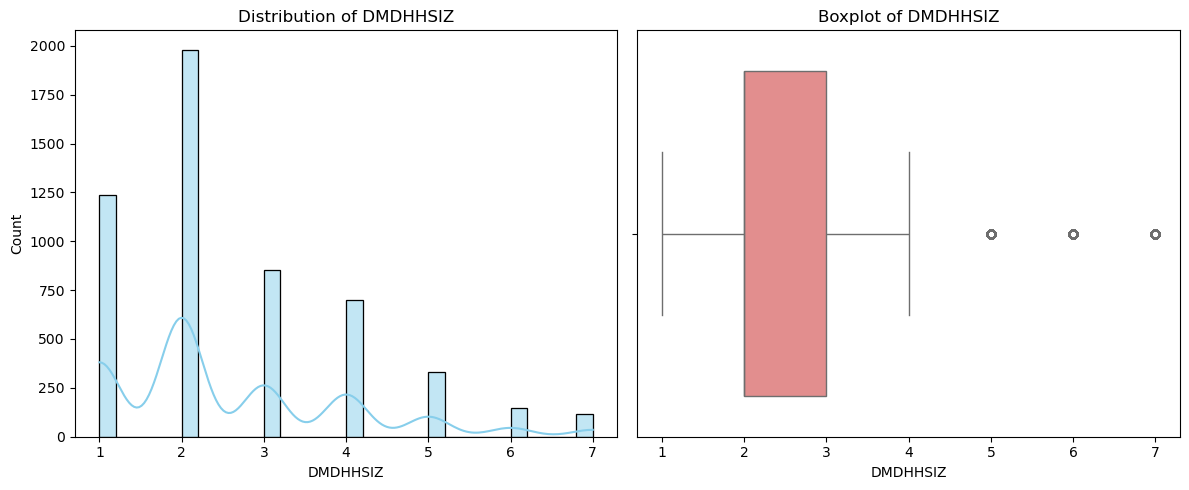

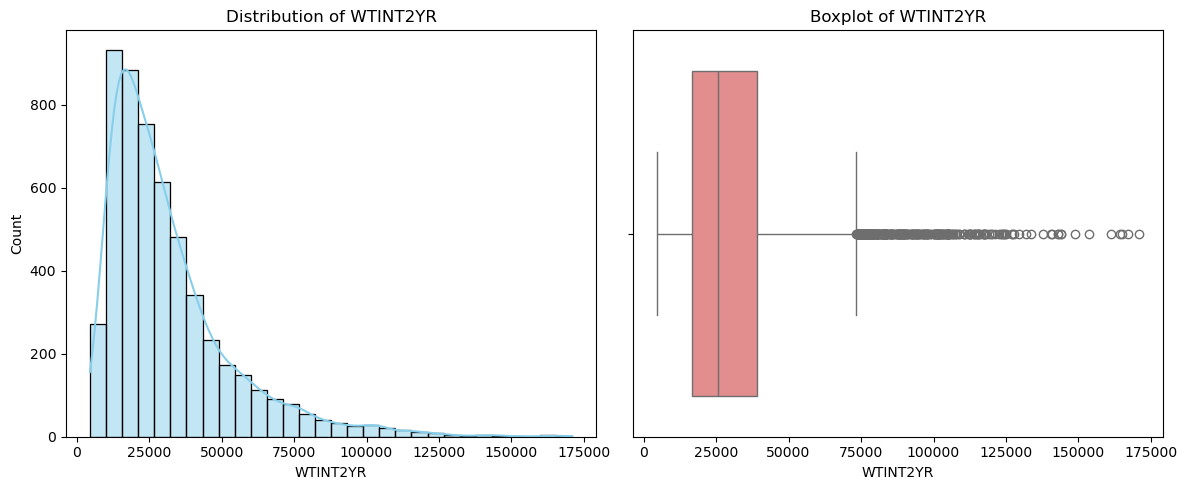

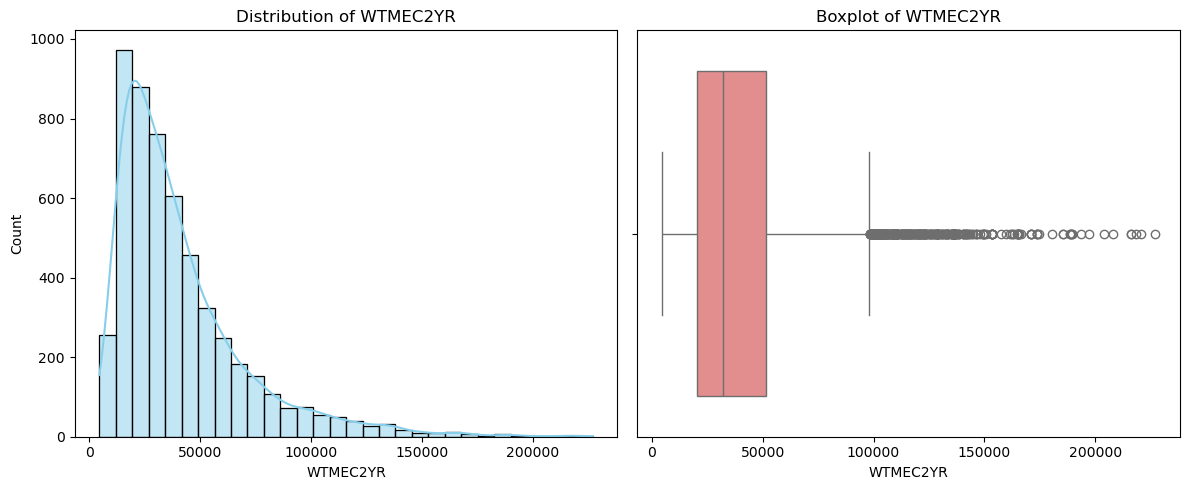

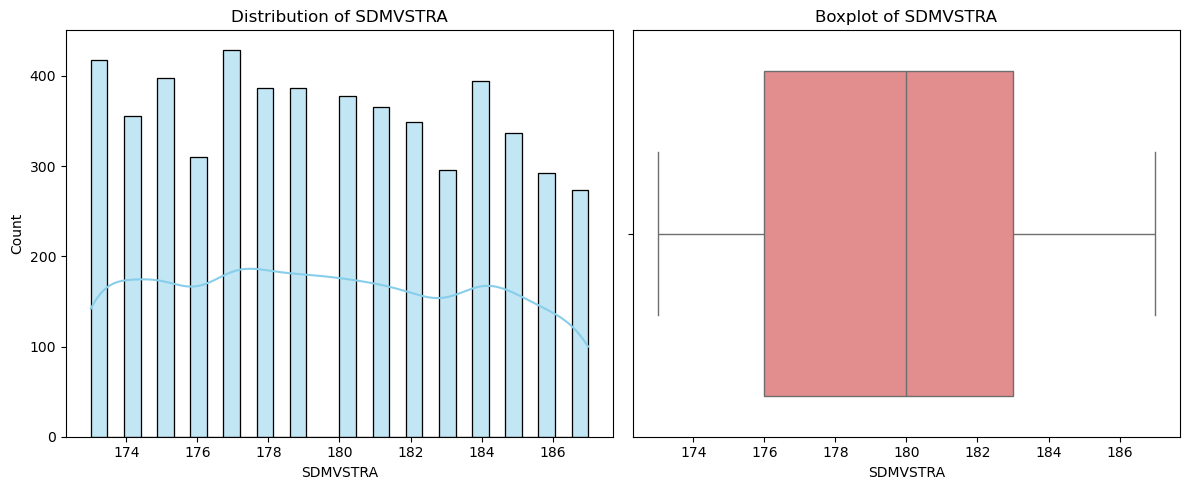

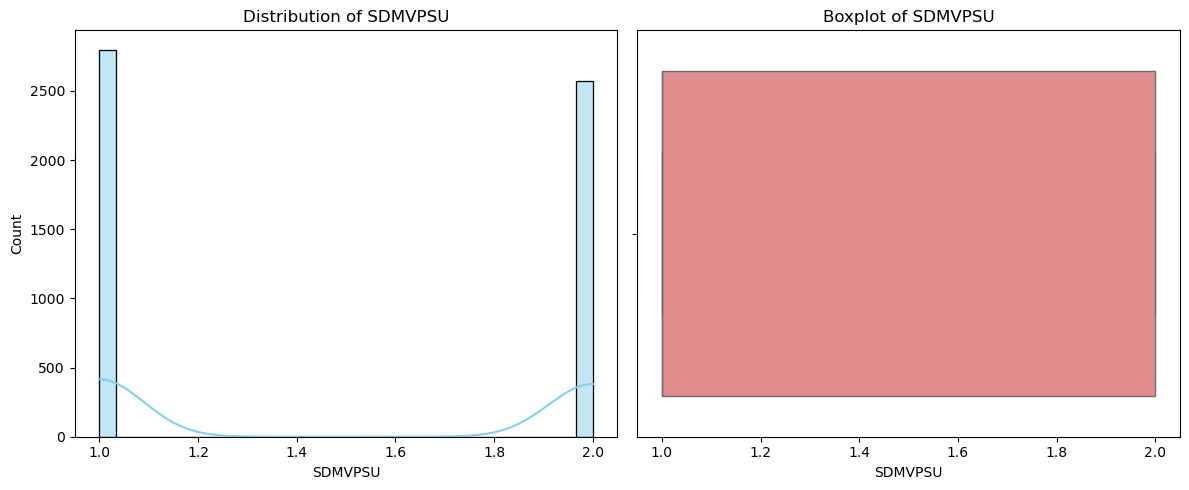

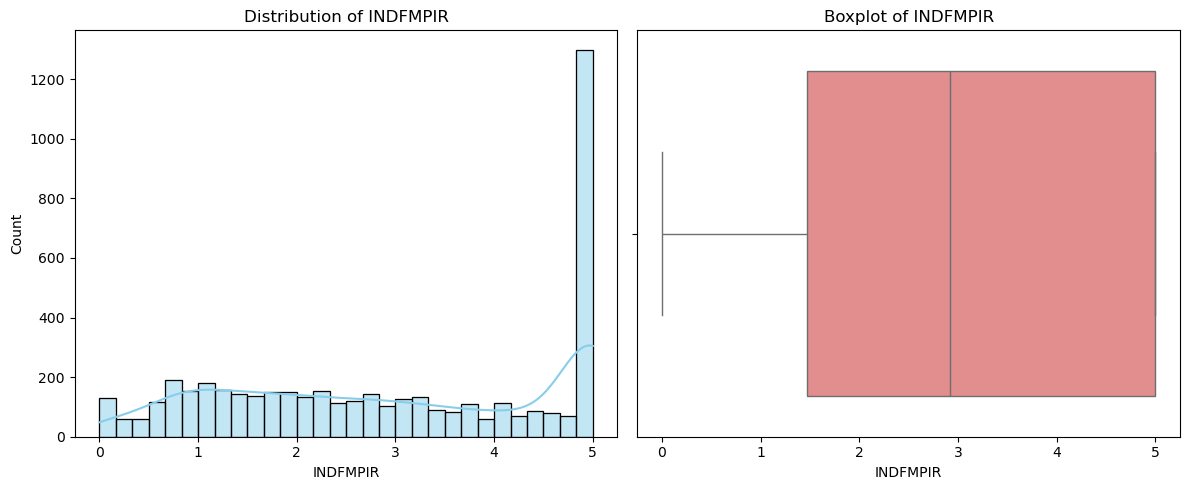

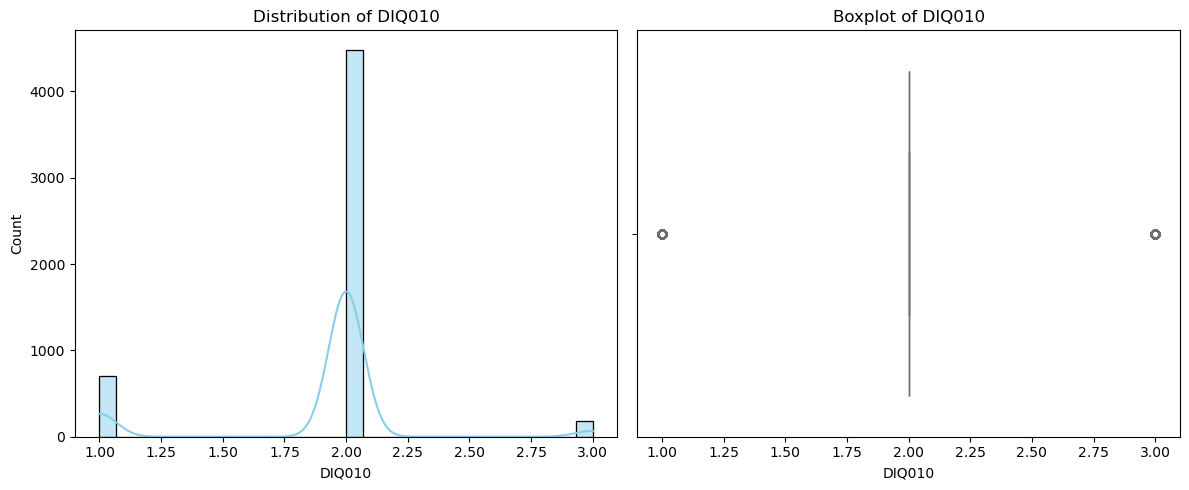

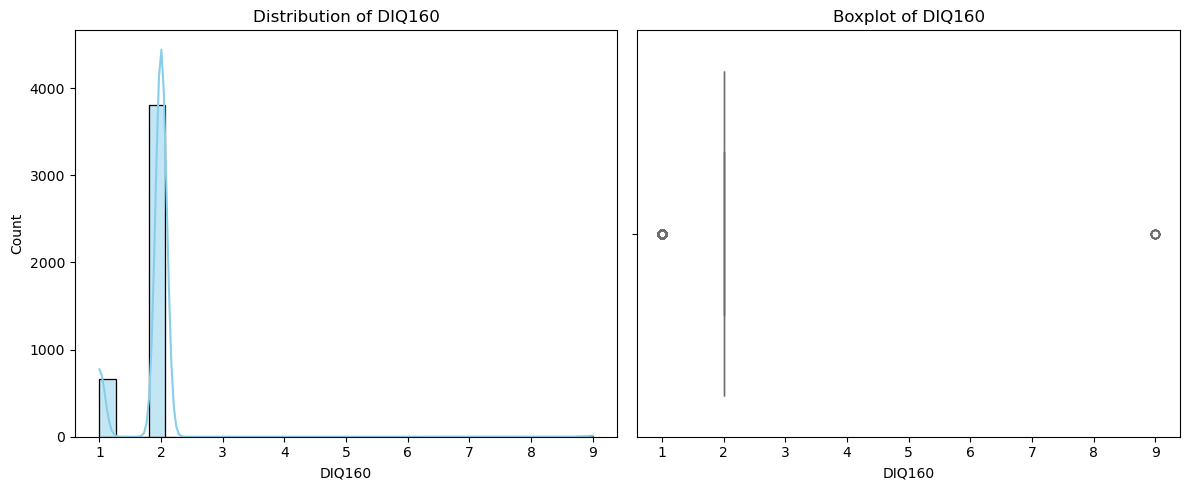

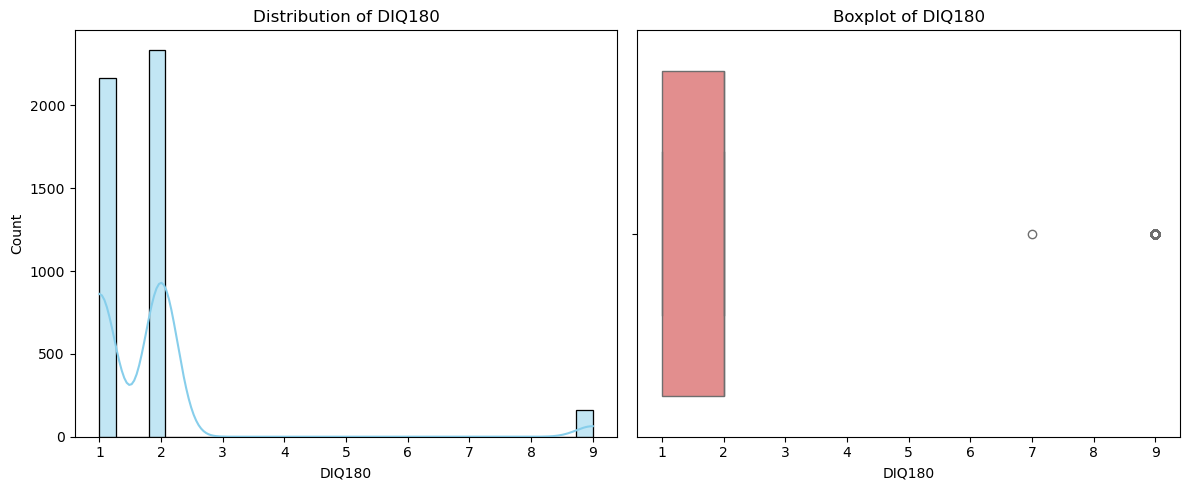

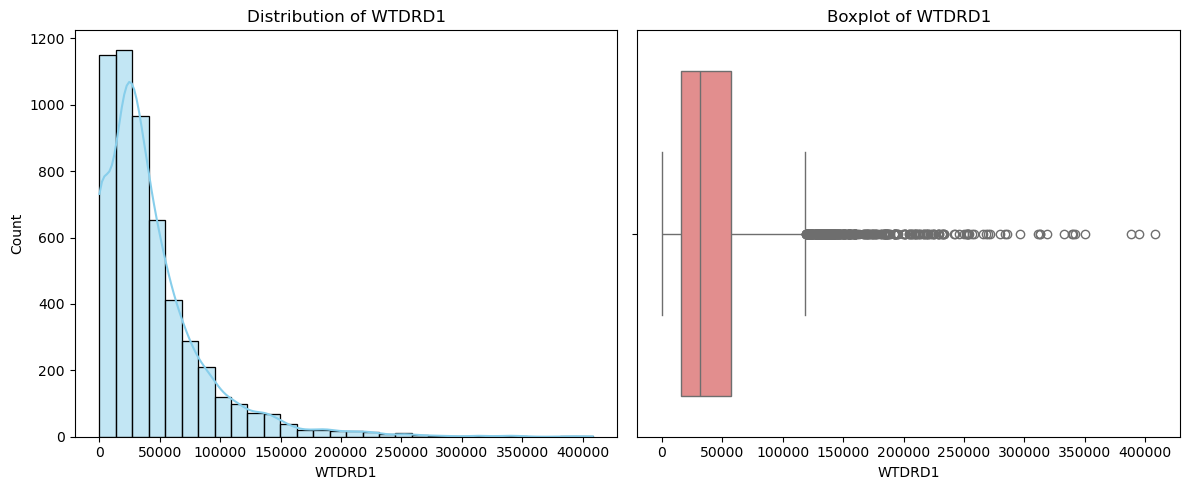

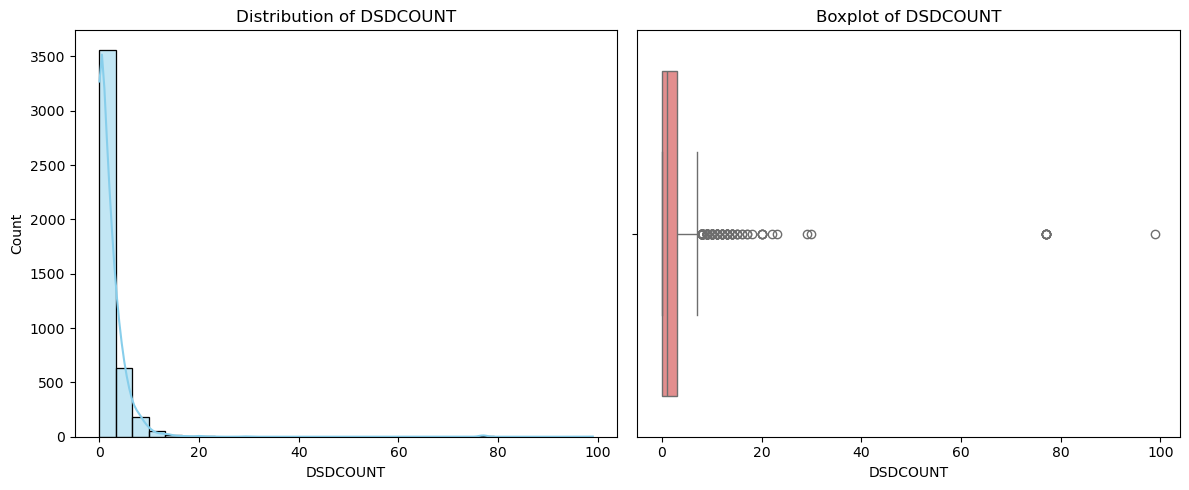

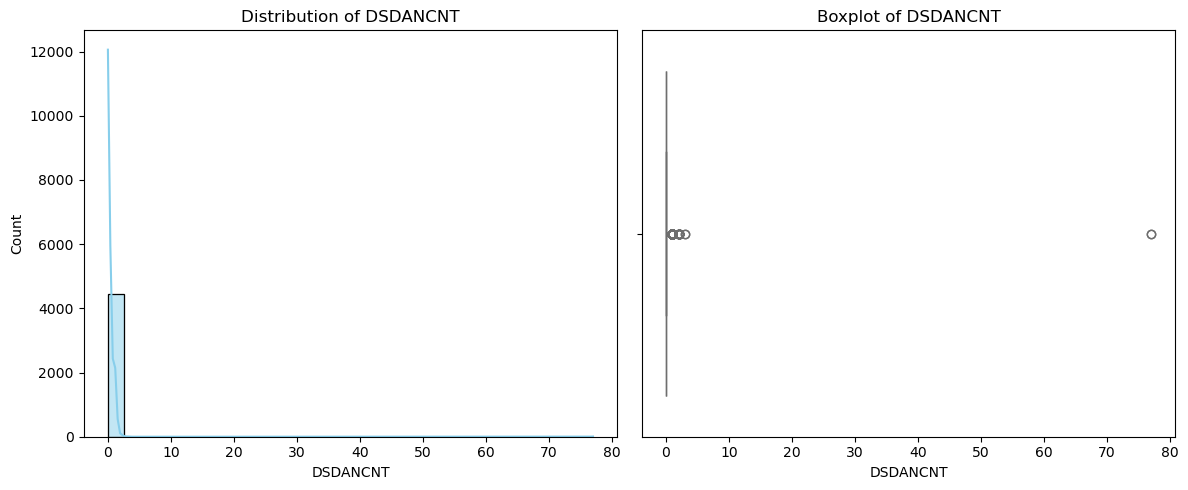

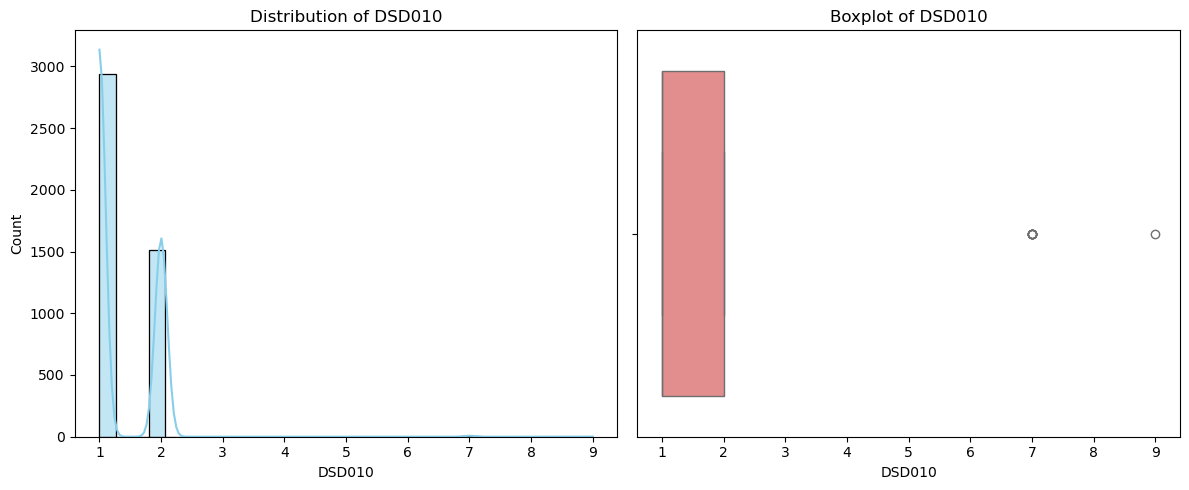

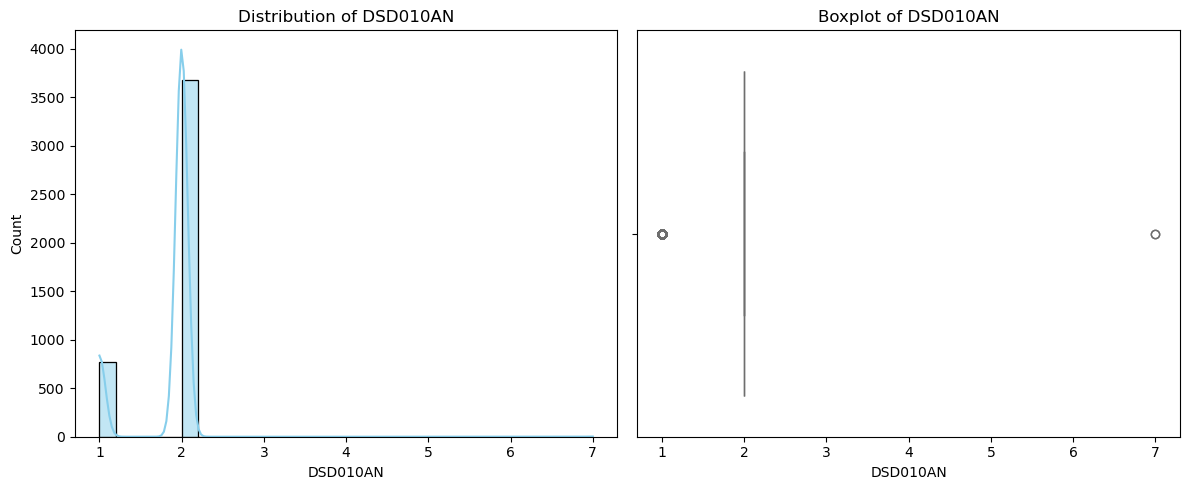

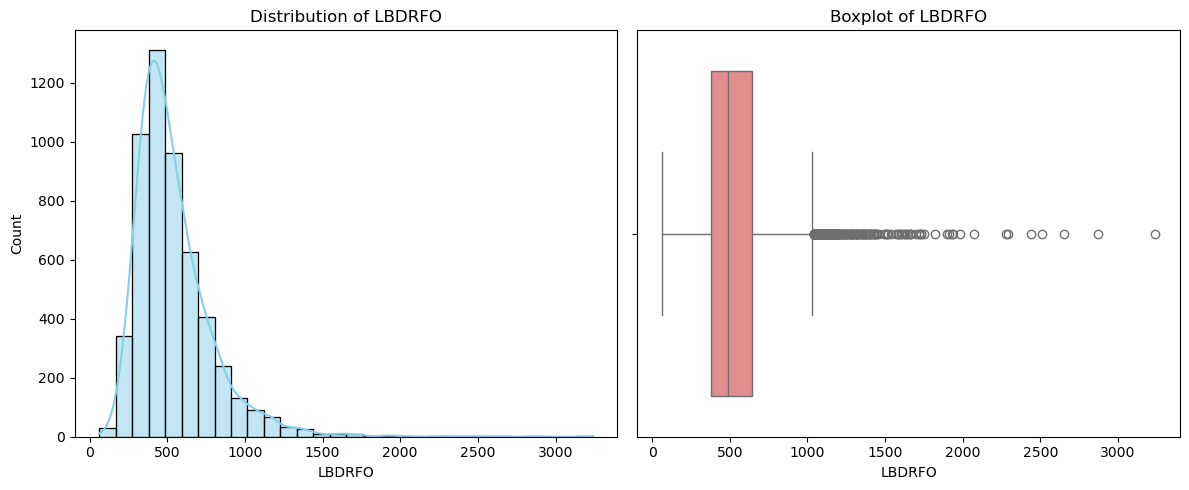

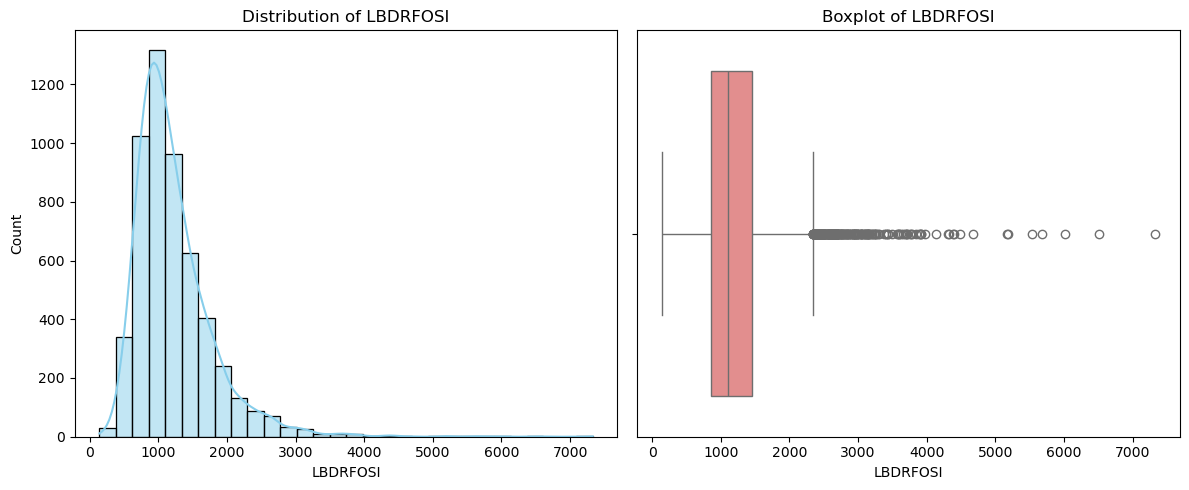

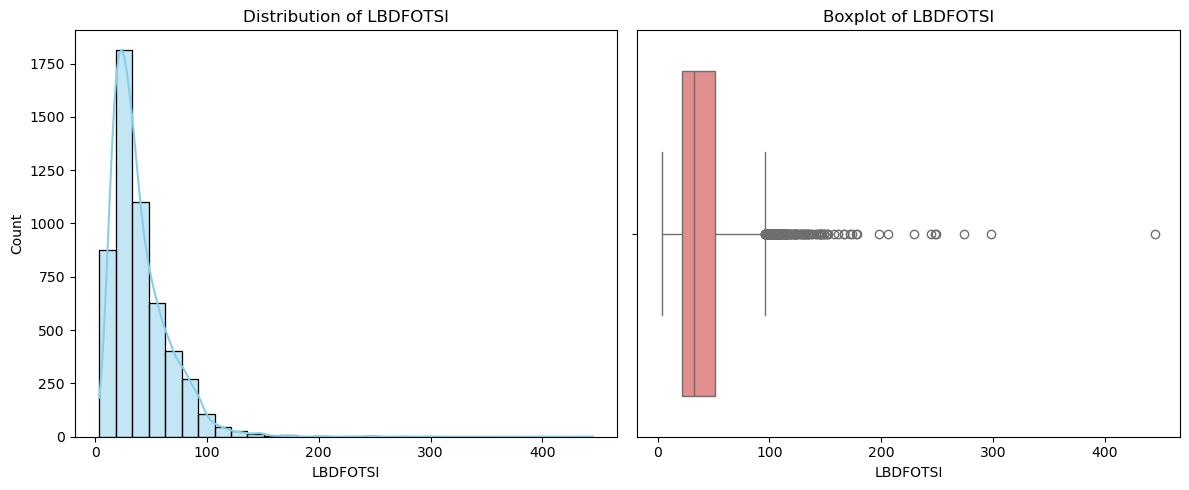

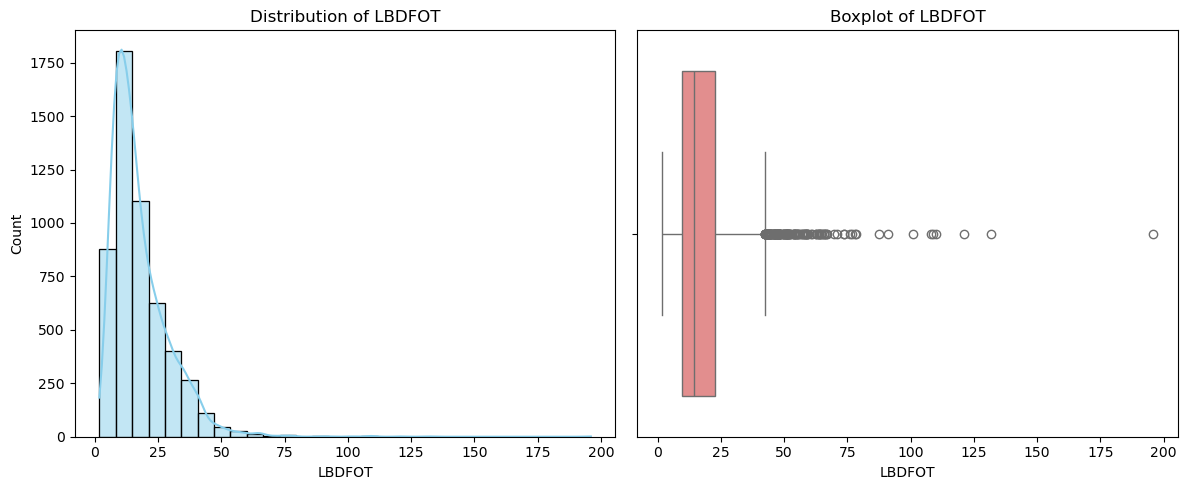

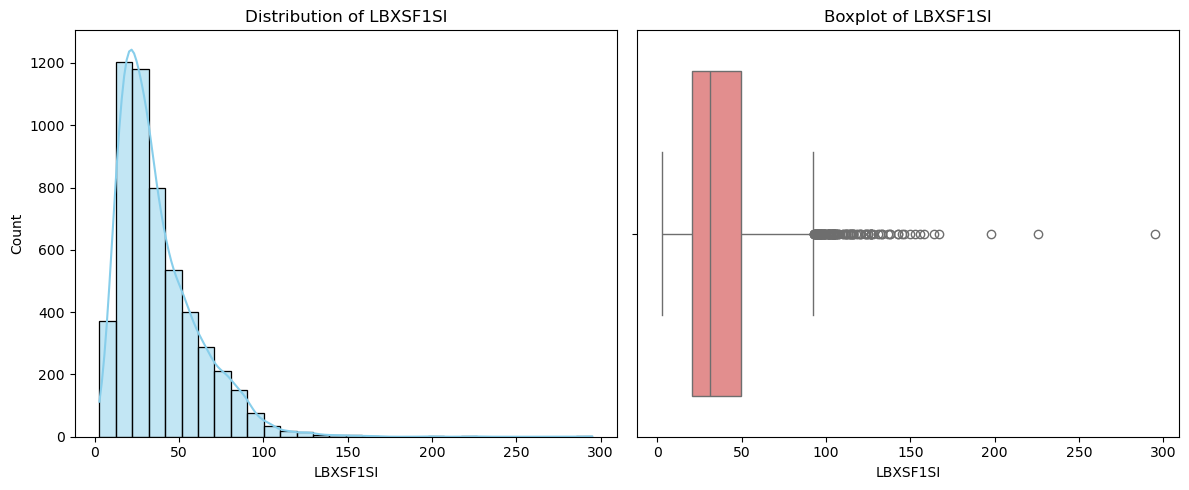

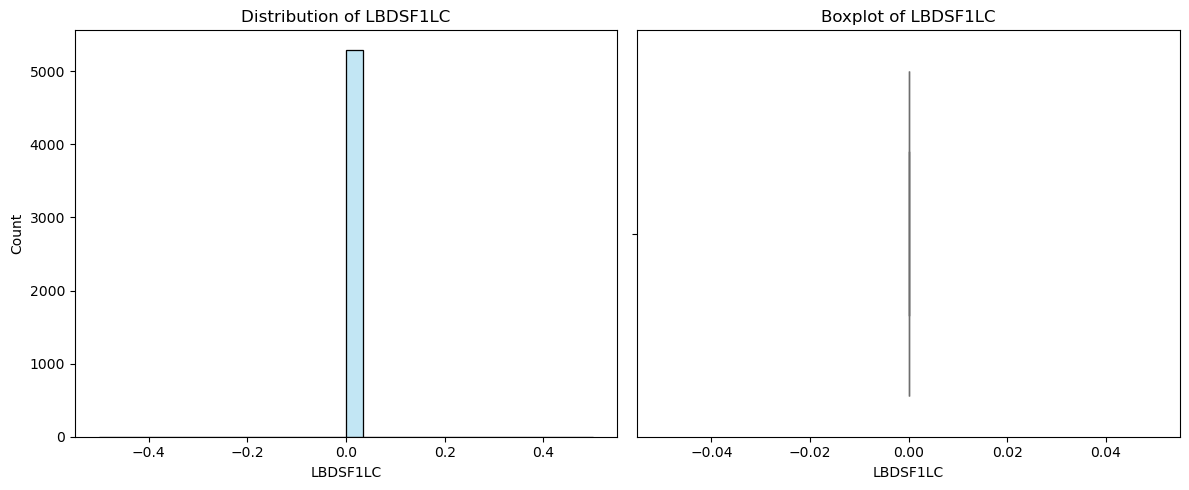

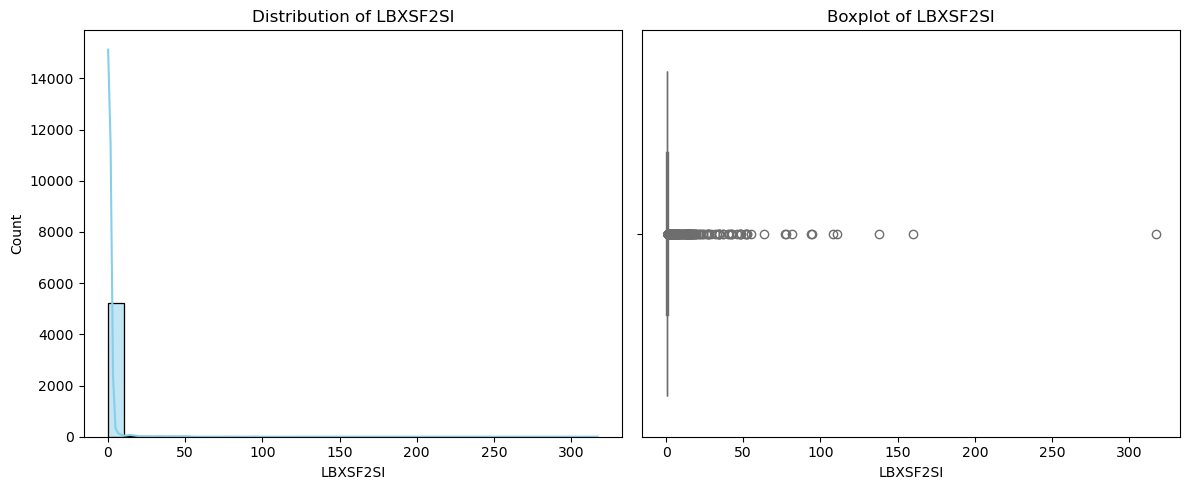

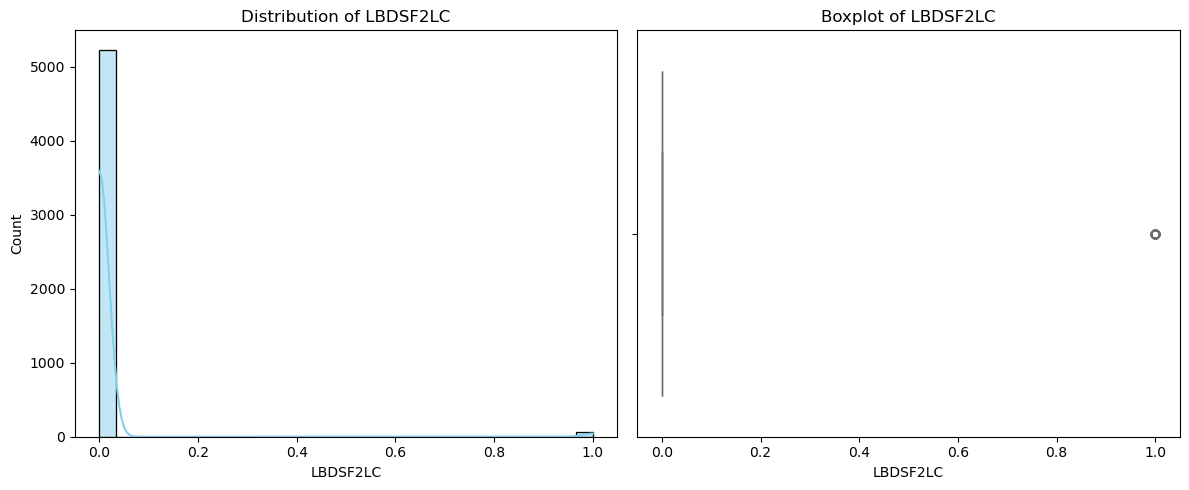

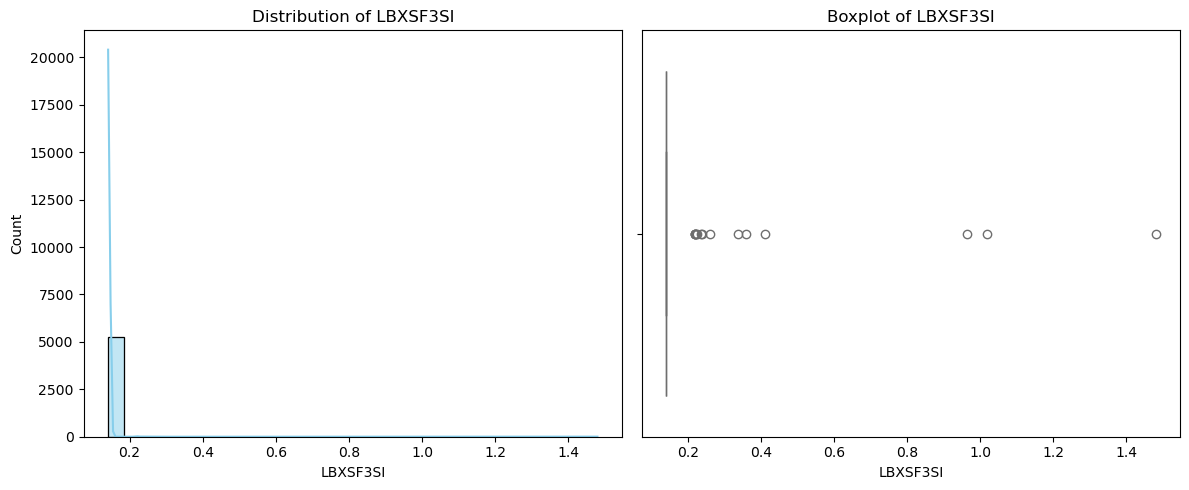

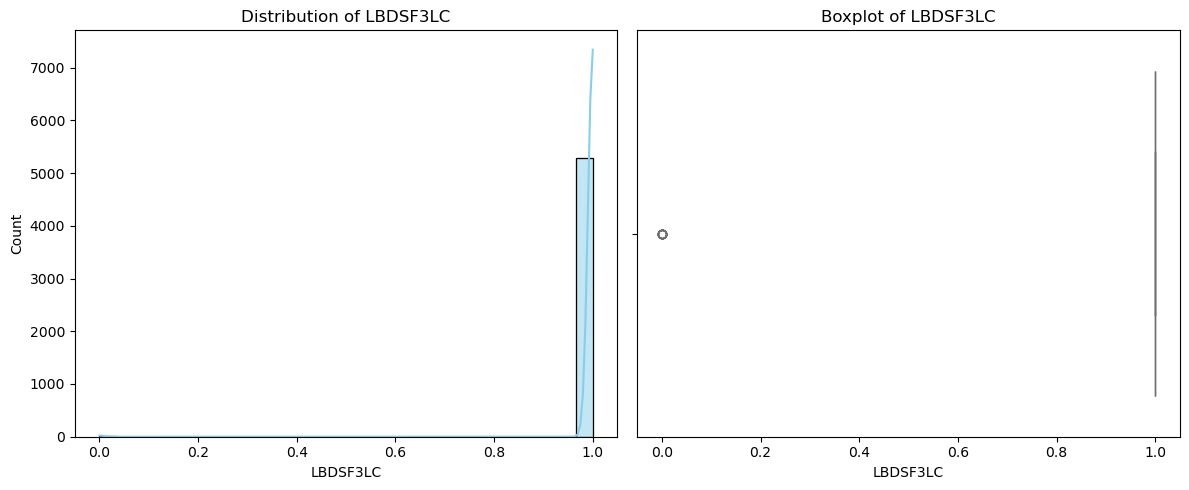

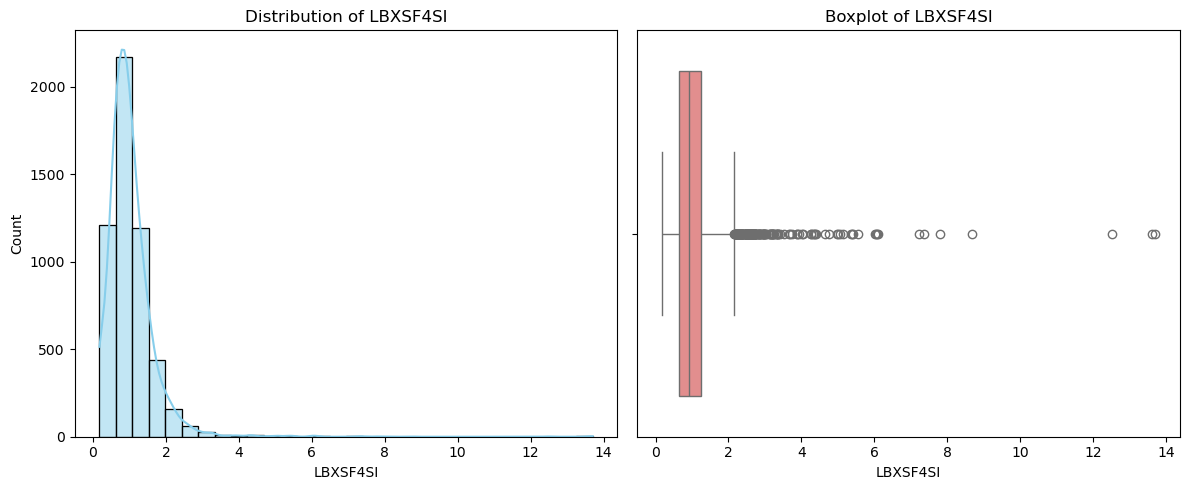

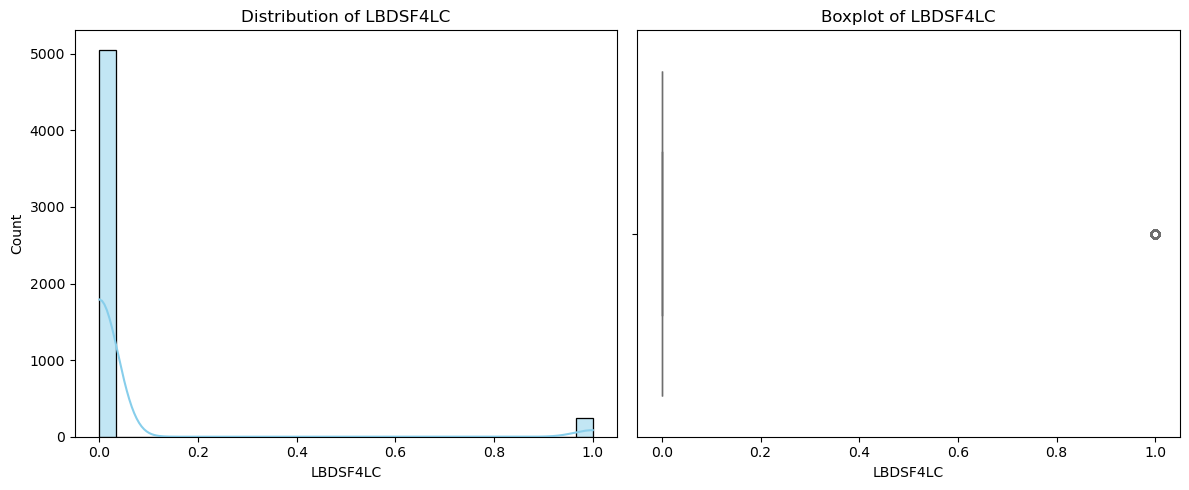

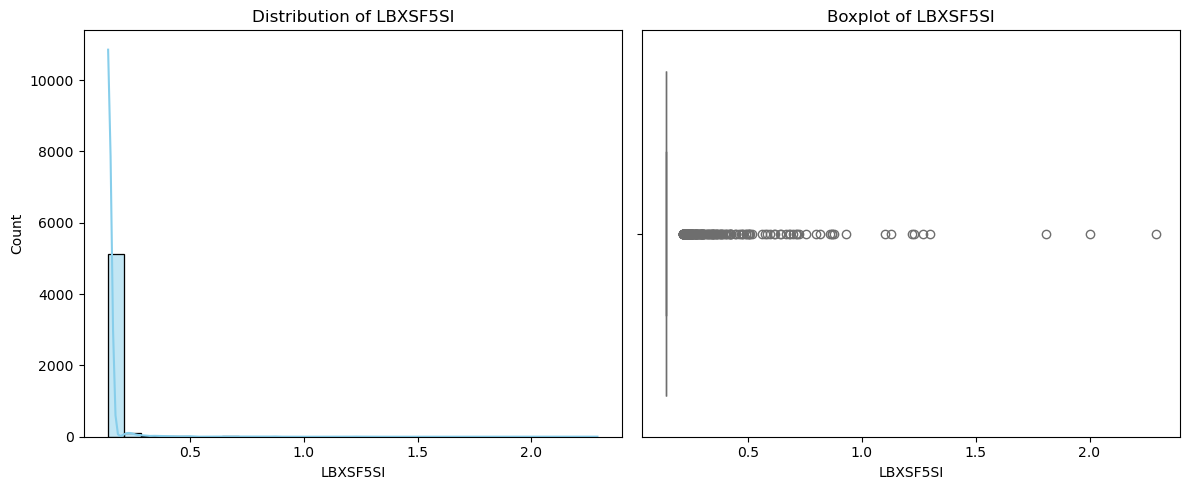

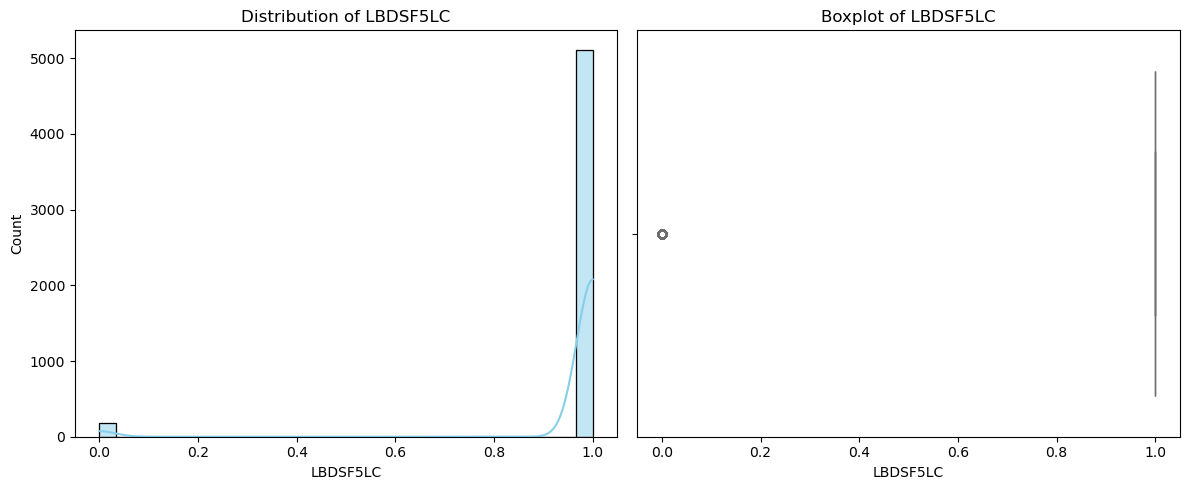

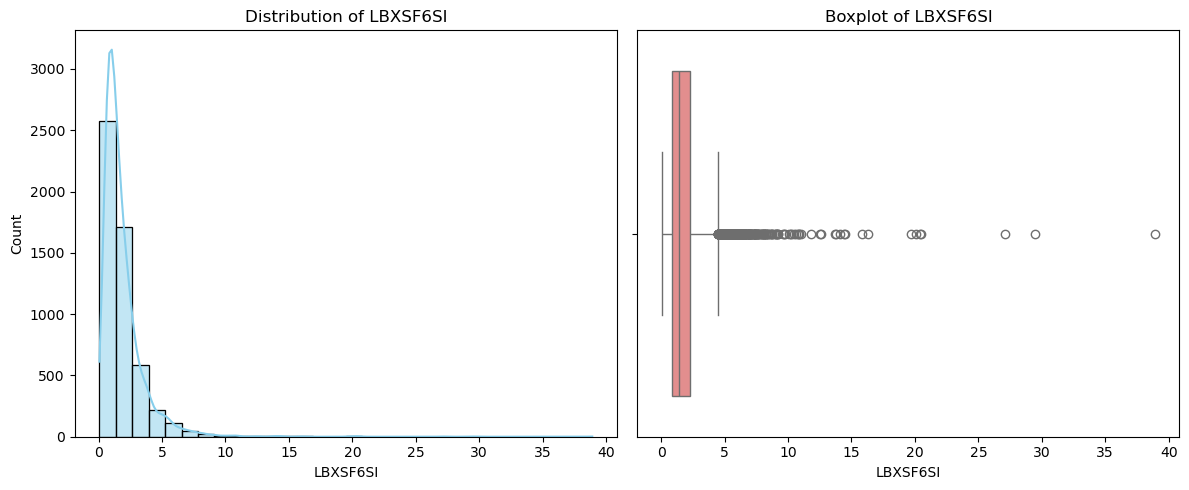

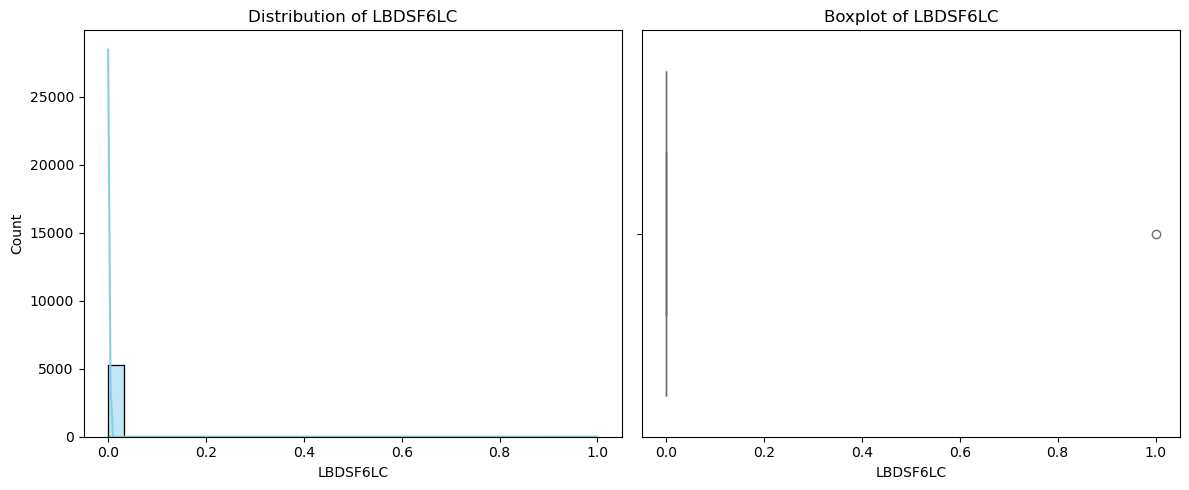

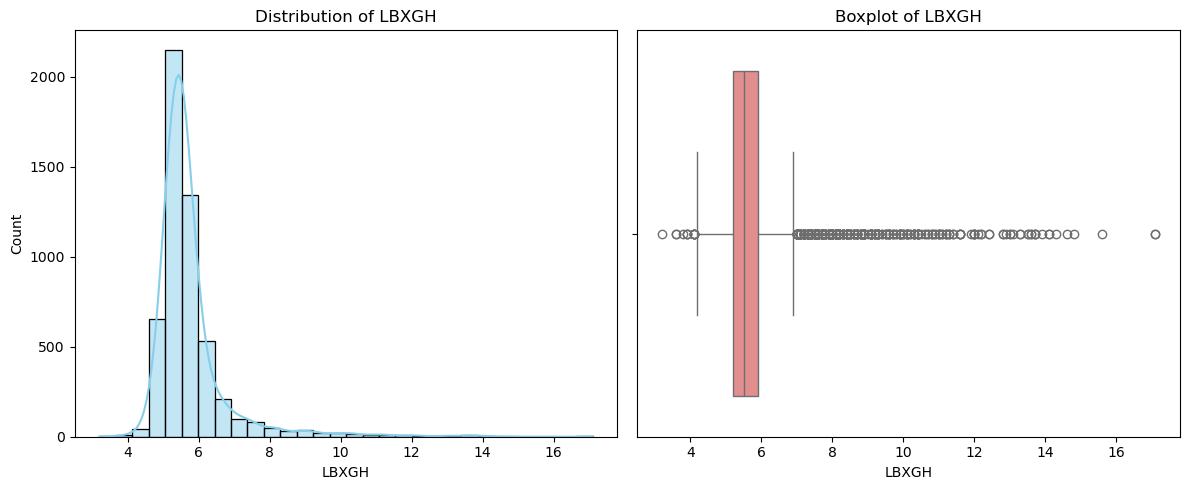

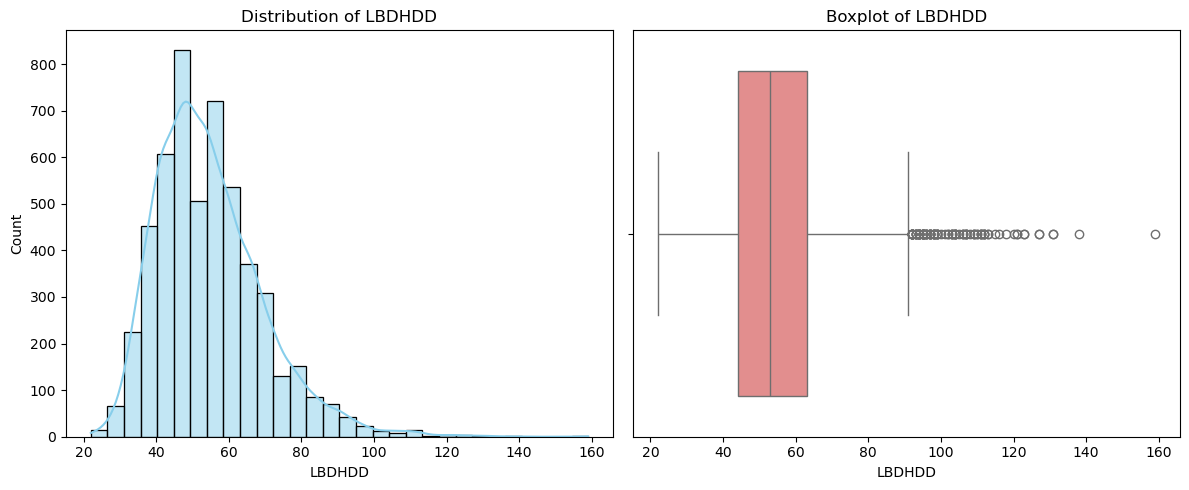

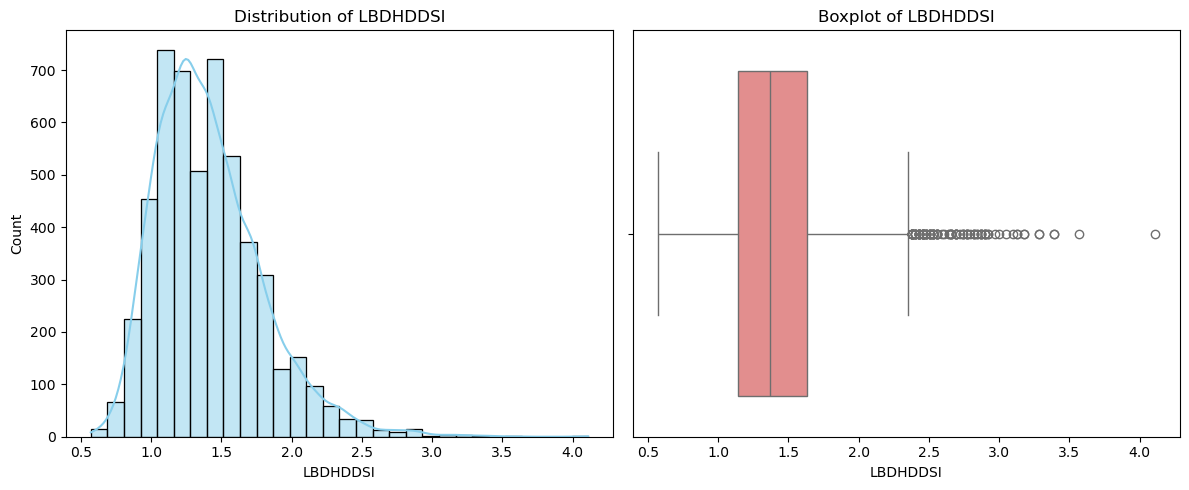

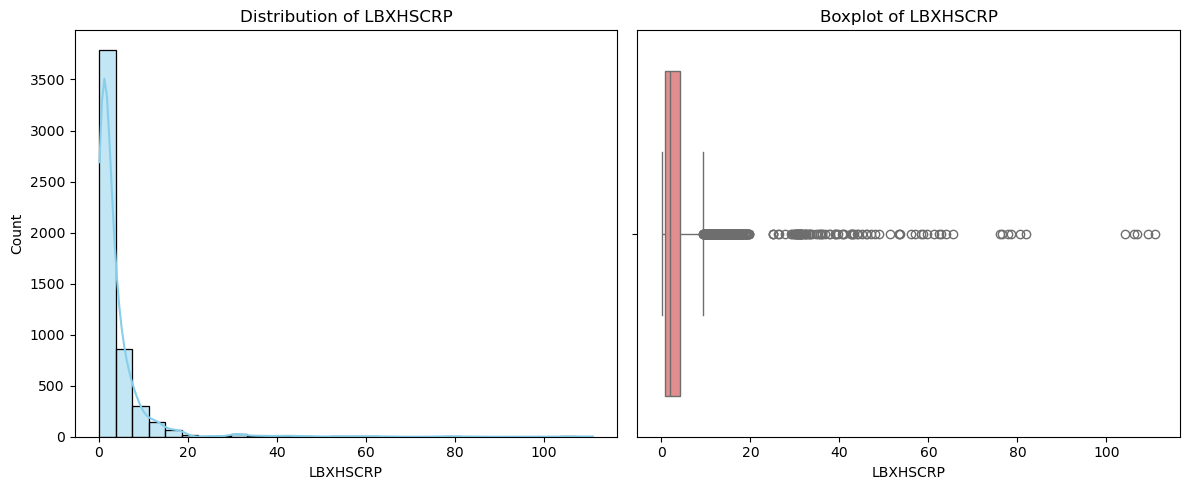

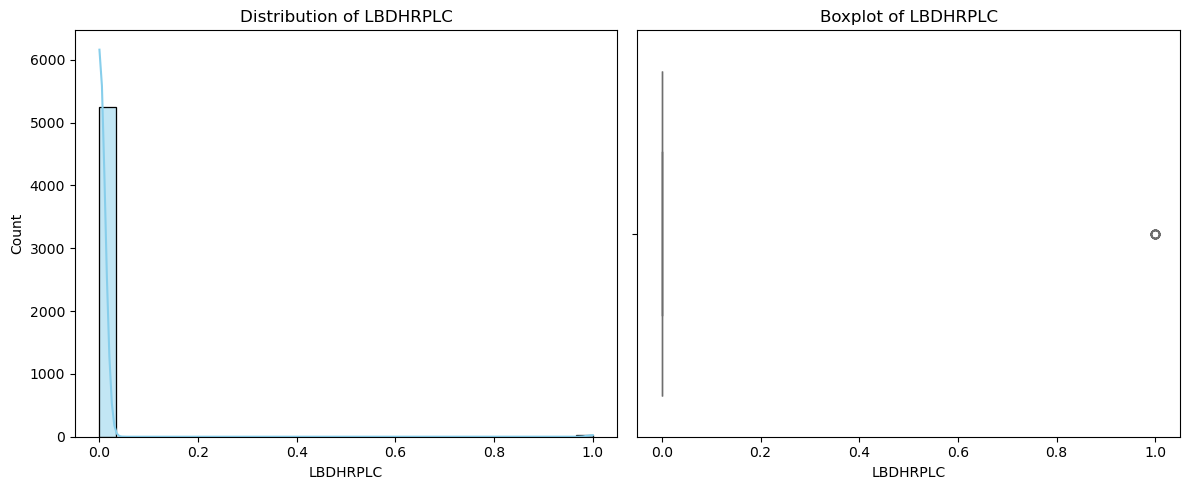

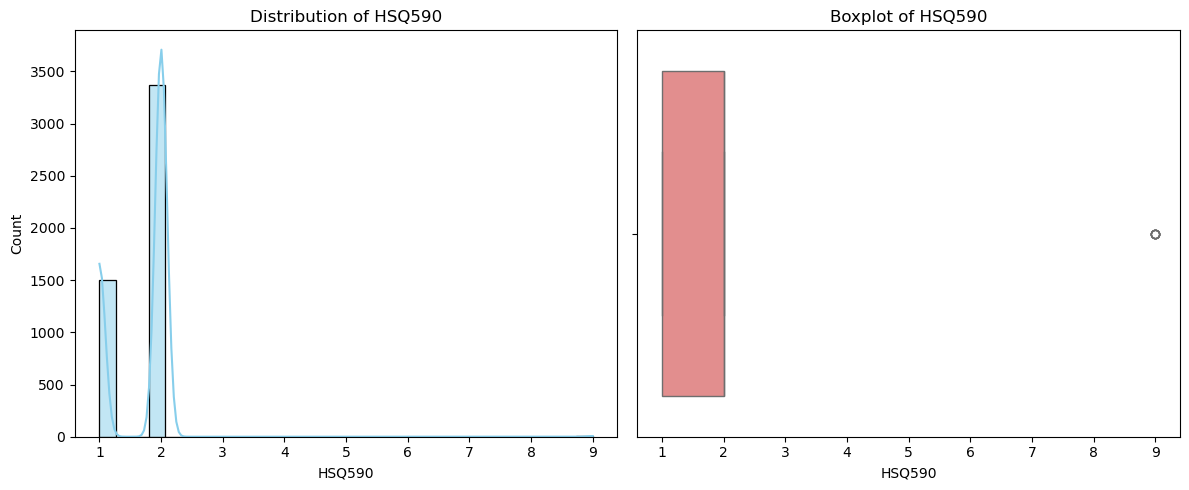

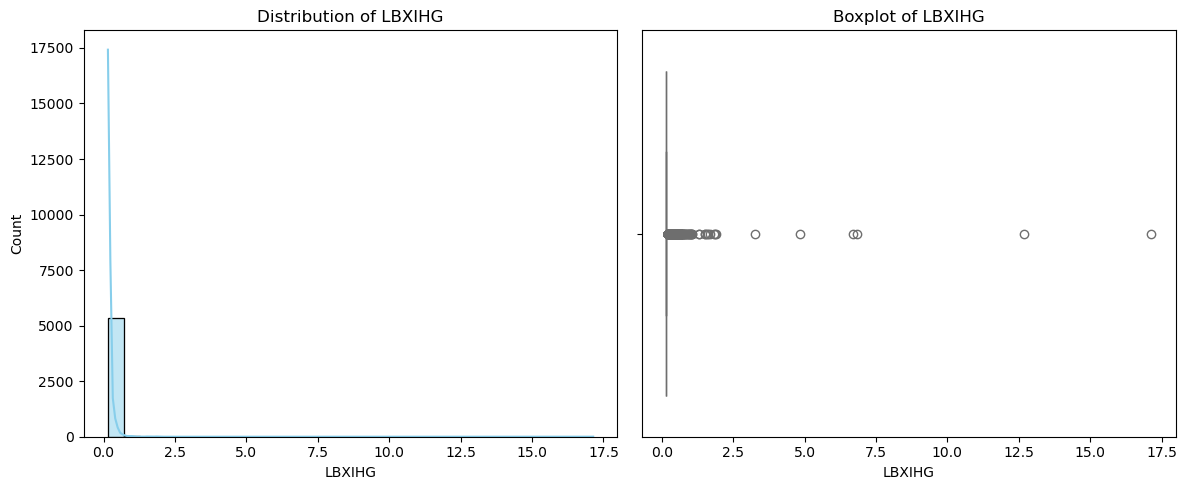

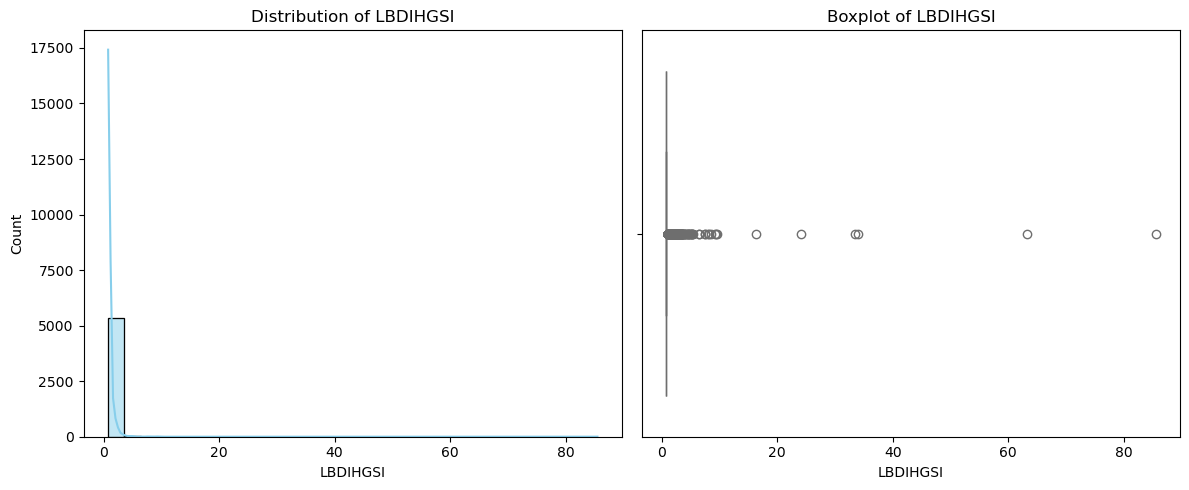

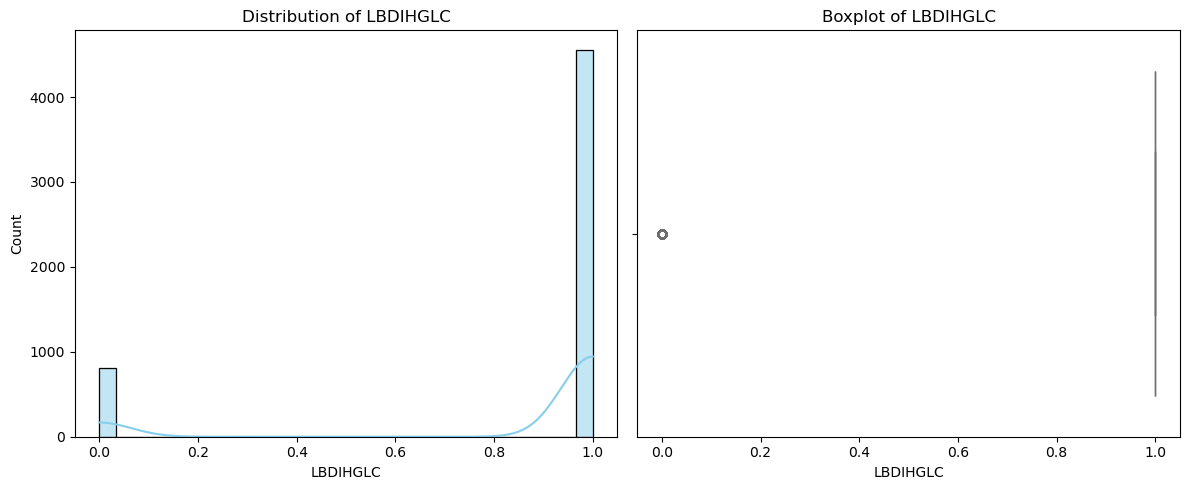

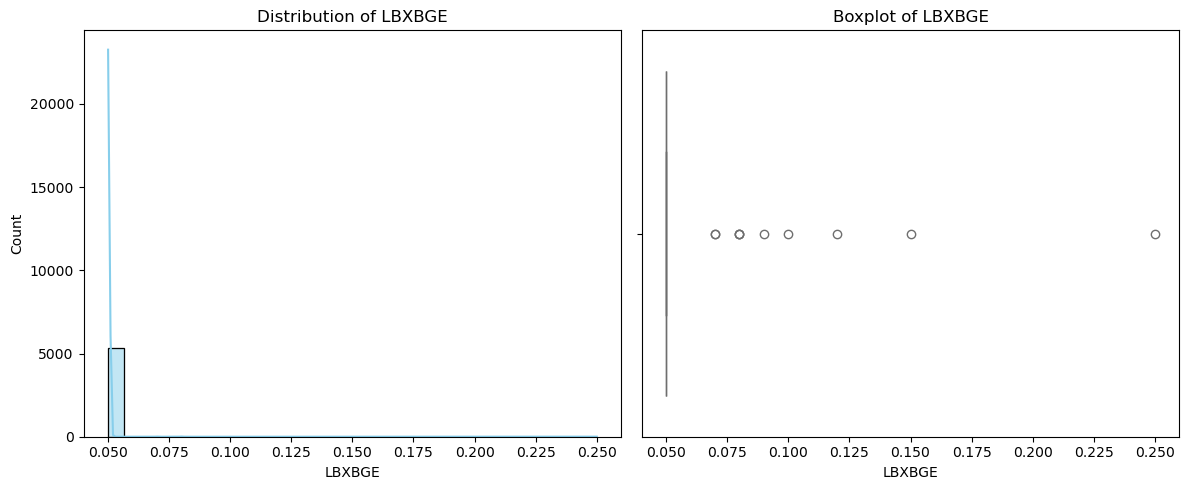

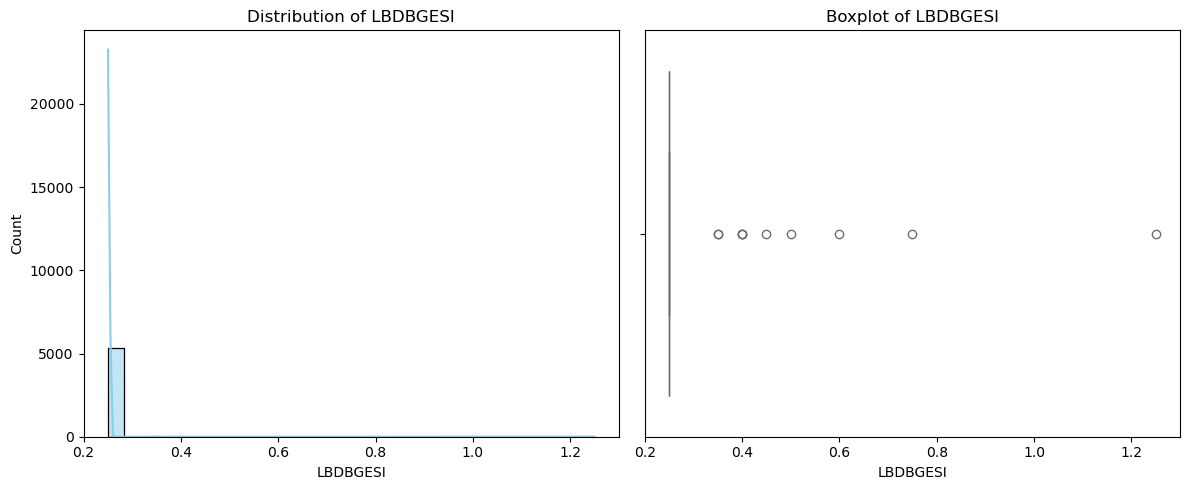

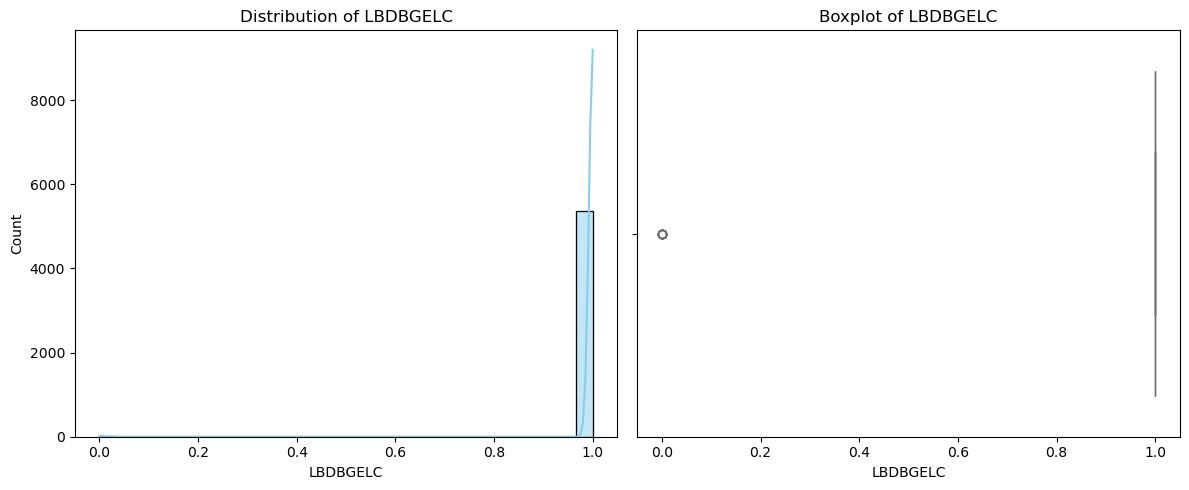

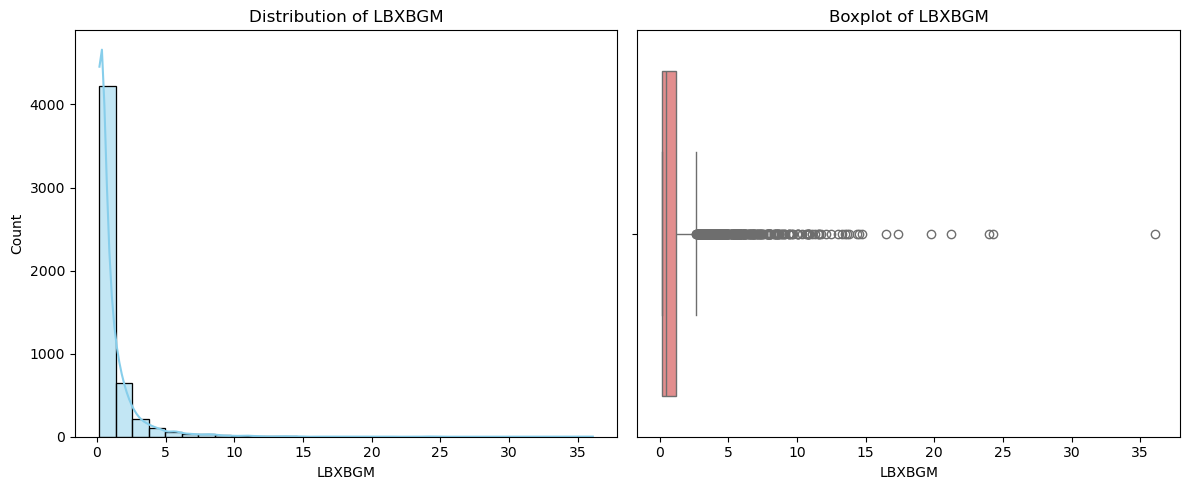

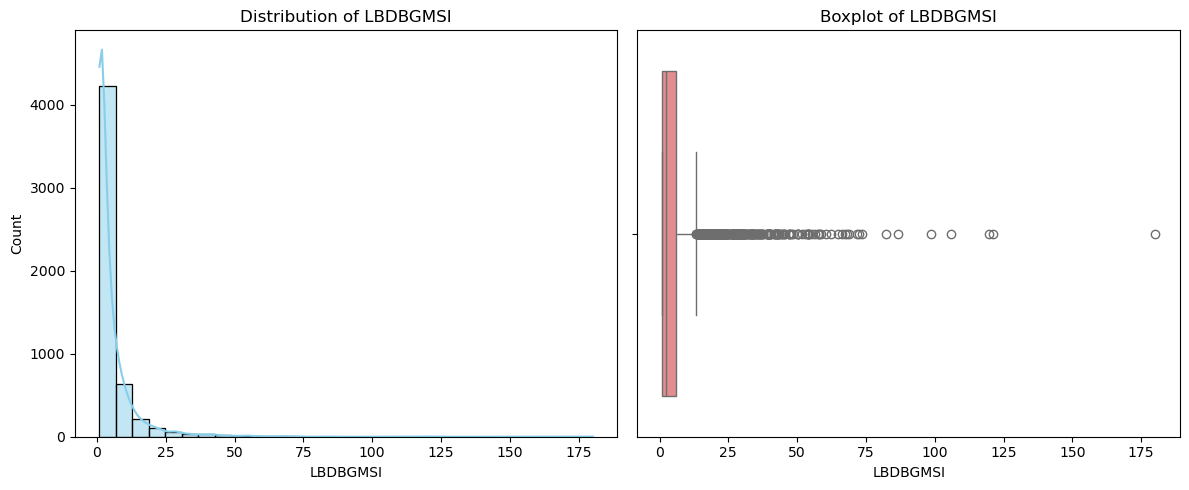

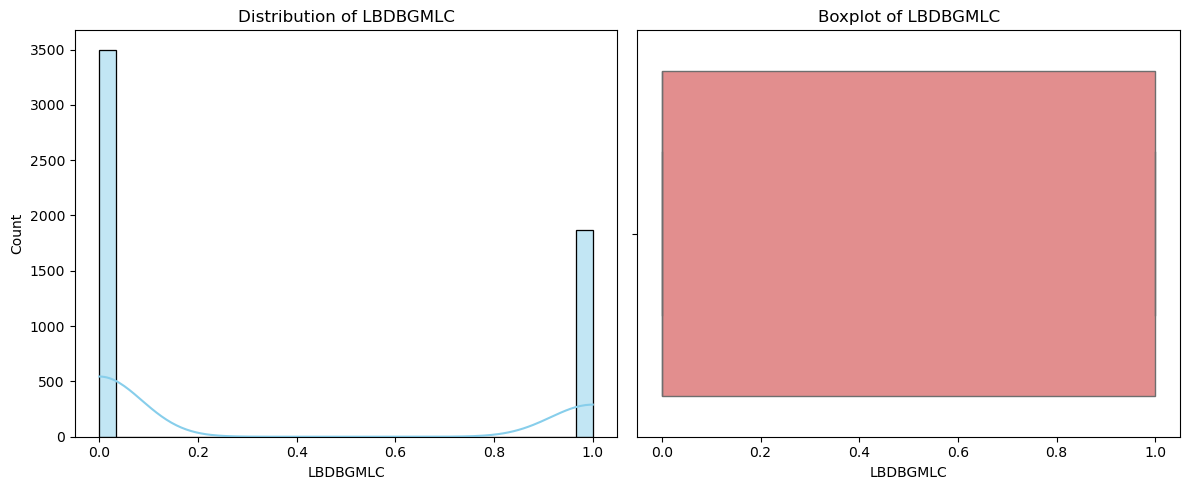

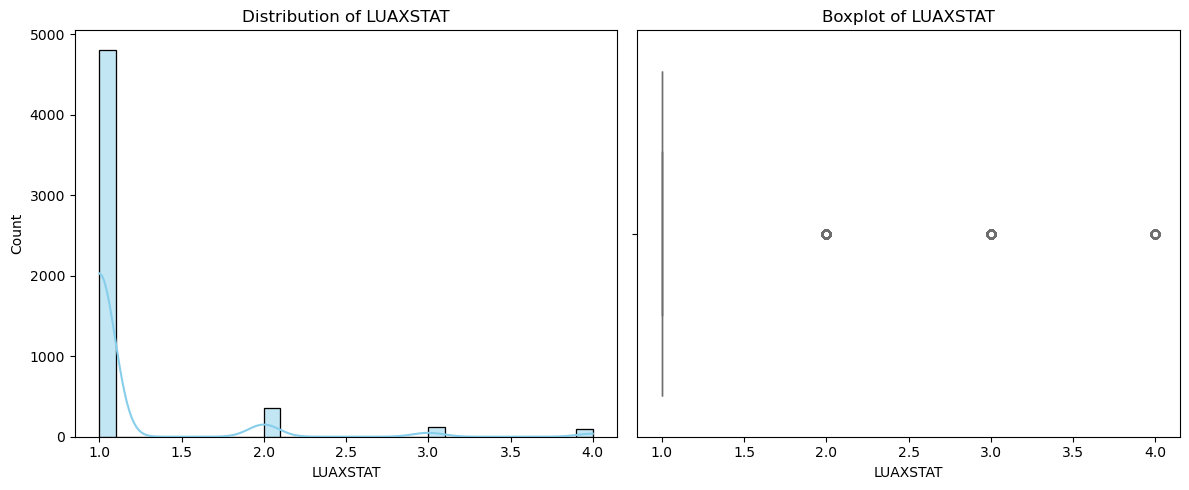

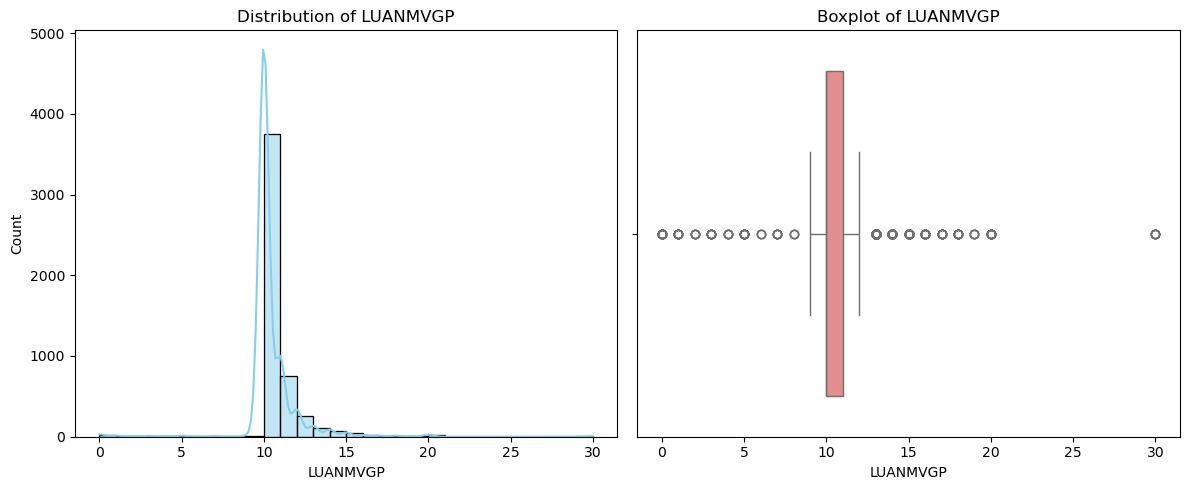

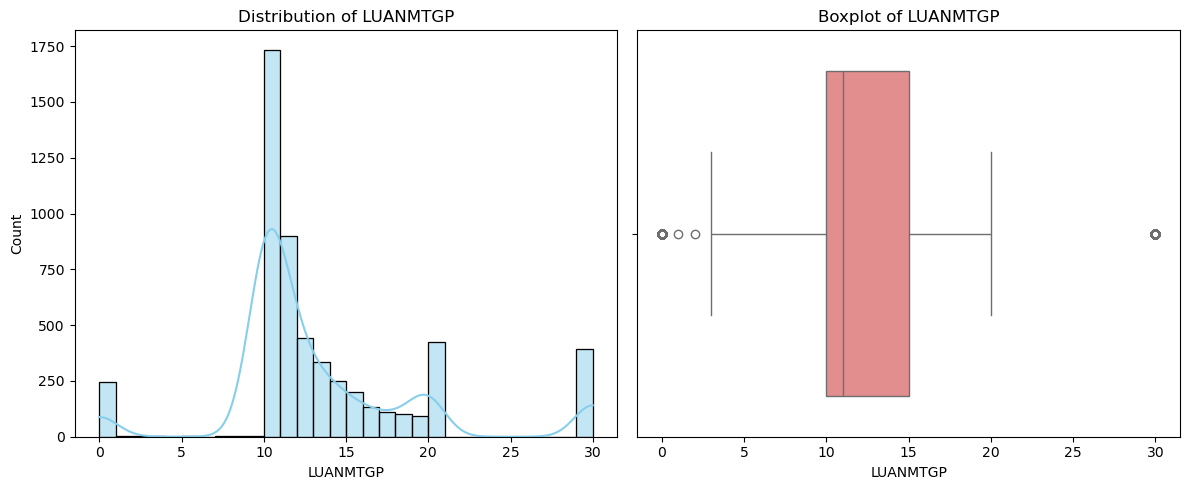

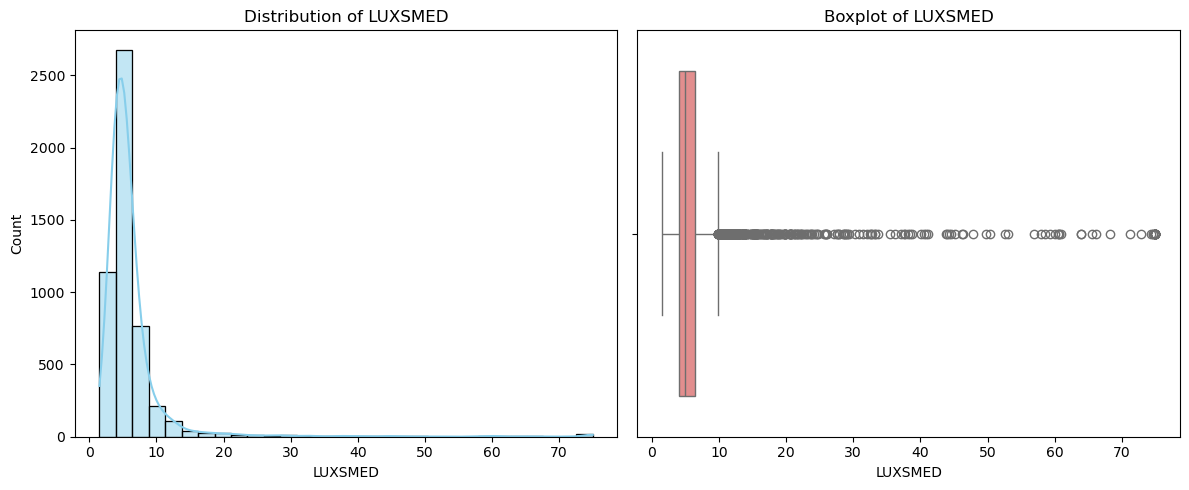

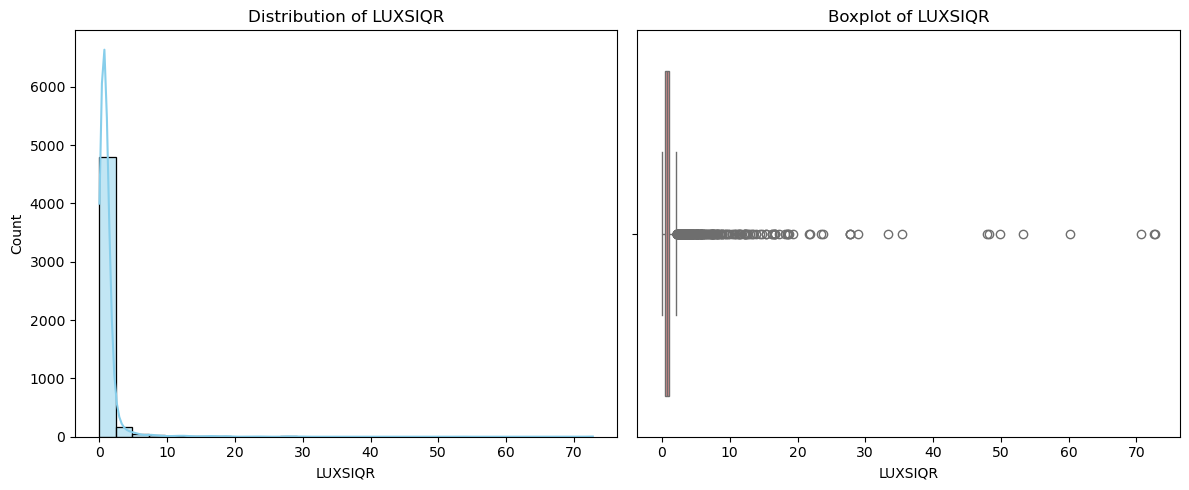

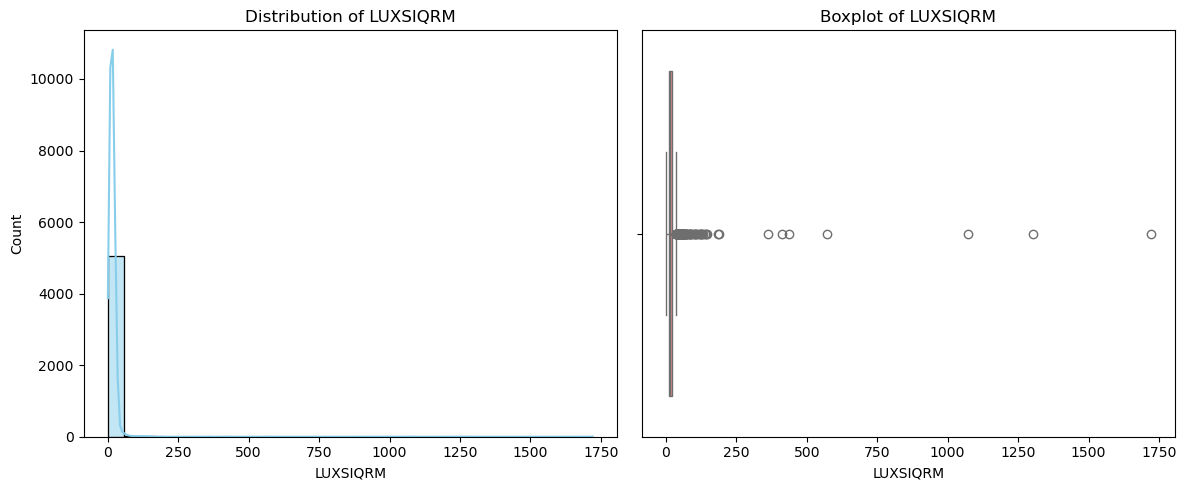

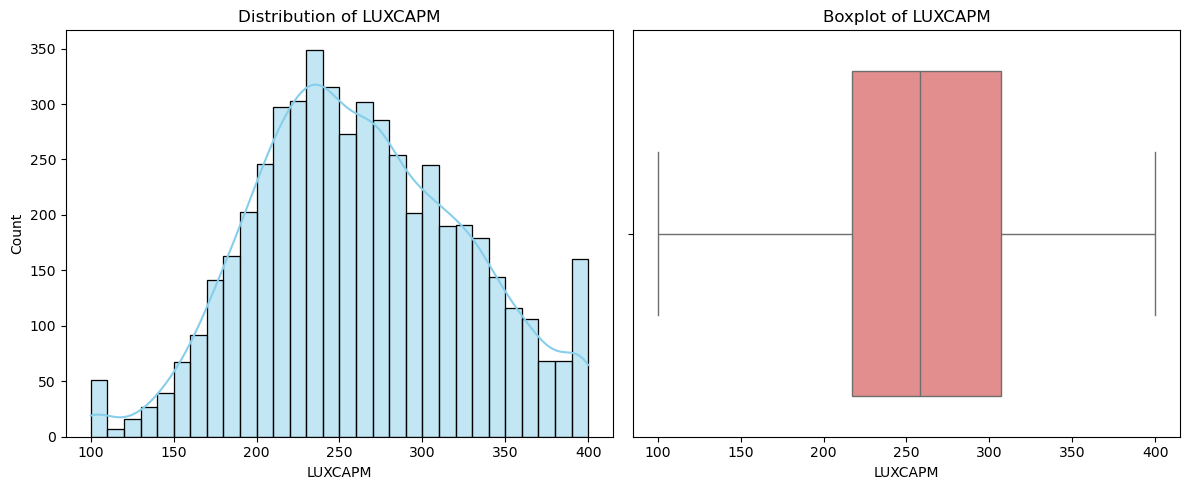

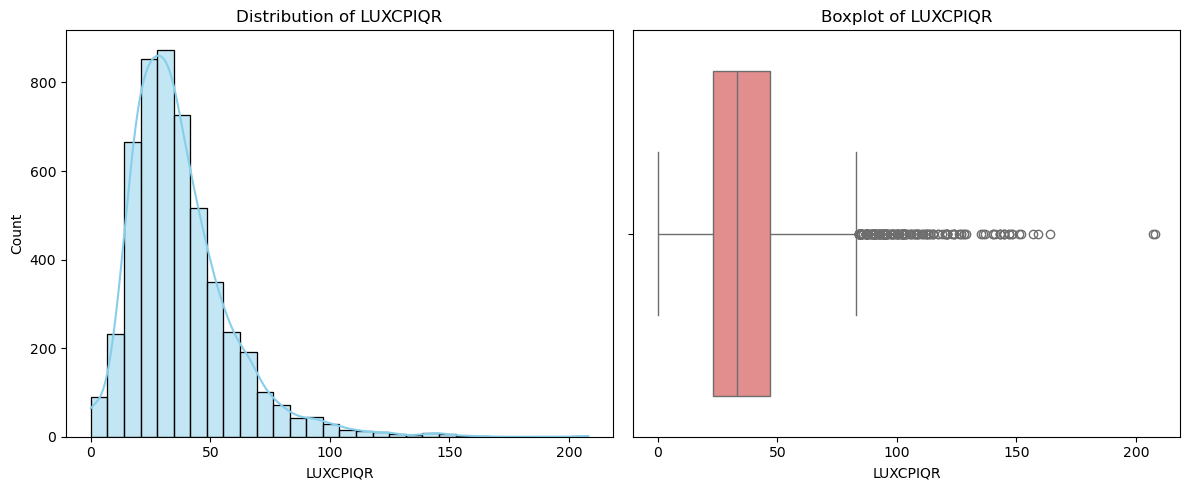

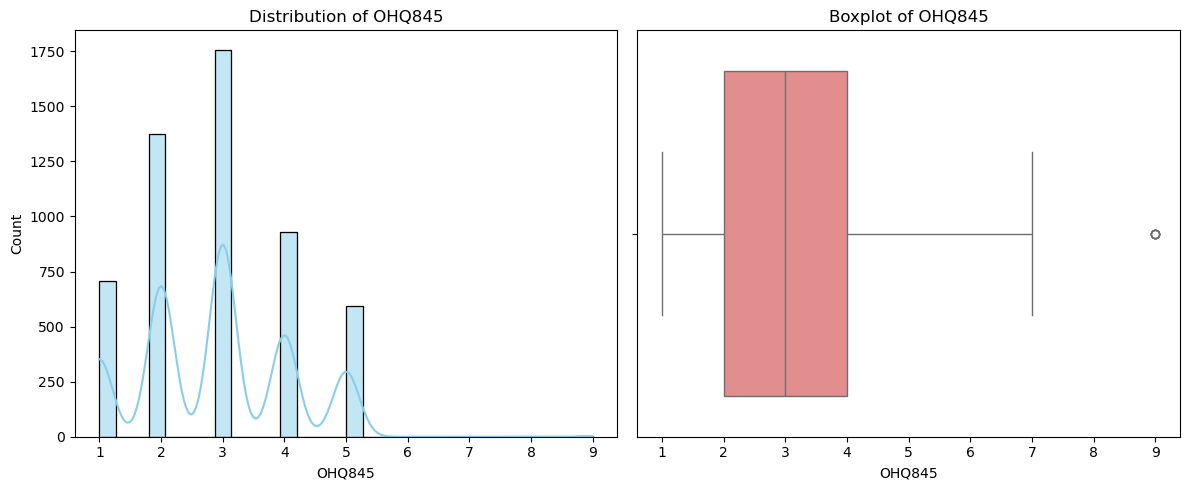

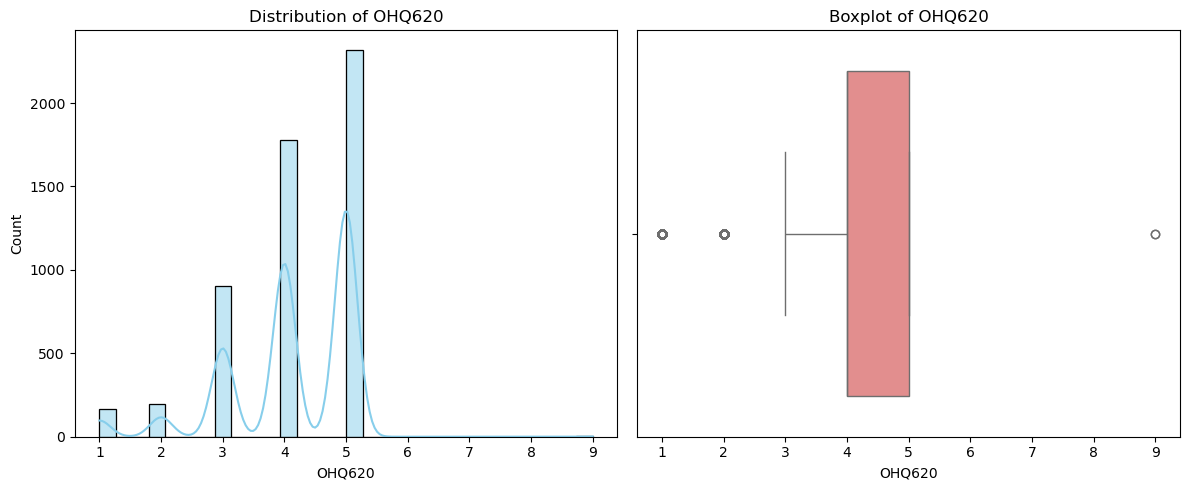

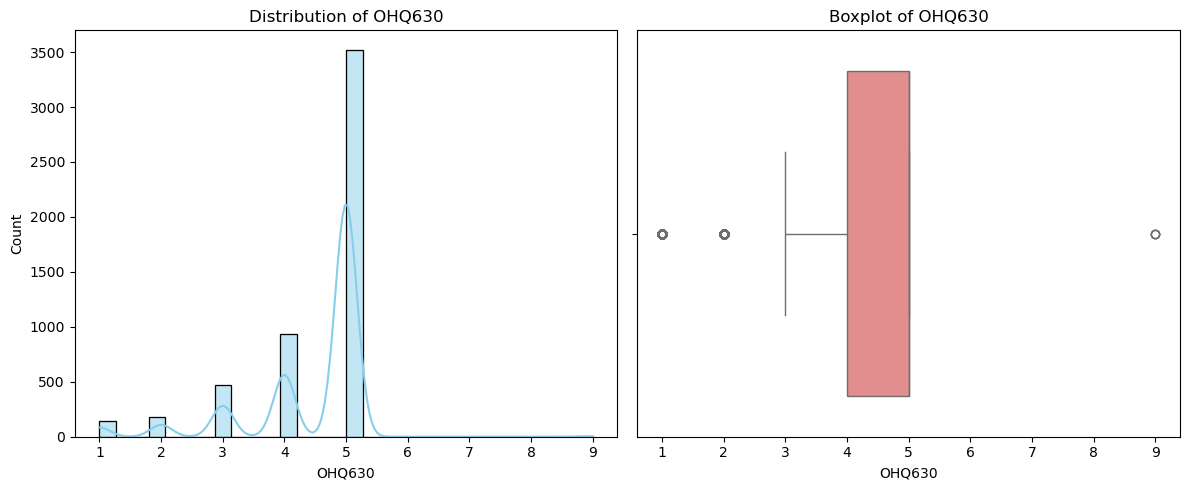

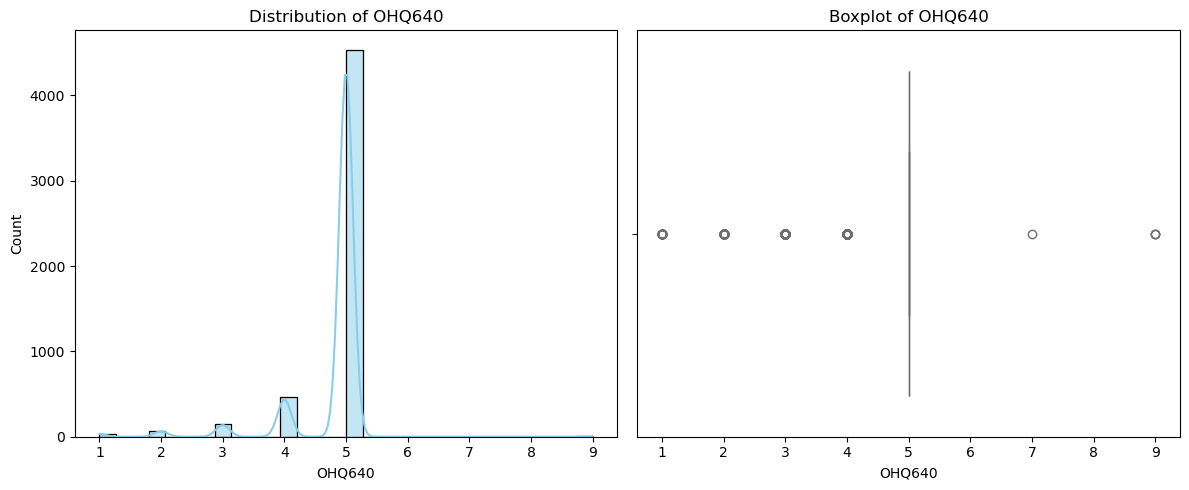

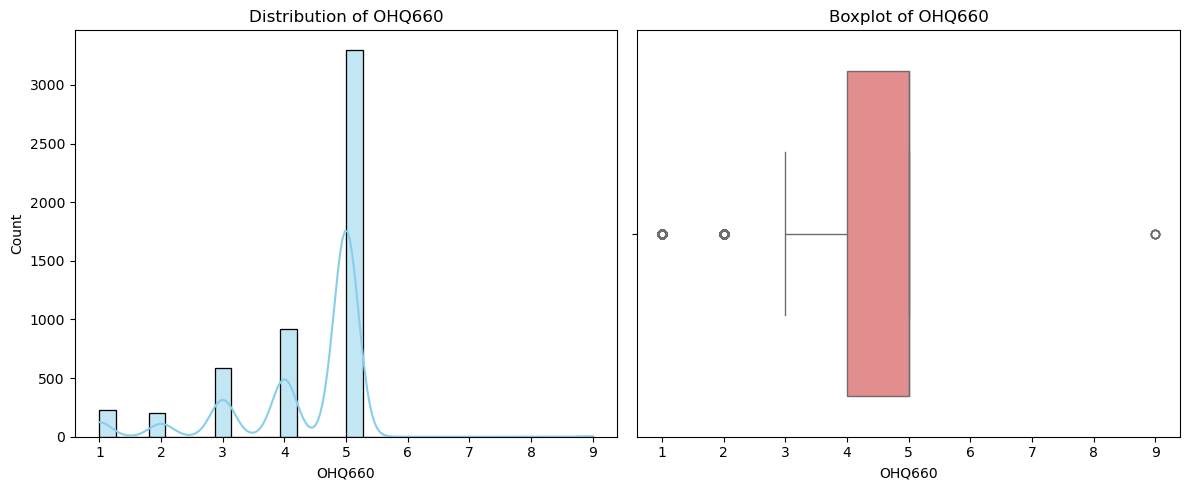

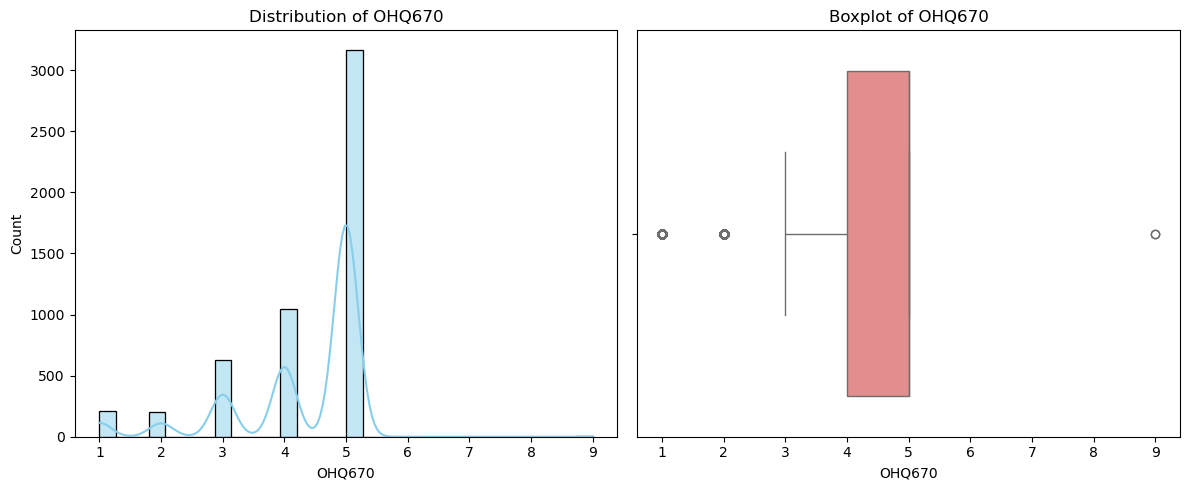

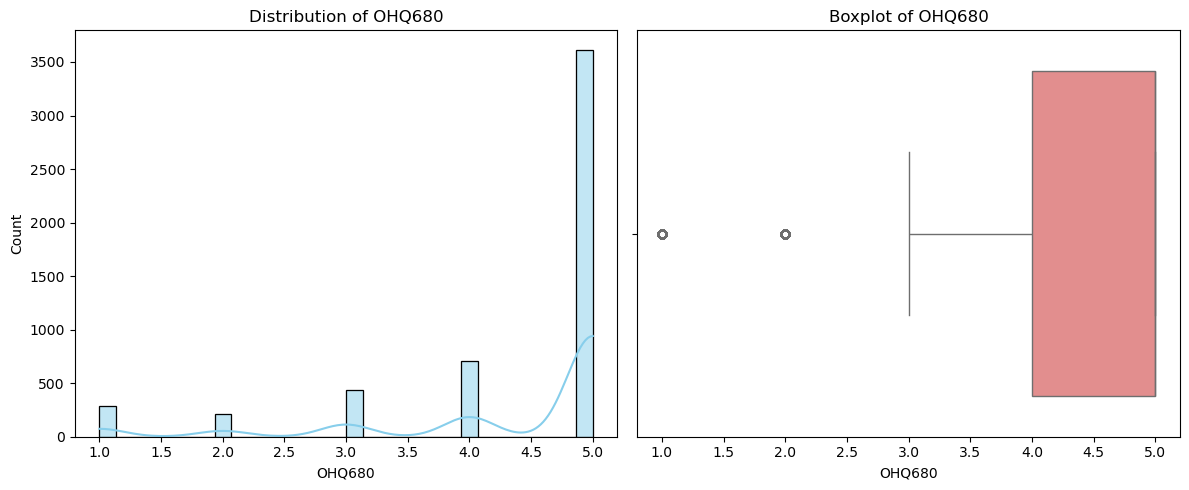

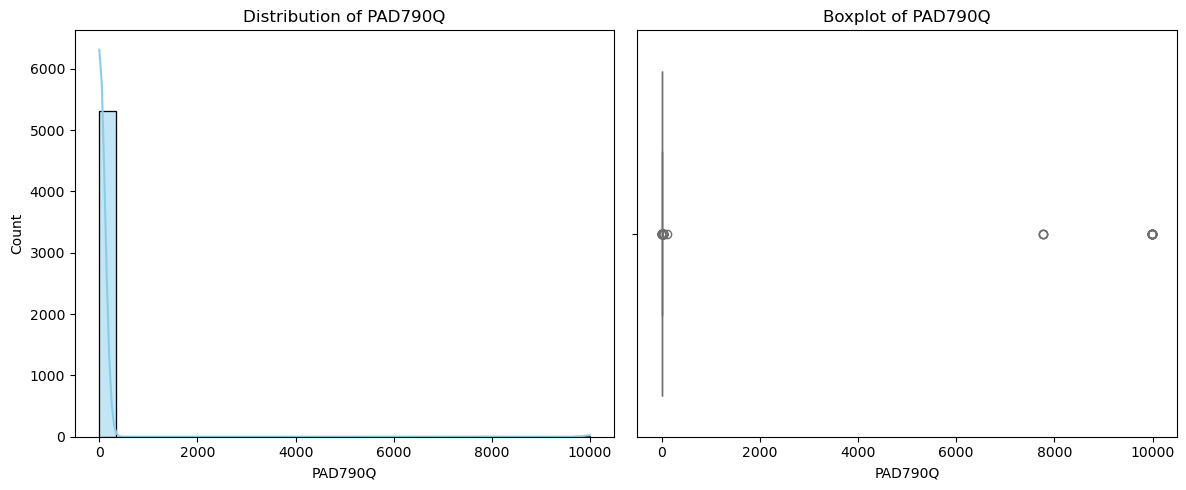

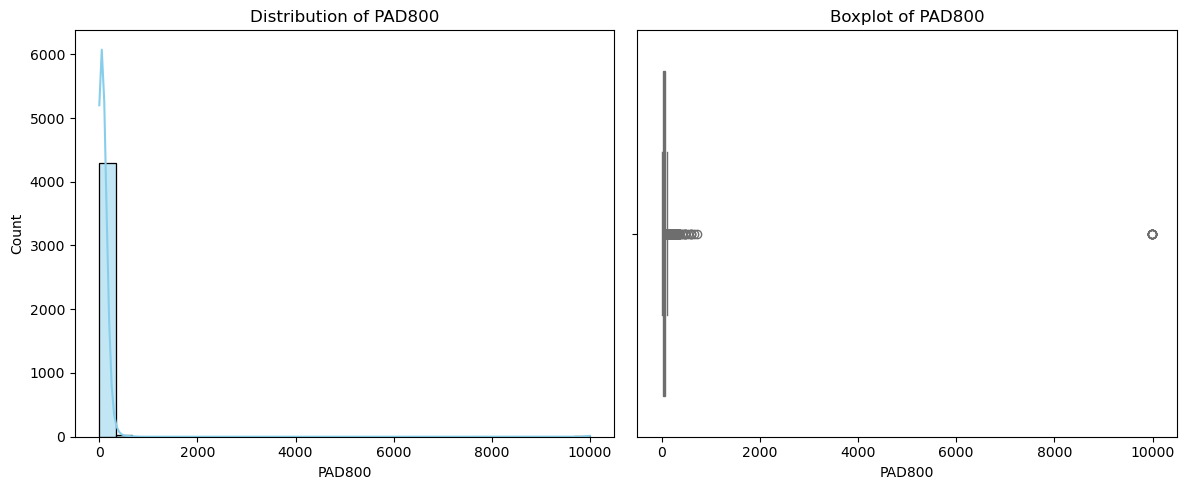

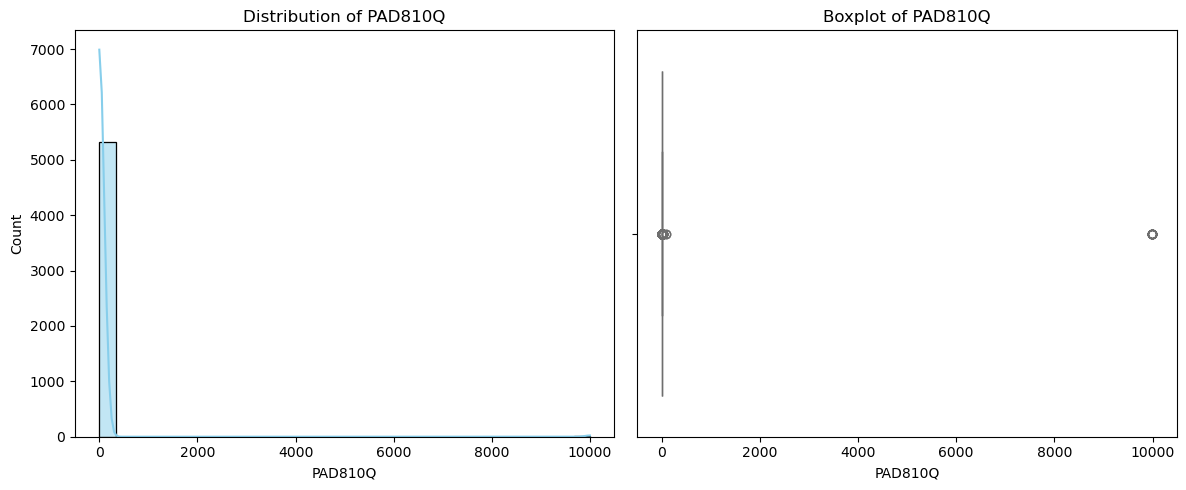

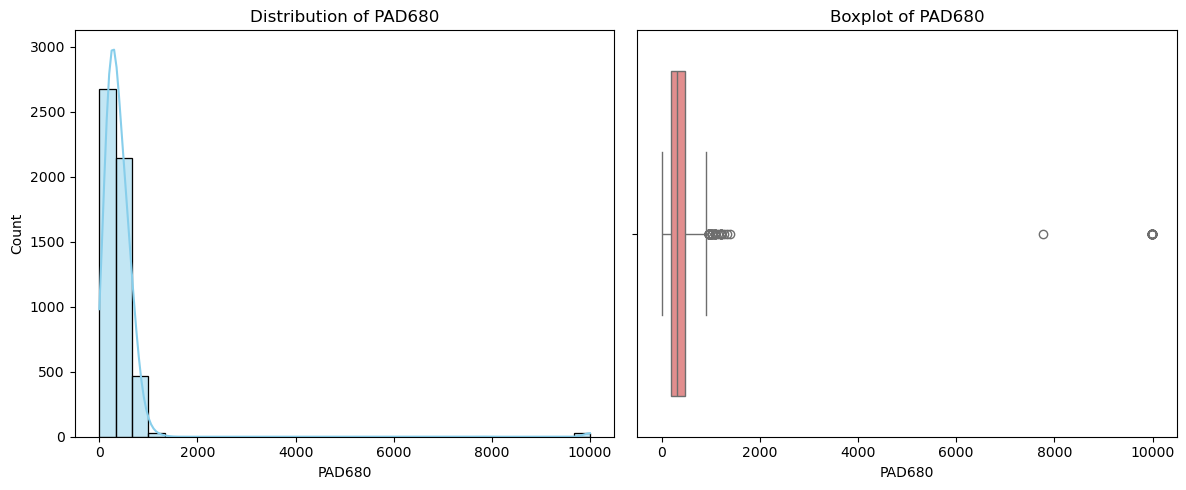

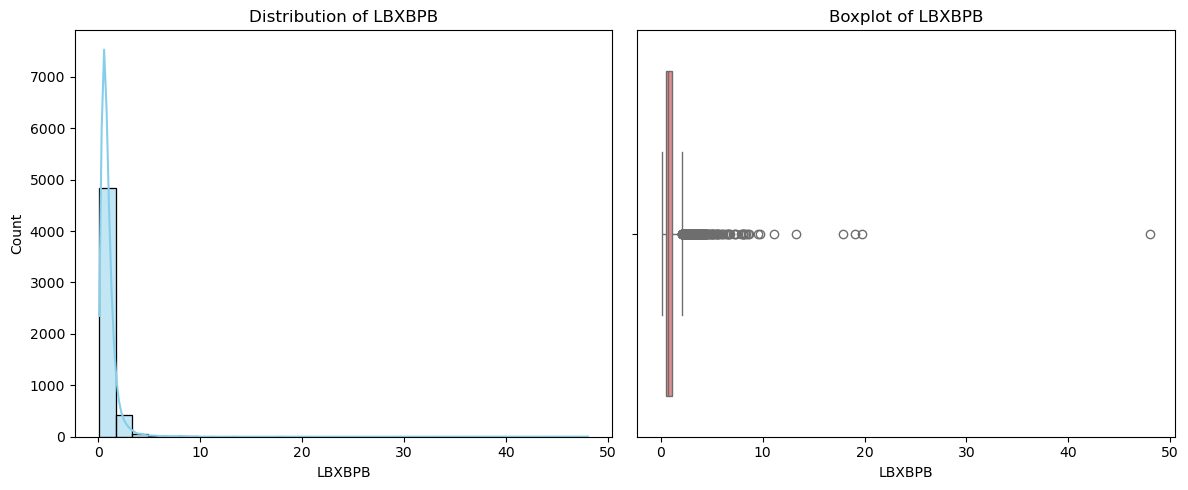

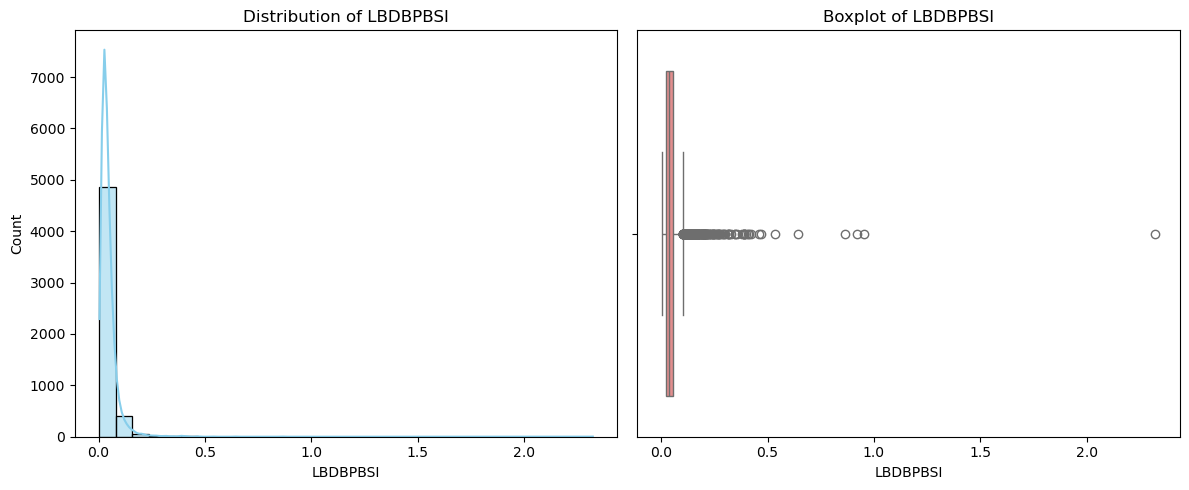

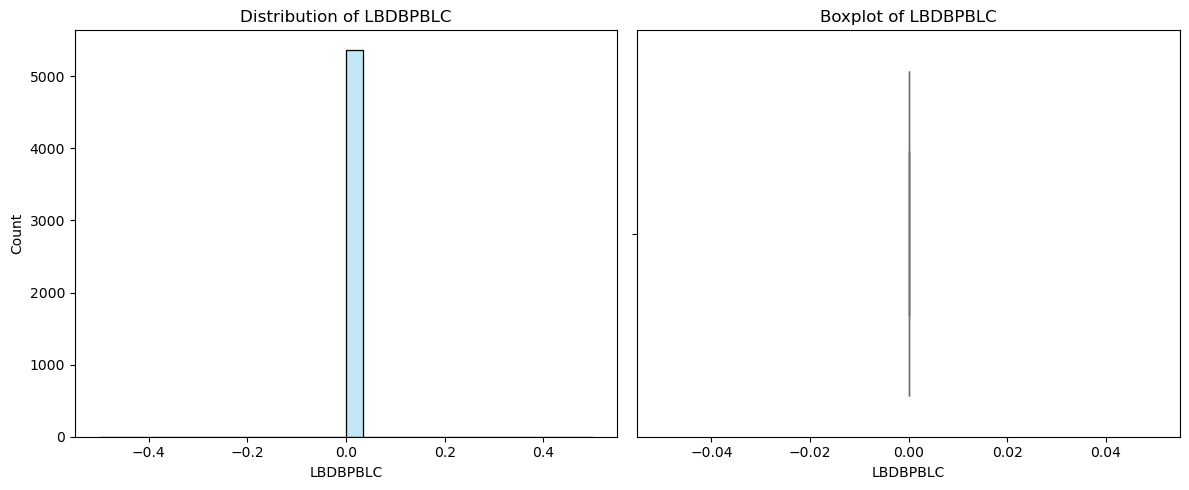

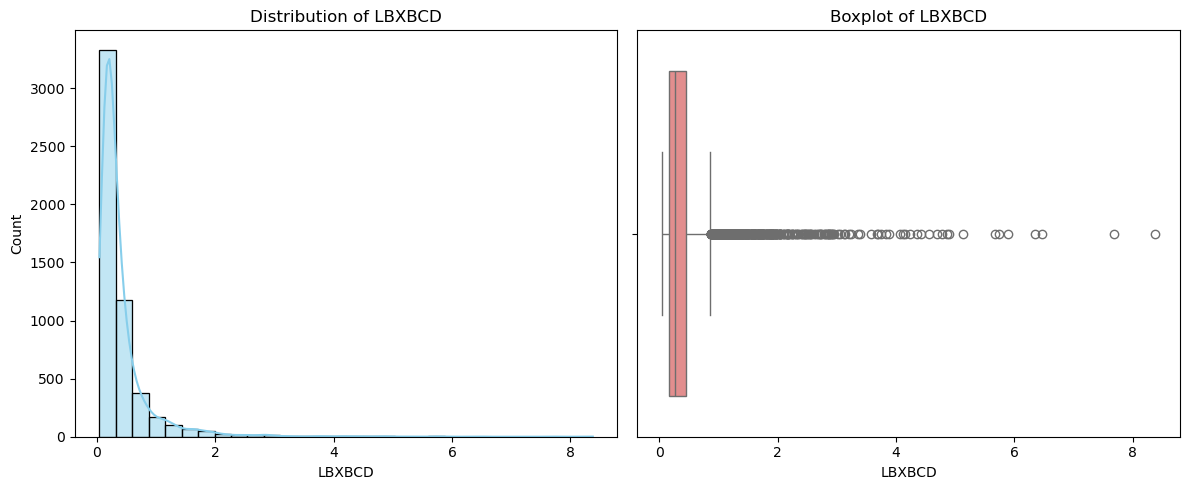

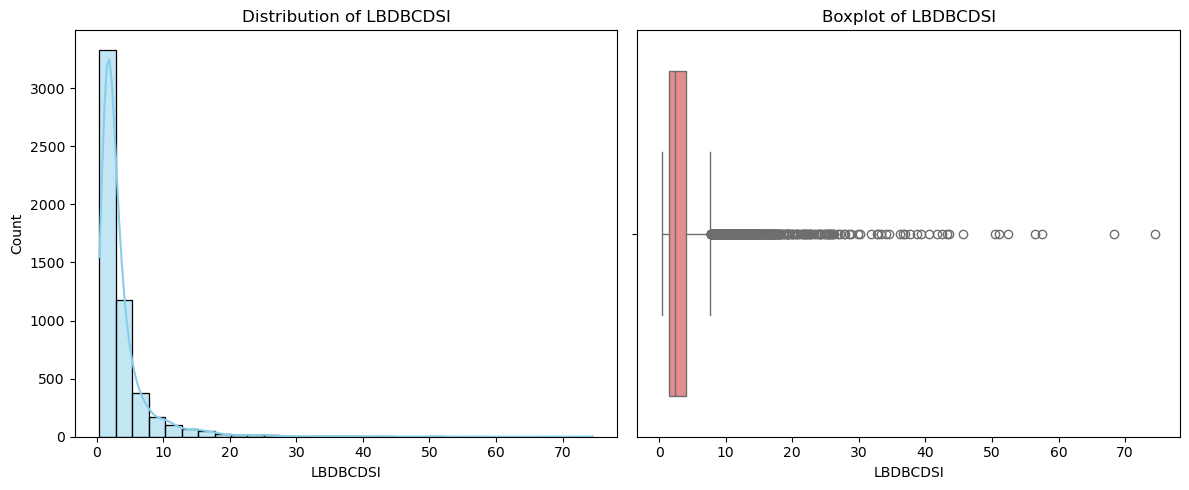

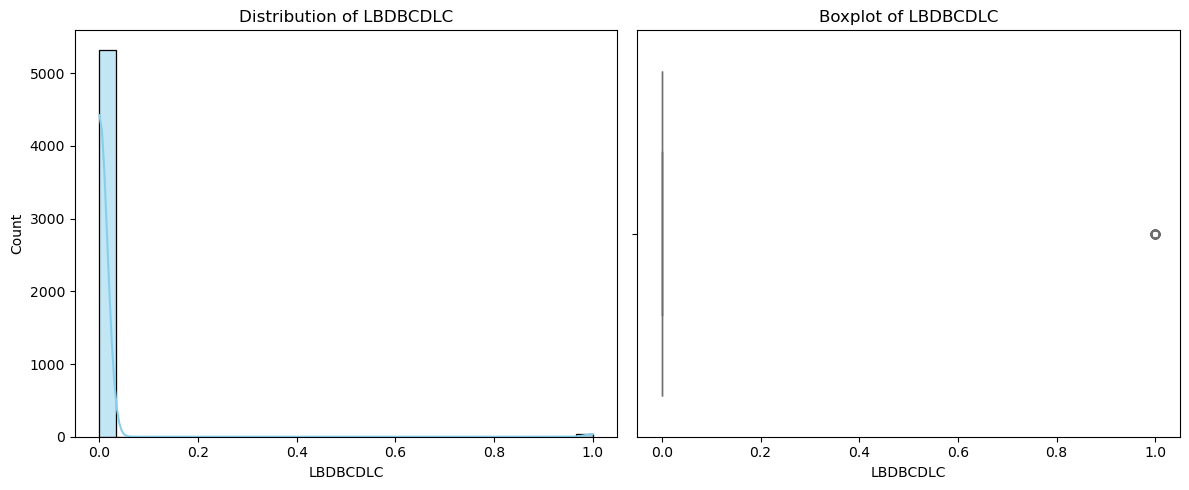

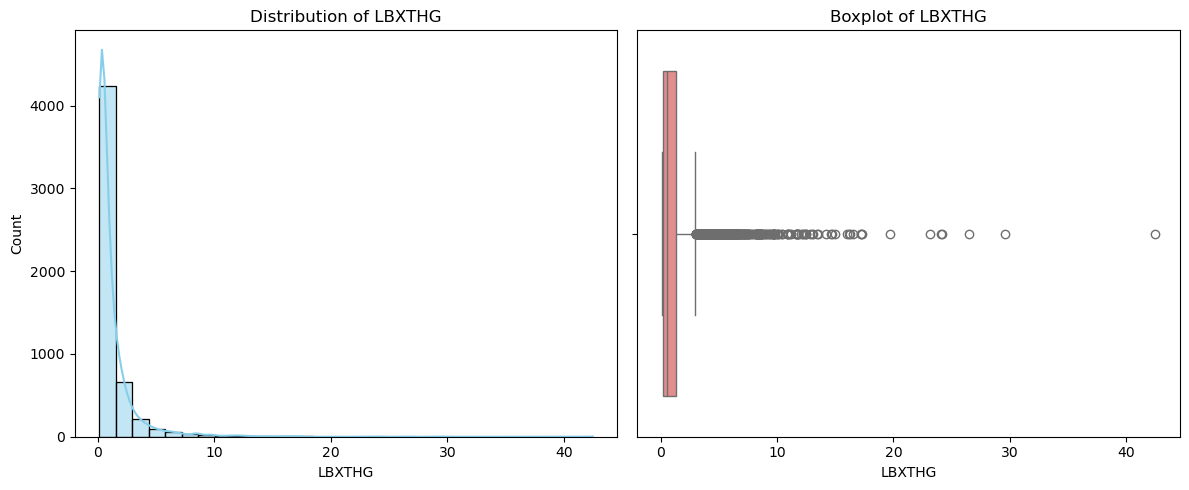

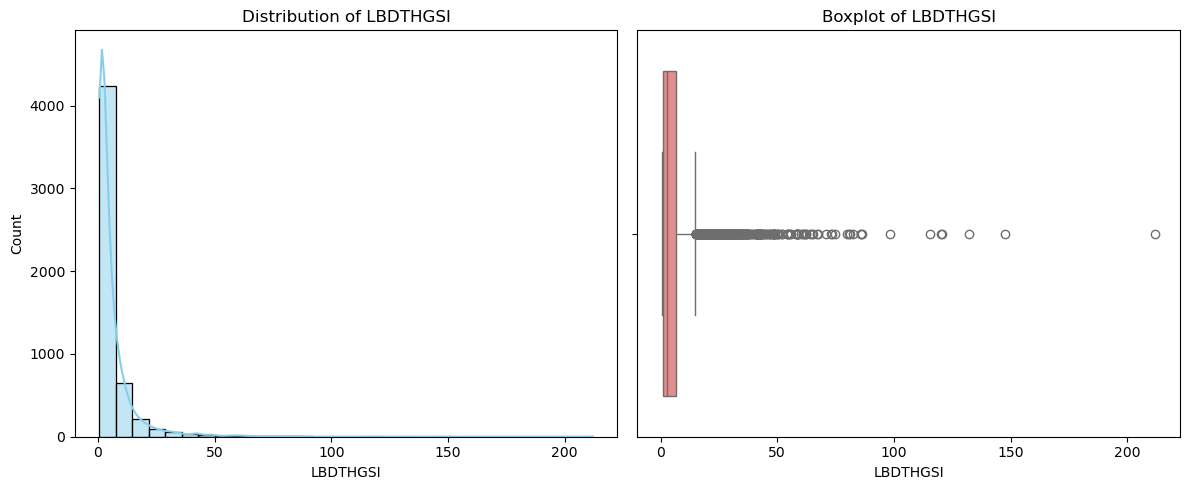

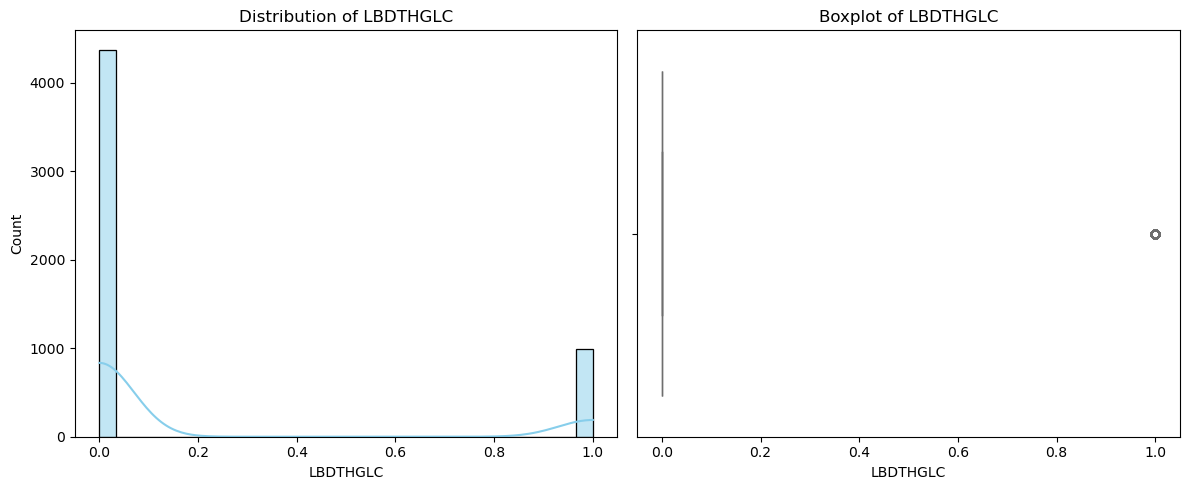

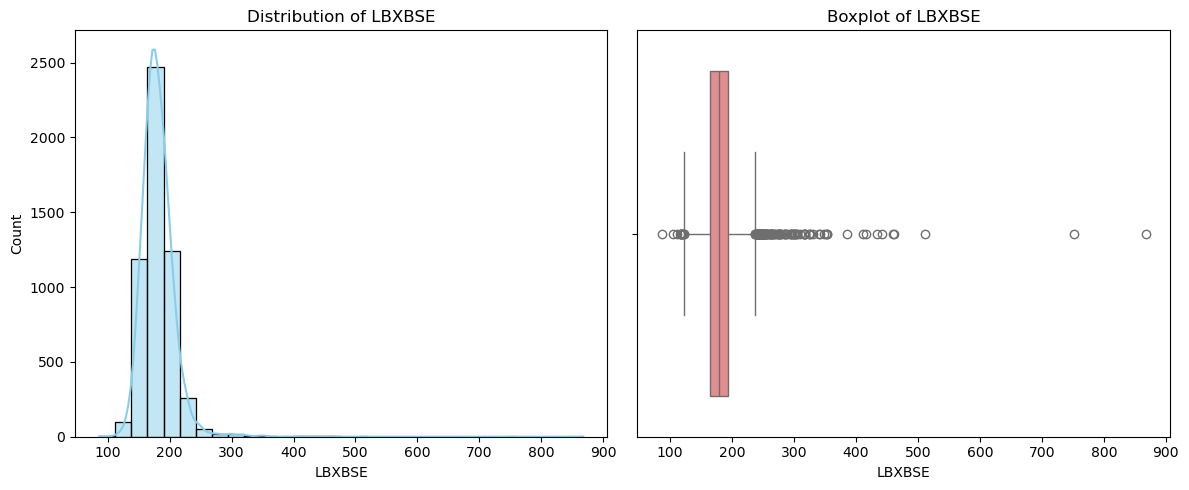

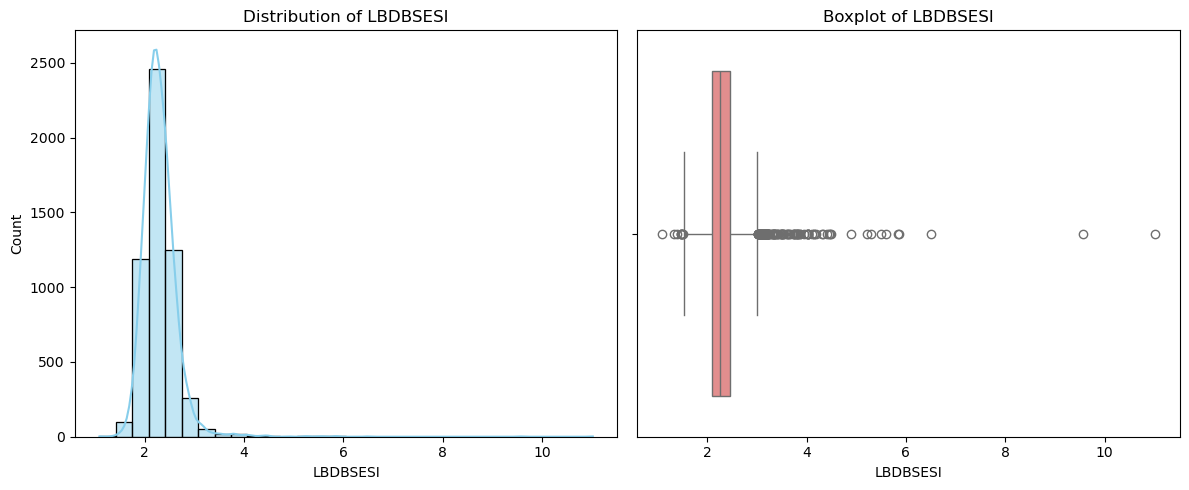

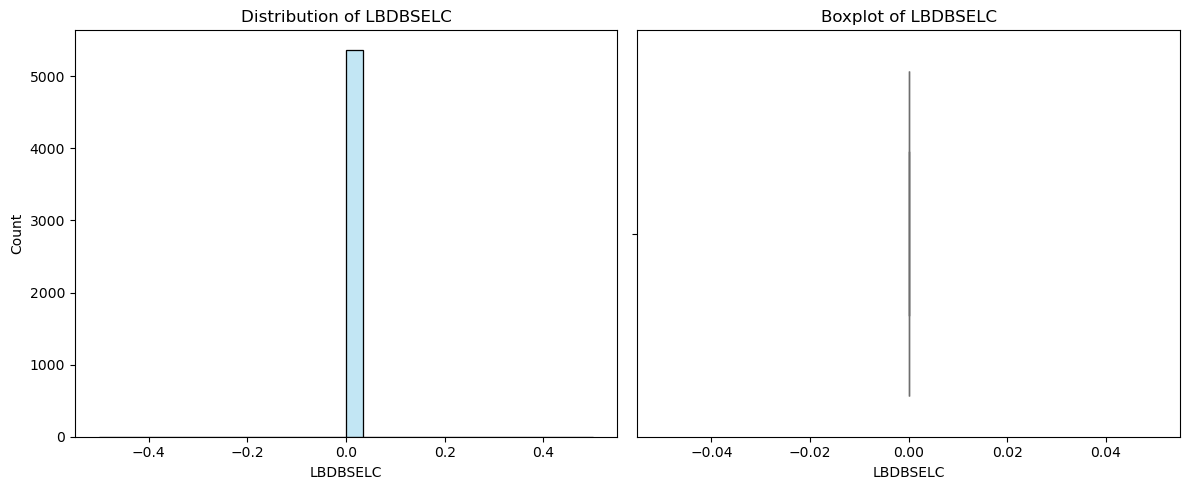

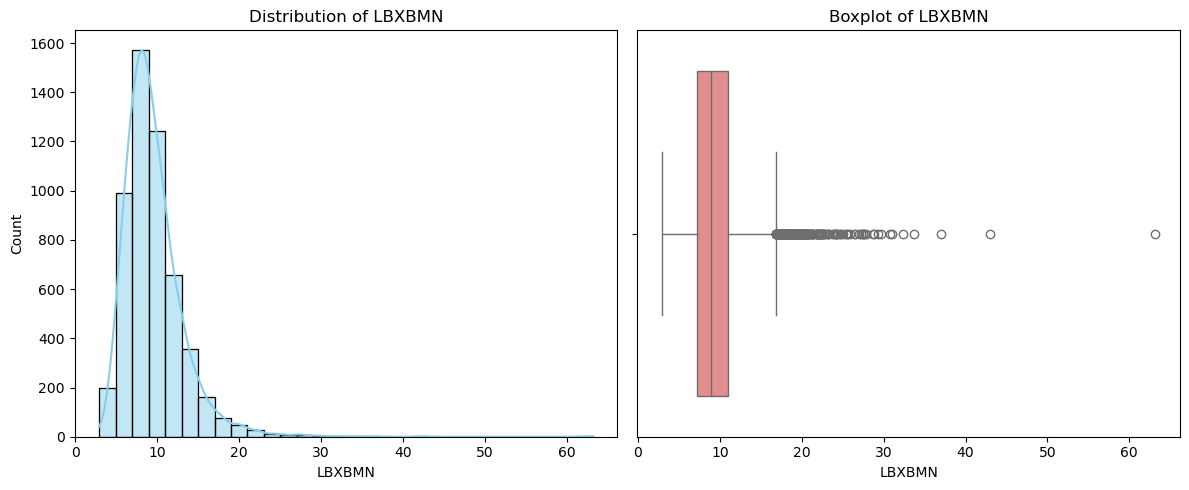

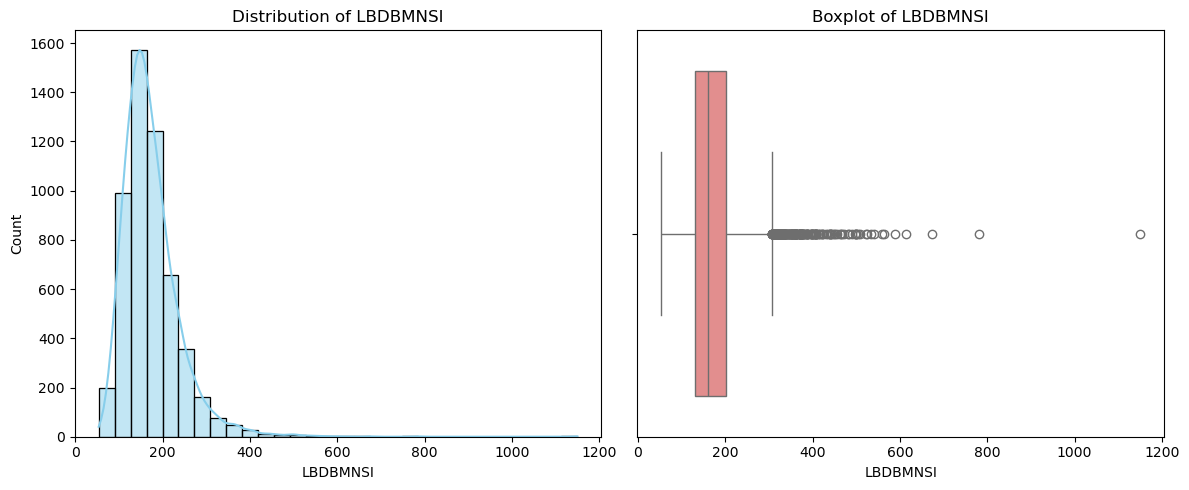

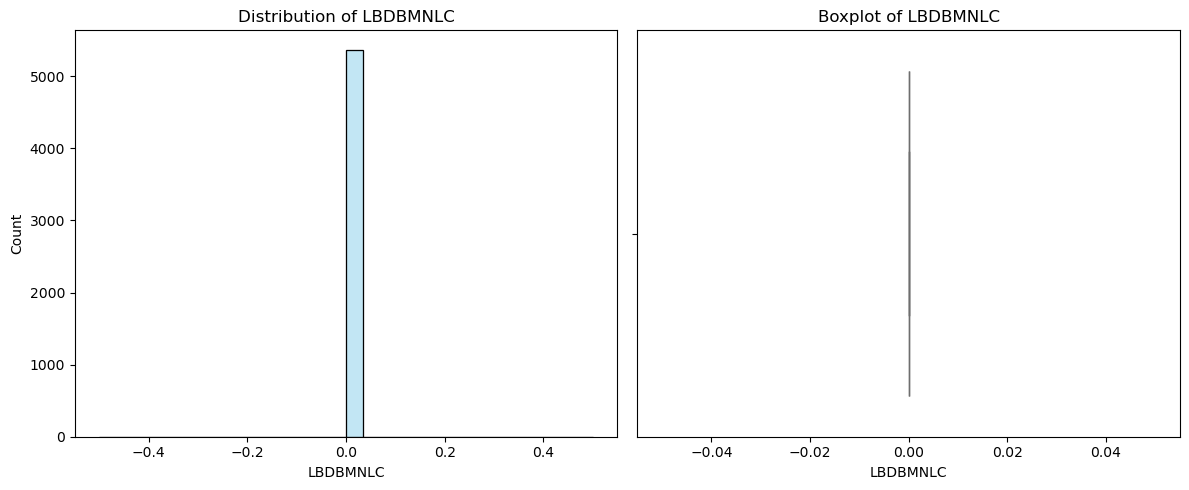

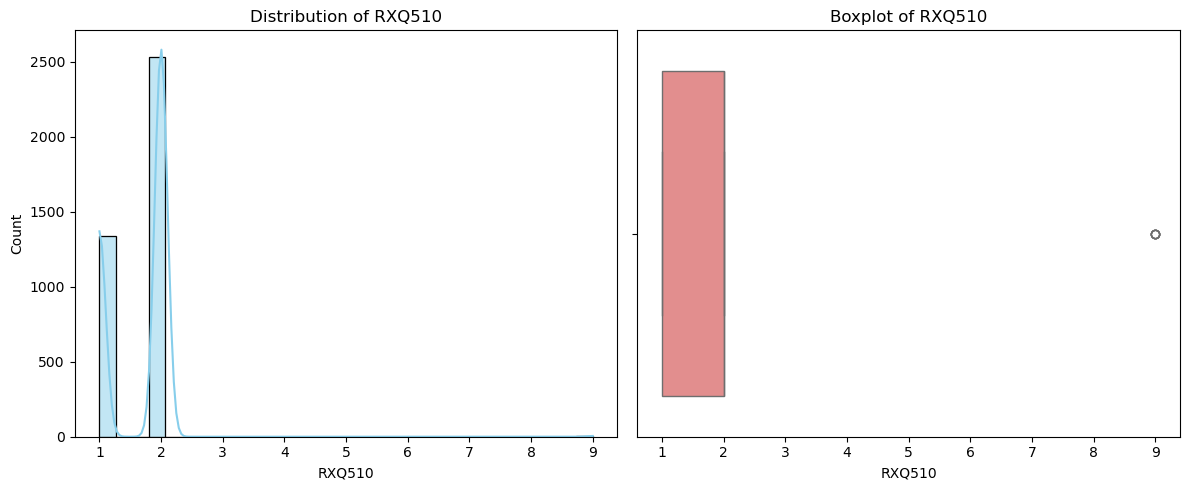

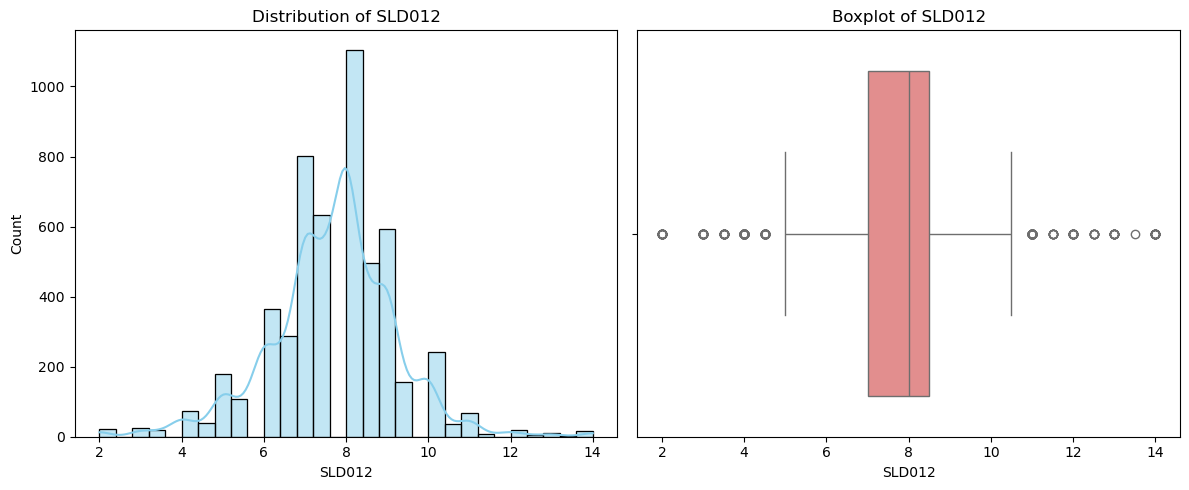

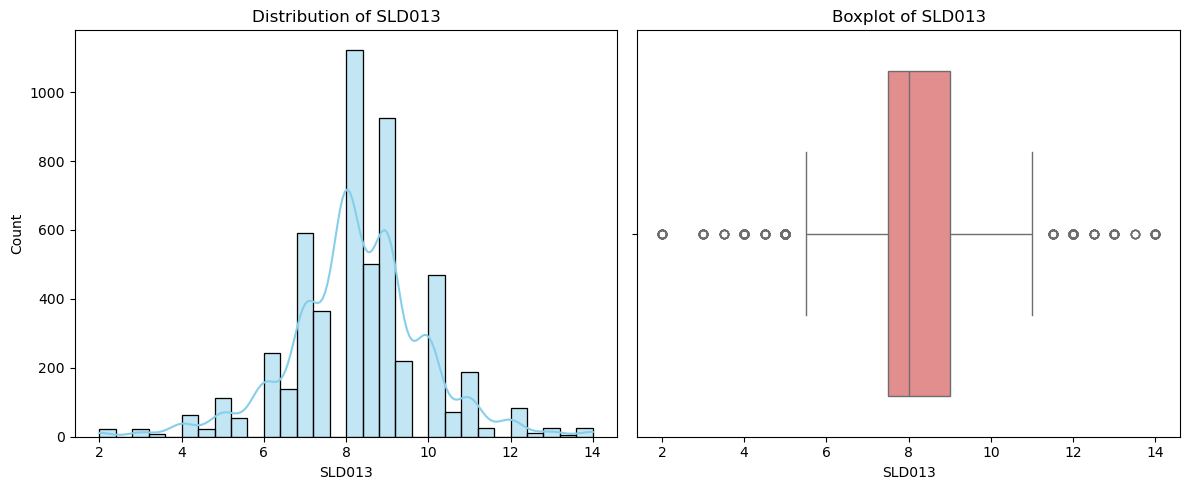

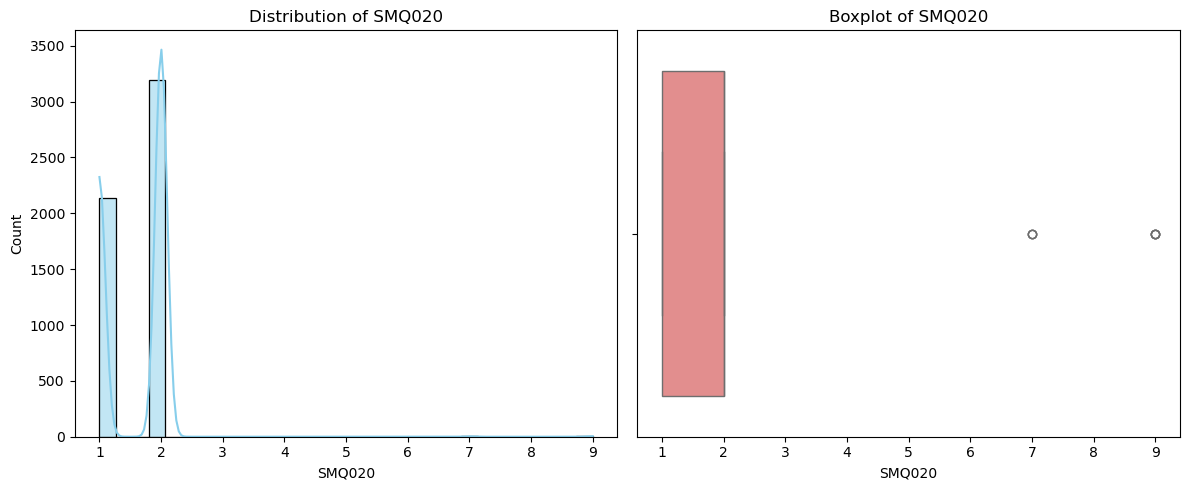

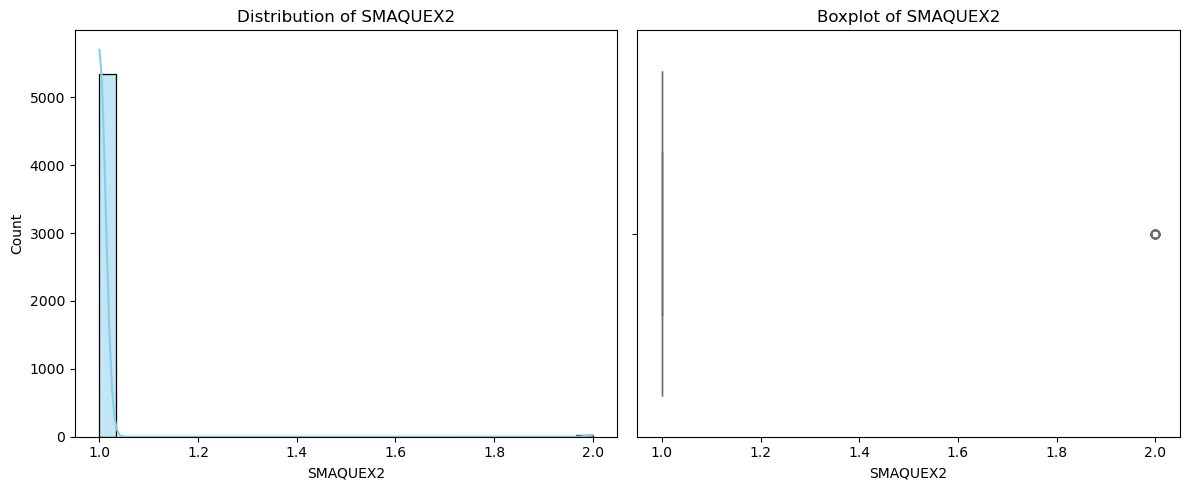

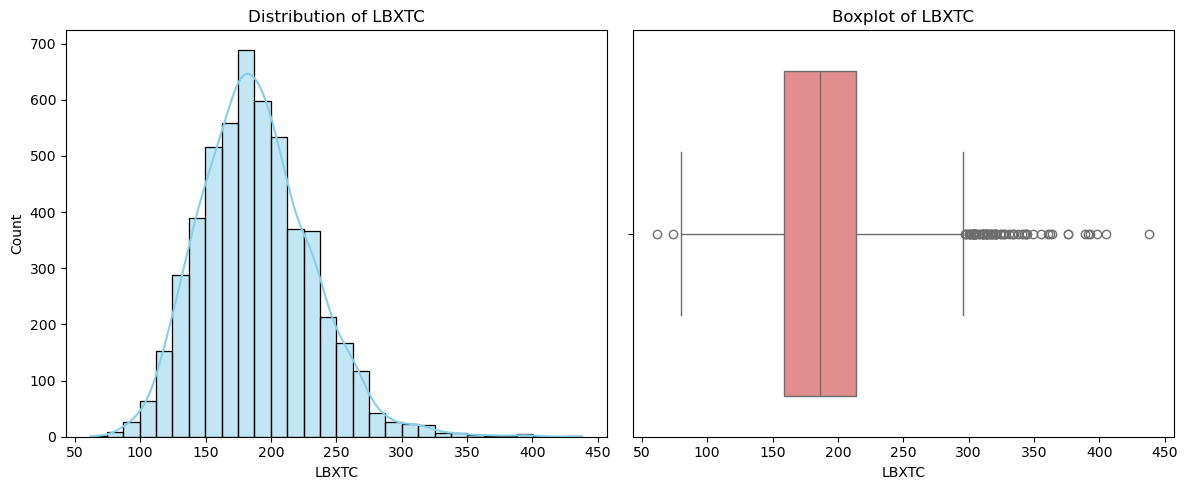

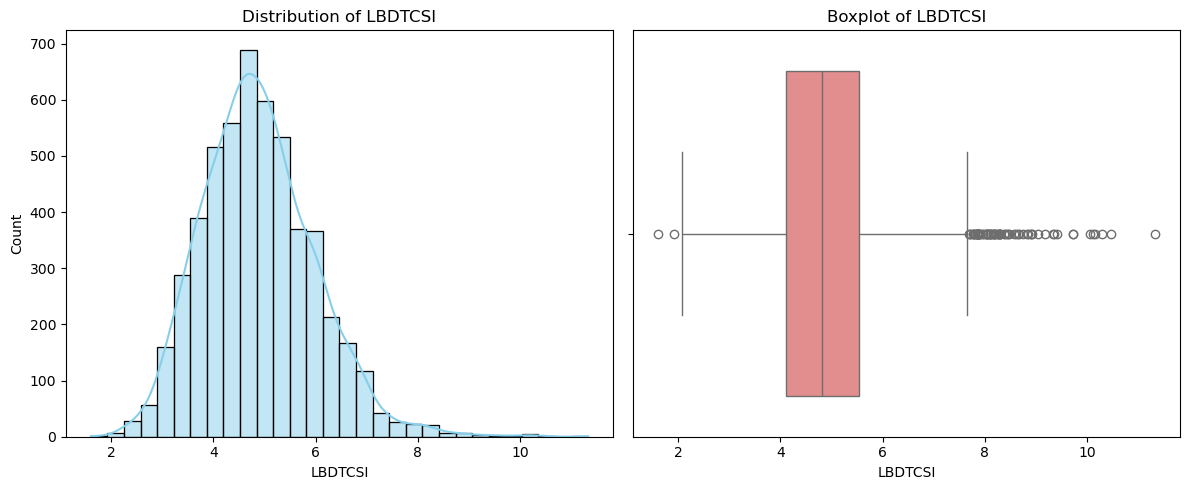

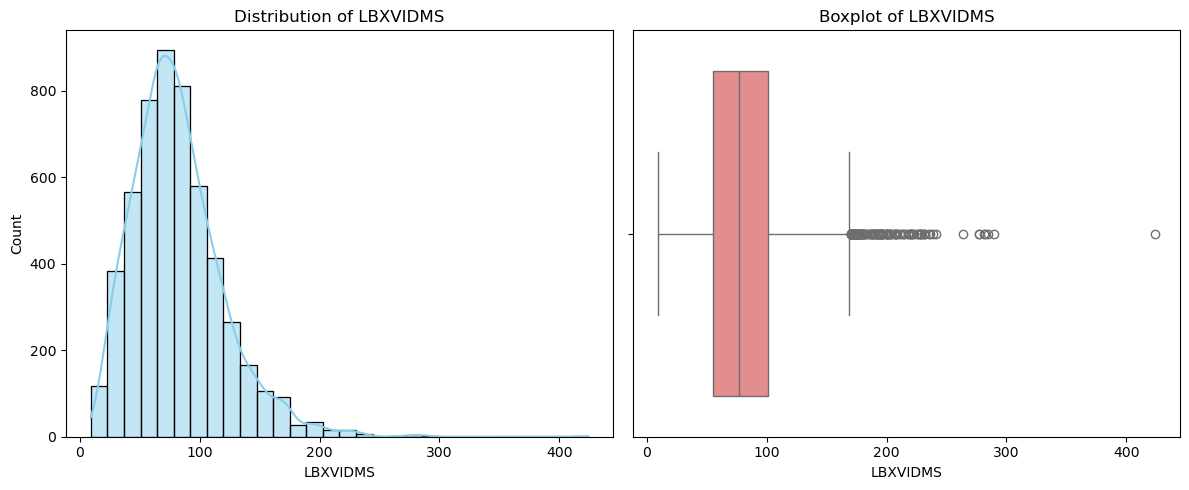

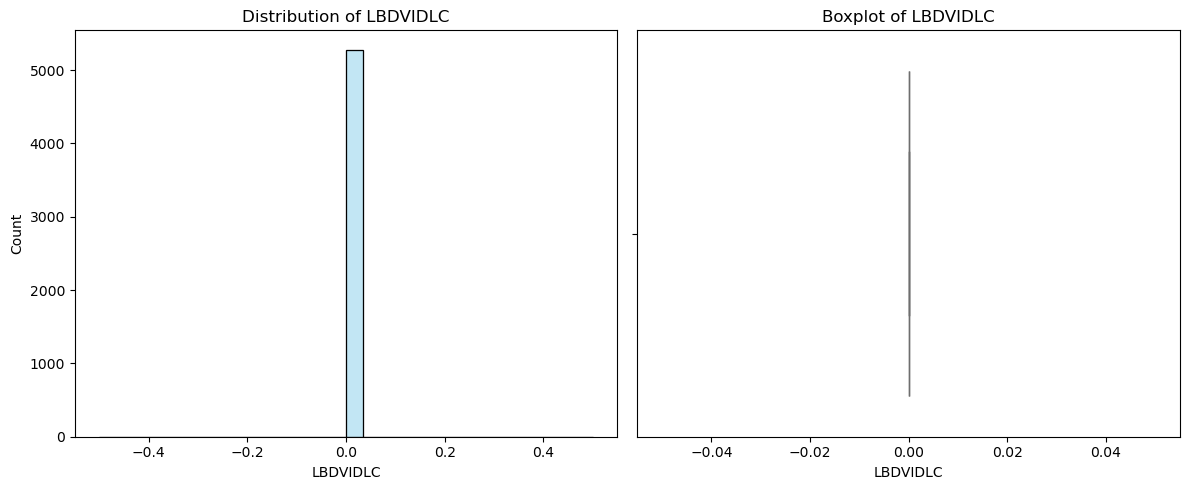

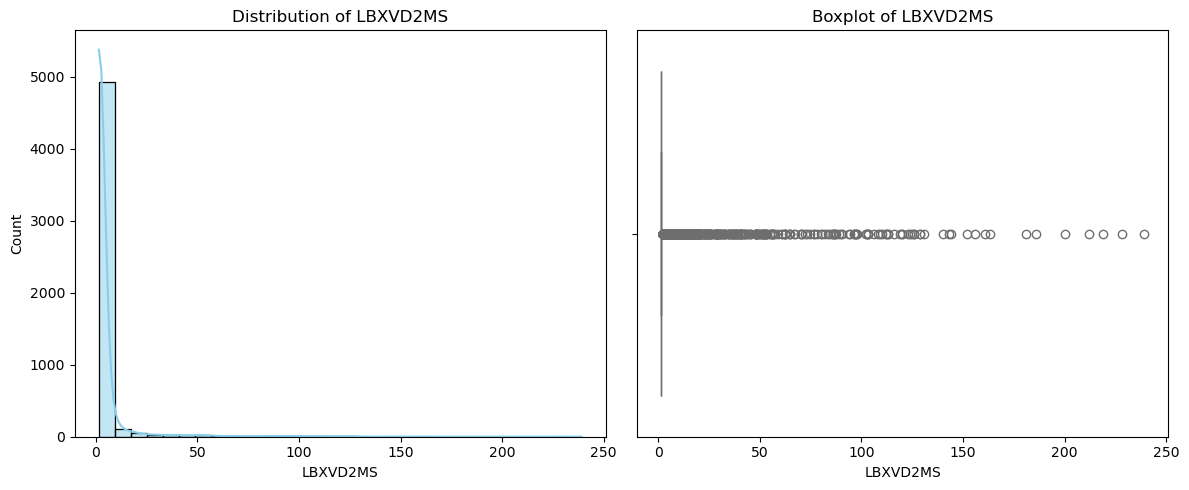

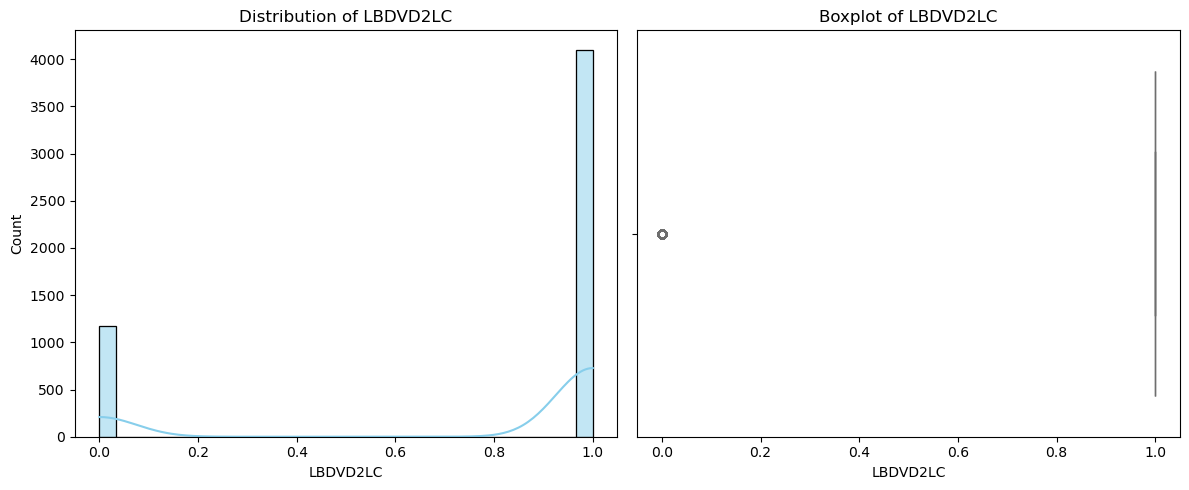

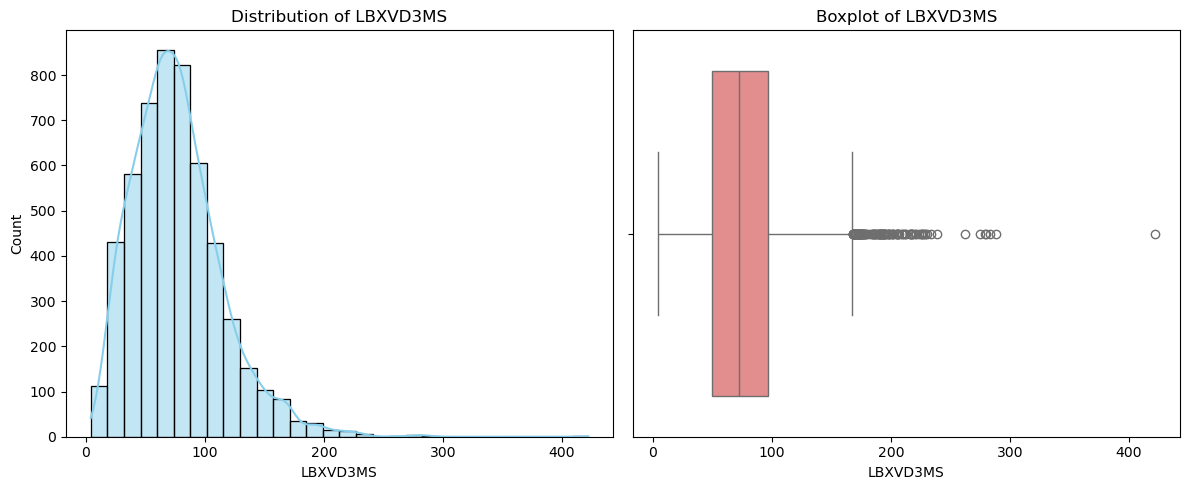

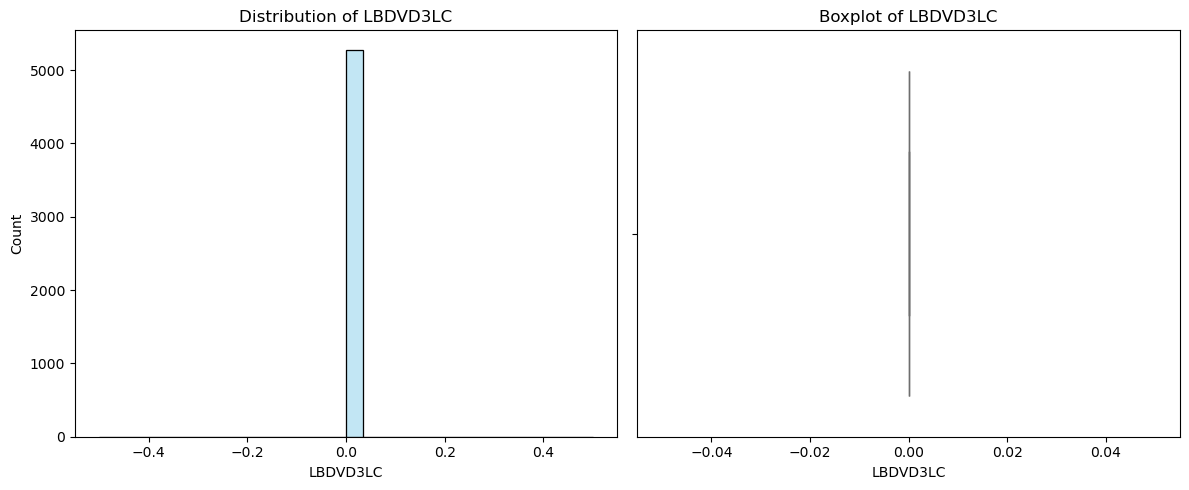

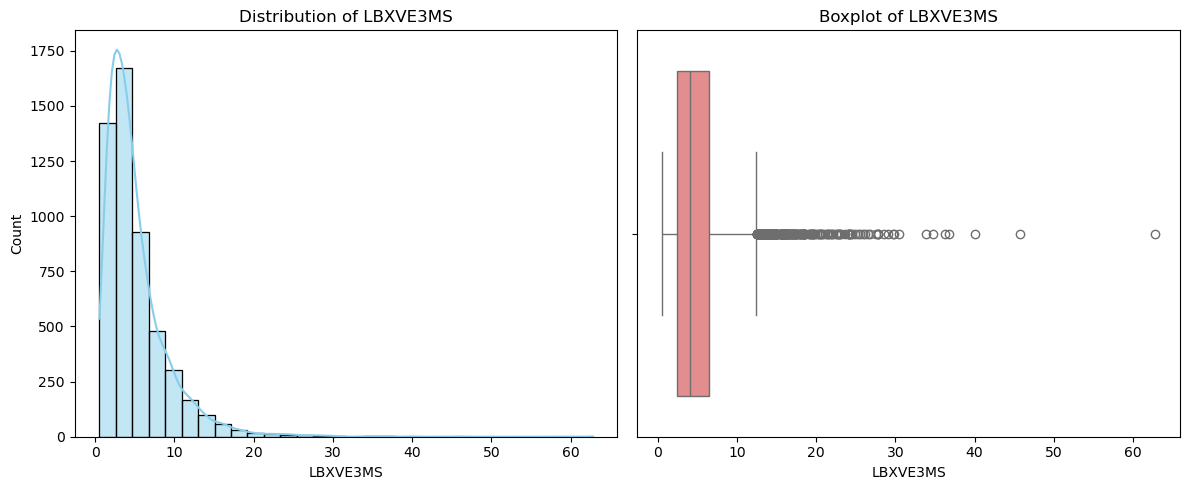

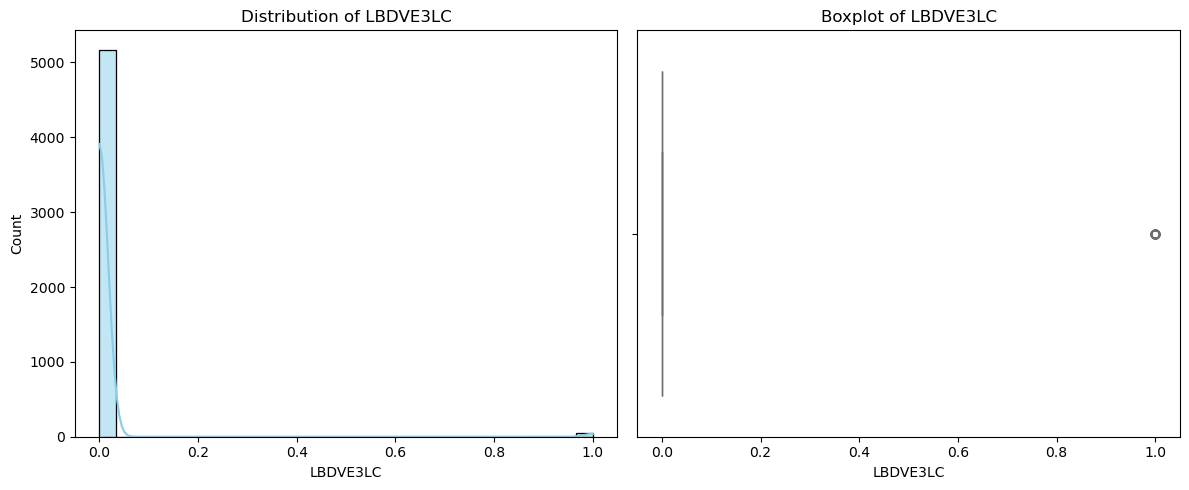

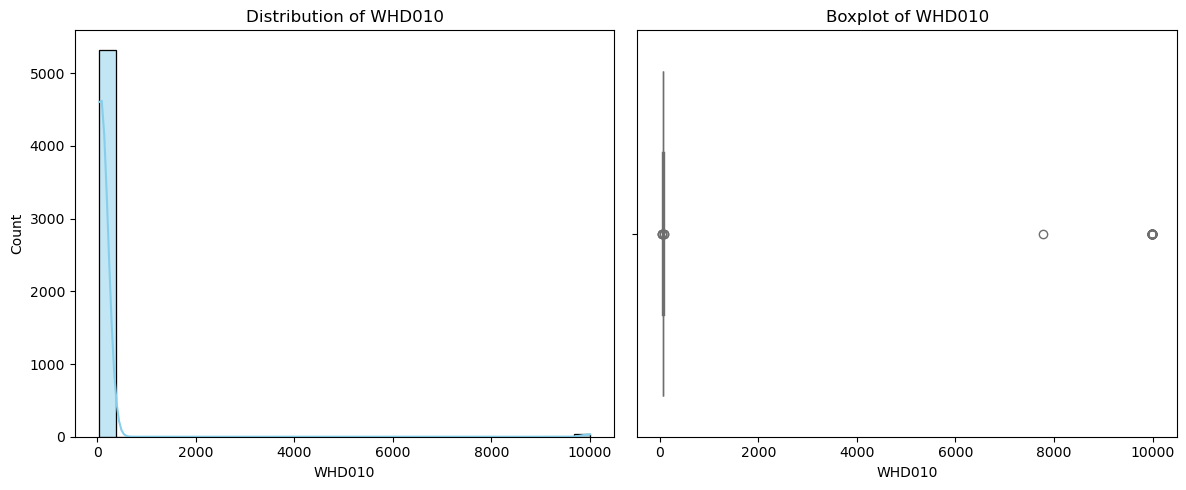

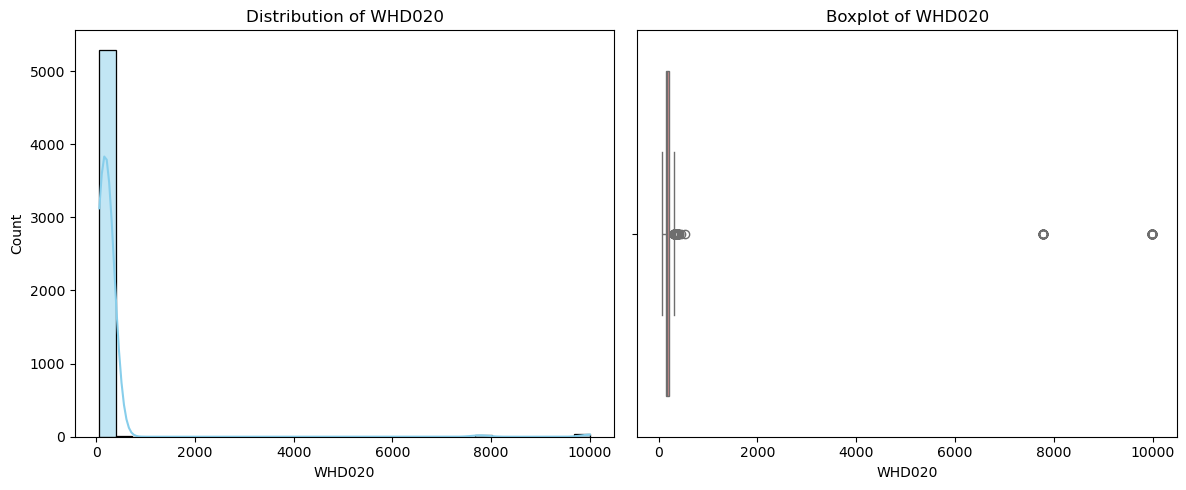

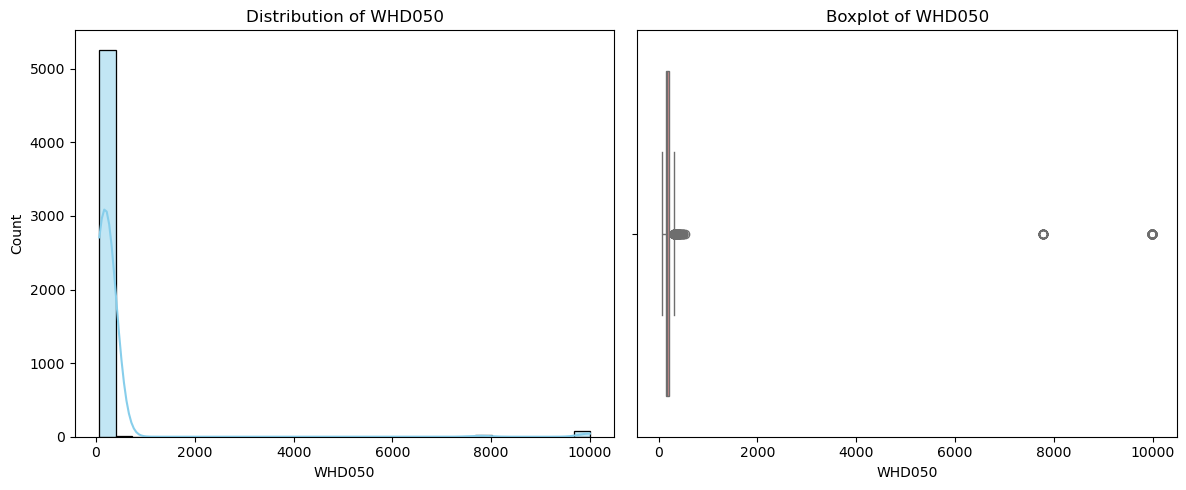

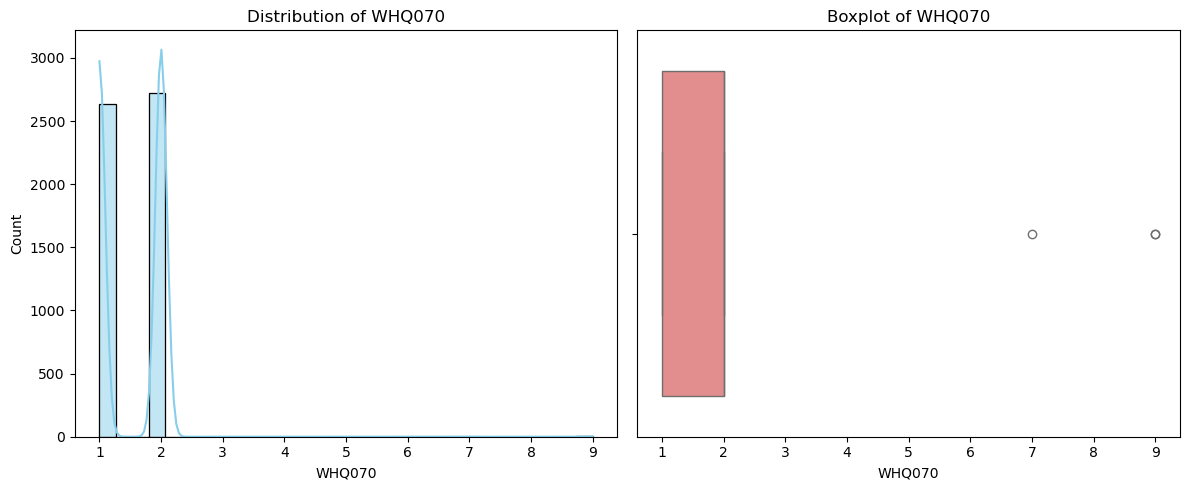

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sample dataset (you can replace this with your own dataset)


# Select only numeric columns
numeric_cols = dff.select_dtypes(include='number').columns

# Plot distribution and boxplot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Distribution plot (histogram + KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(dff[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dff[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [18]:
dff.shape

(5369, 181)

In [ ]:
for col in dff.columns:
    if dff[col].dtype == "object":
        dff[col] = dff[col].fillna(dff[col].mode()[0])  # Categorical: mode
    else:
        dff[col] = dff[col].fillna(dff[col].median())   # Numerical: median

# Save cleaned data
dff.to_csv("Impurte_Missind _Data_after_Dropping.csv", index=False)

In [20]:
dff.isnull().sum()

SEQN        0
ALQ111      0
ALQ121      0
ALQ151      0
BAQ321A     0
BAQ321B     0
BAQ321C     0
BAQ321D     0
BAQ530      0
BAXMSTAT    0
BAX5STAT    0
BAQ110      0
BAQ121      0
BAQ125      0
BAQ132      0
BAQ140      0
BAQ150      0
BAQ173      0
BMDSTATS    0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXLEG      0
BMXARML     0
BMXARMC     0
BMXWAIST    0
BMXHIP      0
BPQ020      0
BPQ080      0
BPQ101D     0
BPAOARM     0
BPAOCSZ     0
BPXOSY1     0
BPXODI1     0
BPXOSY2     0
BPXODI2     0
BPXOSY3     0
BPXODI3     0
BPXOPLS1    0
BPXOPLS2    0
BPXOPLS3    0
LBXWBCSI    0
LBXLYPCT    0
LBXMOPCT    0
LBXNEPCT    0
LBXEOPCT    0
LBXBAPCT    0
LBDLYMNO    0
LBDMONO     0
LBDNENO     0
LBDEONO     0
LBDBANO     0
LBXRBCSI    0
LBXHGB      0
LBXHCT      0
LBXMCVSI    0
LBXMC       0
LBXMCHSI    0
LBXRDW      0
LBXPLTSI    0
LBXMPSI     0
LBXNRBC     0
DBQ930      0
DBQ935      0
DBQ940      0
DBQ945      0
SDDSRVYR    0
RIDSTATR    0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
RIDRET

In [ ]:
dff.dtypes

SEQN        float64
ALQ111      float64
ALQ121      float64
ALQ151      float64
BAQ321A     float64
BAQ321B     float64
BAQ321C     float64
BAQ321D     float64
BAQ530      float64
BAXMSTAT    float64
BAX5STAT    float64
BAQ110      float64
BAQ121      float64
BAQ125      float64
BAQ132      float64
BAQ140      float64
BAQ150      float64
BAQ173      float64
BMDSTATS    float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
BMXLEG      float64
BMXARML     float64
BMXARMC     float64
BMXWAIST    float64
BMXHIP      float64
BPQ020      float64
BPQ080      float64
BPQ101D     float64
BPAOARM      object
BPAOCSZ     float64
BPXOSY1     float64
BPXODI1     float64
BPXOSY2     float64
BPXODI2     float64
BPXOSY3     float64
BPXODI3     float64
BPXOPLS1    float64
BPXOPLS2    float64
BPXOPLS3    float64
LBXWBCSI    float64
LBXLYPCT    float64
LBXMOPCT    float64
LBXNEPCT    float64
LBXEOPCT    float64
LBXBAPCT    float64
LBDLYMNO    float64
LBDMONO     float64
LBDNENO     float64


: 

In [21]:
print(dff['DIQ010'].value_counts())

'''Variable Name: DIQ010
Target: "Doctor told you have diabetes?"Values:
  1 = Yes
  2 = No
  3 = Borderline
  7 = Refused
  9 = Don’t know'''

DIQ010
2.0    4483
1.0     705
3.0     181
Name: count, dtype: int64


'Variable Name: DIQ010\nTarget: "Doctor told you have diabetes?"Values:\n  1 = Yes\n  2 = No\n  3 = Borderline\n  7 = Refused\n  9 = Don’t know'

In [22]:
import plotly.offline as py
import plotly.graph_objs as go
# 2 datasets
D = dff[(dff['DIQ010'] == 1)]
H = dff[(dff['DIQ010'] == 2)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = dff['DIQ010'].value_counts().values.tolist(),
                    y = ['healthy','diabetic' ],
                    orientation = 'h',
                    text=dff['DIQ010'].value_counts().values.tolist(),
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = dff['DIQ010'].value_counts(),
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'],
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [23]:
target_count()
target_percent()

In [24]:
###Correlation
import numpy as np
def correlation_plot():
    #correlation
    numeric_df=dff.select_dtypes(include='number')
    correlation = numeric_df.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            autosize = False,
                            height  = 5000,
                            width   = 6000,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

In [25]:
correlation_plot()